<a href="https://colab.research.google.com/github/a-foote/DATA586G8_FraudDetector/blob/alyssa/Model_NN%20Classifier_Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Credit Card Fraud Detector - Neural Net Classifier Model

## Template: Lab 2 and Lab 3

In [ ]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [23]:
import torch
import torch.nn.functional as F
import torch.nn as nn

import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sn
import numpy as np
#RANDOM_SEED = 123
#DEVICE = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
#%pip install torch torchvision torchaudio

In [ ]:
#df = pd.read_csv('creditcard.csv')
#X = df.loc[:,'V1':'V28']
#y = df['Class'].values

#dat_fl = df.drop(['Time','Amount'],axis=1) 

#'V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21''V22','V23	V24	V25	V26	V27	V28
#columns from dataset
#Time	V1	V2	V3	V4	V5	V6	V7	V8	V9	V10	V11	V12	V13	V14	V15	V16	V17	V18	V19	V20	V21	V22	V23	V24	V25	V26	V27	V28	Amount	Class
#dat_fl.head()

In [35]:
#df_train = pd.read_csv('fraud_trainset.csv')
df_train = pd.read_csv('fraud_trainset_smote_nodupe.csv')
#df_train = pd.read_csv('fraud_trainset_smote_22FPR.csv')
X_train = df_train.iloc[:,-1]
y_train = df_train['Class'].values
num_features = df_train.shape[1] - 1

In [25]:
num_features

30

In [36]:
#df_val = pd.read_csv('fraud_valset.csv')
df_val = pd.read_csv('fraud_valset_smote_nodupe.csv')
#df_val = pd.read_csv('fraud_valset_smote_22FPR.csv')
X_val = df_val.iloc[:,-1]
y_val = df_val['Class'].values

In [37]:
#df_test = pd.read_csv('fraud_testset.csv')
df_test = pd.read_csv('fraud_testset_nodupe.csv')
X_test = df_test.iloc[:,-1]
y_test = df_test['Class'].values

In [38]:
# Convert dataframe to numpy array for downstream model processing

train_dataset=df_train.to_numpy() #This is used in dataloader
X_train = X_train.to_numpy() #This is used in training
#type(dat_fl)

test_dataset=df_test.to_numpy() #This is used in dataloader

valid_dataset=df_val.to_numpy()

## LeNet5 Model

In [39]:
##########################
### SETTINGS
##########################

# Hyperparameters
RANDOM_SEED = 123
LEARNING_RATE = 0.1
BATCH_SIZE = 128
NUM_EPOCHS = 20

# Architecture
NUM_FEATURES = num_features
NUM_CLASSES = 2

# Other
if torch.cuda.is_available():
    DEVICE = "cuda:0"
else:
    DEVICE = "cpu"

GRAYSCALE = False

In [30]:
###########################
### Dataset
##########################

#train_mean = (0.5, 0.5, 0.5)
#train_std = (0.5, 0.5, 0.5)

#resize_transform = transforms.Compose([transforms.Resize((32, 32)),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize(train_mean, train_std)])

# Note transforms.ToTensor() scales input images
# to 0-1 range
#Reference: https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets
#train_size = int(0.8 * len(dat_fl))
#test_size = len(dat_fl) - train_size
#train_dataset, test_dataset = torch.utils.data.random_split(dat_fl, [train_size, test_size])


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          num_workers=8,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE,
                         num_workers=8,
                         shuffle=False)

# Checking the dataset
#for images, labels in train_loader:  
#    print('Image batch dimensions:', images.shape)
#    print('Image label dimensions:', labels.shape)
#    break

# Checking the dataset
#for images, labels in train_loader:  
#    print('Image batch dimensions:', images.shape)
#    print('Image label dimensions:', labels.shape)
#    break

#len(train_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [40]:
##########################
### MODEL
##########################


class LeNet5(nn.Module):

    def __init__(self, num_classes, grayscale=False):
        super(LeNet5, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3

        self.features = nn.Sequential(
            
            #nn.Conv2d(in_channels, 6*in_channels, kernel_size=5),
            #nn.Conv1d(28,50,kernel_size=5),
            #nn.Tanh(),
            #nn.MaxPool2d(kernel_size=2),
            #nn.MaxPool1d(kernel_size=2),
            #nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=5),
            #nn.Conv1d(50,50,kernel_size=5),
            #nn.Tanh(),
            #nn.MaxPool1d(kernel_size=2)
            #nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
        #    nn.Linear(16*5*5*in_channels, 120*in_channels),
            nn.Linear(num_features, 50),
            nn.Tanh(),
        #    nn.Linear(120*in_channels, 84*in_channels),
            nn.Linear(50, 50),
            nn.Tanh(),
        #    nn.Linear(84*in_channels, num_classes),
            nn.Linear(50, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        
        #out = self.linear_1(x)
        #out = F.relu(out)
        
        #logits = self.linear_out(out)
        #probas = F.softmax(logits, dim=1)
        #return logits, probas
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [41]:
device = torch.device(DEVICE)
torch.manual_seed(0)

for epoch in range(2):

    for batch_idx, batch_data in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        #print(' | Batch size:', y.size()[0])
        
        x = batch_data#[:-1]#.to(device)
        print(x)
        #y = y.to(device)
        #print(y)
        break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 | Batch index: 0tensor([[ -0.2718,   0.5565,   1.1913,  ...,   0.4714,   0.3043,   1.0000],
        [  3.3097,   0.9362,  -1.2694,  ...,  -0.0809,   0.1197,   0.0000],
        [ -0.2026,   0.6008,  -3.6940,  ...,   0.8306,   0.5782,   1.0000],
        ...,
        [ 12.7182,   0.4497,  -1.7332,  ...,  -0.0650,   0.0438,   1.0000],
        [ -0.2946,  -0.5069,   0.5264,  ...,   0.0610,   0.2677,   1.0000],
        [  0.3193,   0.1080, -13.0362,  ...,  -2.4789,  -0.7130,   1.0000]],
       dtype=torch.float64)
Epoch: 2 | Batch index: 0tensor([[ -0.2954,   0.4905,  -1.3620,  ...,   0.5752,   0.2212,   1.0000],
        [ -0.1694,  -0.5098, -13.8932,  ...,  -1.5071,  -0.6864,   1.0000],
        [ -0.0922,   0.3418,   1.8765,  ...,   0.0522,  -0.0308,   0.0000],
        ...,
        [  0.3155,   0.8938,  -0.4884,  ...,   0.2997,   0.1670,   1.0000],
        [  0.7140,   0.6223,  -3.2570,  ...,  -0.2522,   0.0285,   1.0000],
        [ -0.2271,   0.8054,   0.2671,  ...,  -0.1857,  -0.

In [ ]:
len(batch_data)

128

In [42]:

torch.manual_seed(RANDOM_SEED)

model1 = LeNet5(NUM_CLASSES, GRAYSCALE)
model1 = model1.to(DEVICE)

optimizer = torch.optim.Adam(model1.parameters(), LEARNING_RATE)

# Training

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89    228727
         1.0       0.90      0.86      0.88    228726

    accuracy                           0.88    457453
   macro avg       0.88      0.88      0.88    457453
weighted avg       0.88      0.88      0.88    457453

Epoch: 001/020 | Train F-1 Score: 0.882%
Time elapsed: 0.08 min
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88    228727
         1.0       0.89      0.88      0.88    228726

    accuracy                           0.88    457453
   macro avg       0.88      0.88      0.88    457453
weighted avg       0.88      0.88      0.88    457453

Epoch: 001/020 | Train F-1 Score: 0.882%
Time elapsed: 0.16 min
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91    228727
         1.0       0.93      0.89      0.91    228726

    accuracy                           0.91    457453


<ipython-input-46-f963fe75e5b8>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (12,7))


Epoch: 002/020 | Train F-1 Score: 0.942%
Time elapsed: 1.72 min
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    228727
         1.0       0.97      0.92      0.94    228726

    accuracy                           0.95    457453
   macro avg       0.95      0.95      0.95    457453
weighted avg       0.95      0.95      0.95    457453

Epoch: 002/020 | Train F-1 Score: 0.944%
Time elapsed: 1.79 min
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    228727
         1.0       0.97      0.91      0.94    228726

    accuracy                           0.94    457453
   macro avg       0.94      0.94      0.94    457453
weighted avg       0.94      0.94      0.94    457453

Epoch: 002/020 | Train F-1 Score: 0.939%
Time elapsed: 1.87 min
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    228727
         1.0       0.97      0.91      0.94  

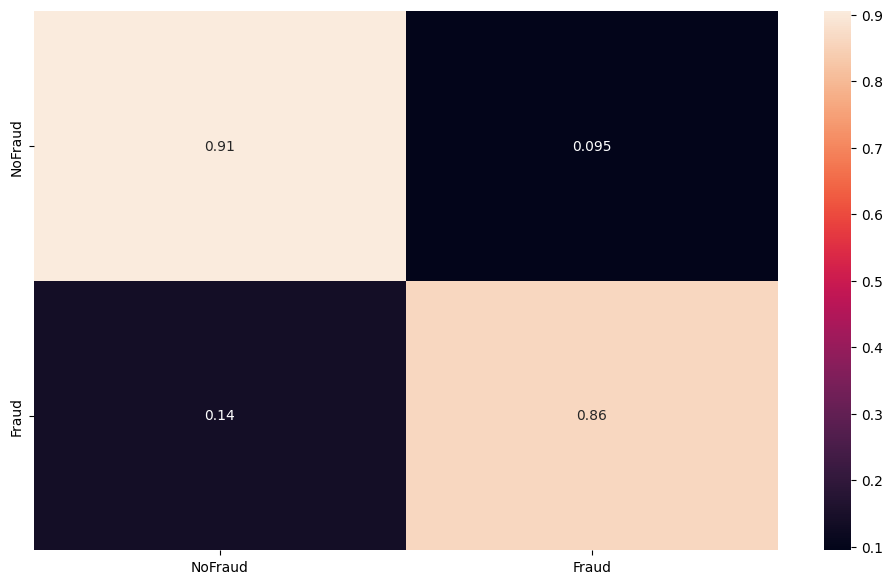

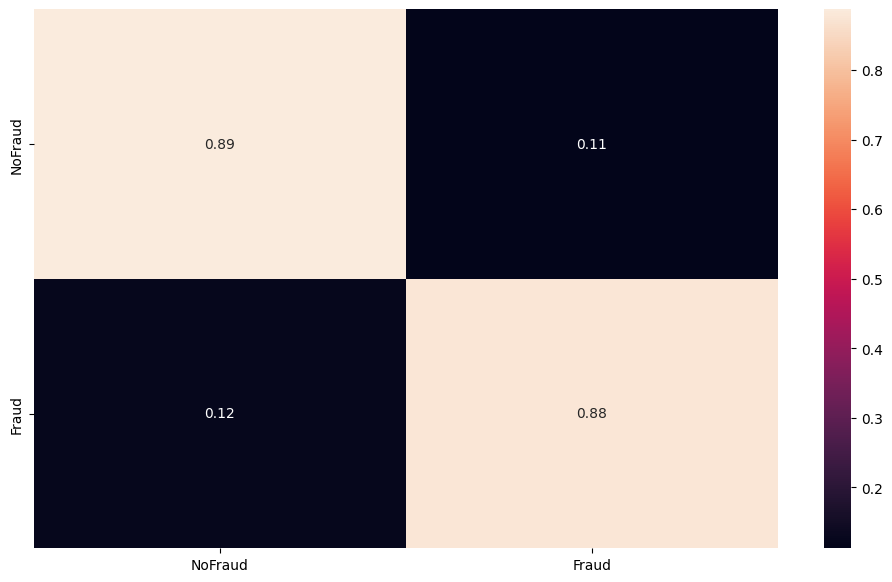

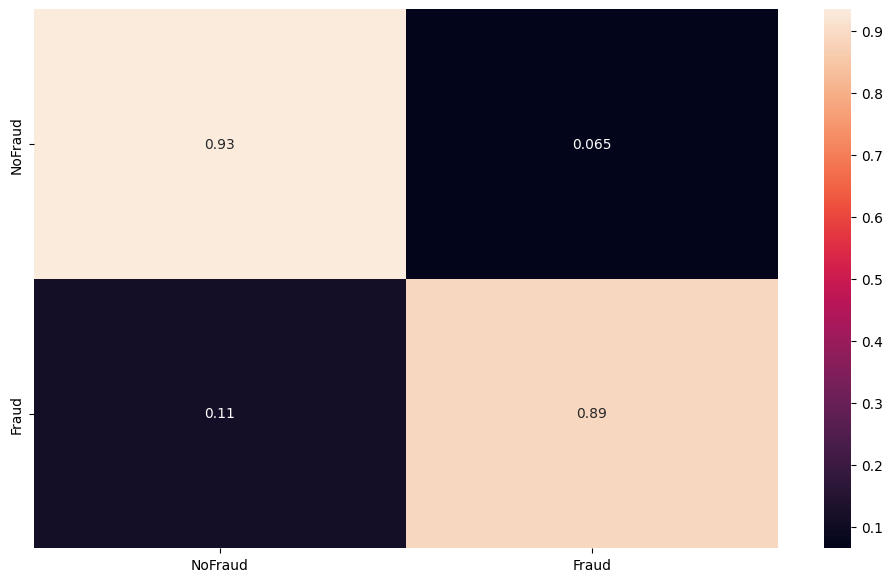

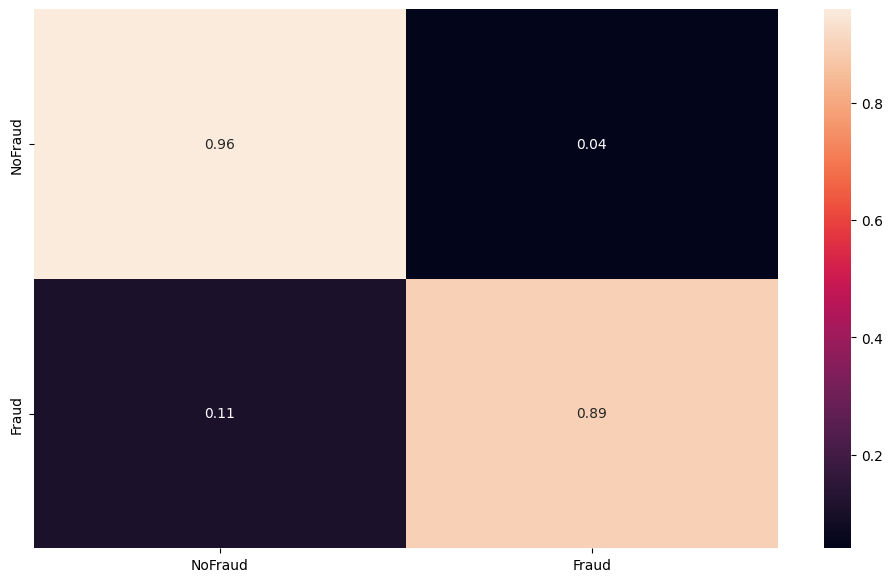

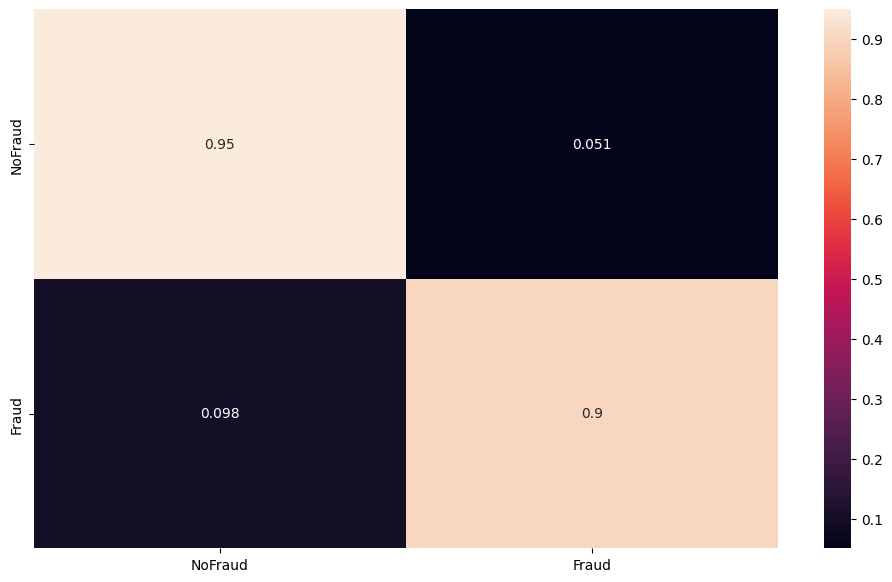

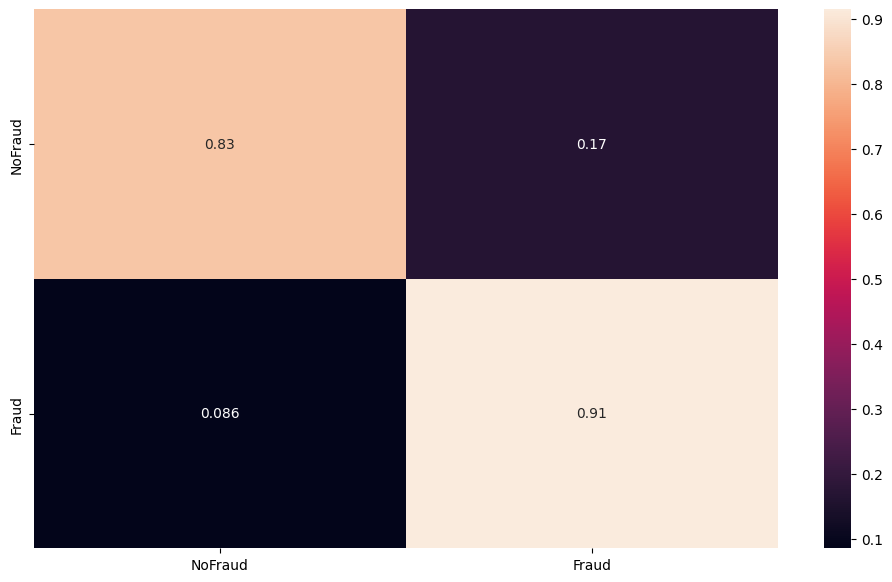

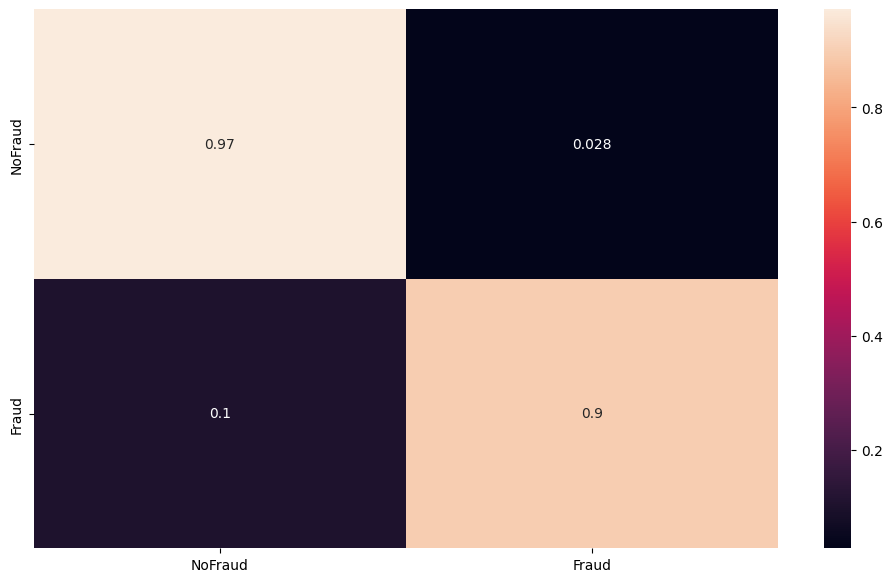

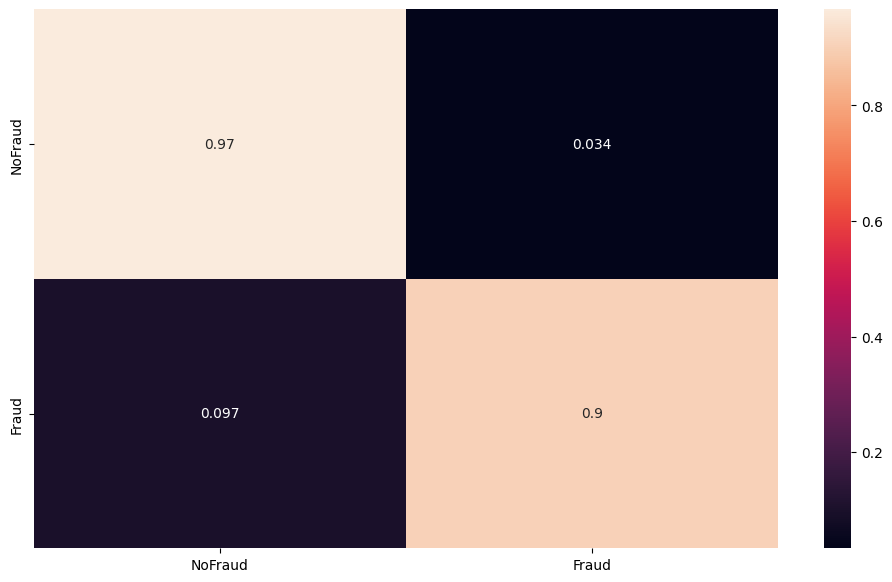

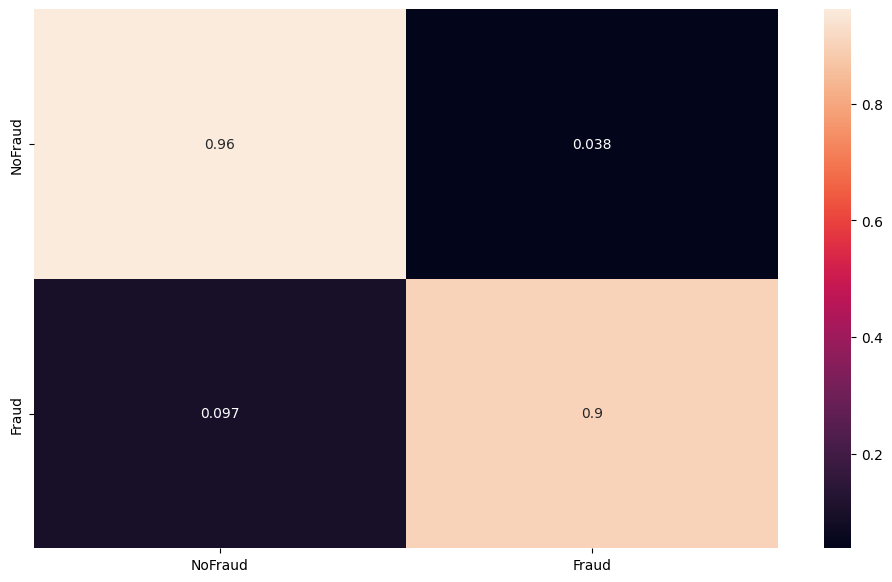

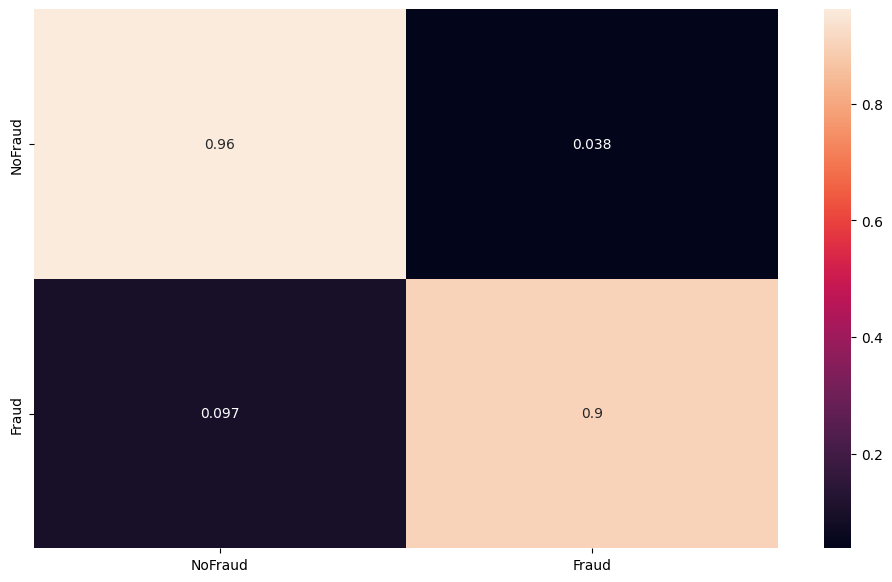

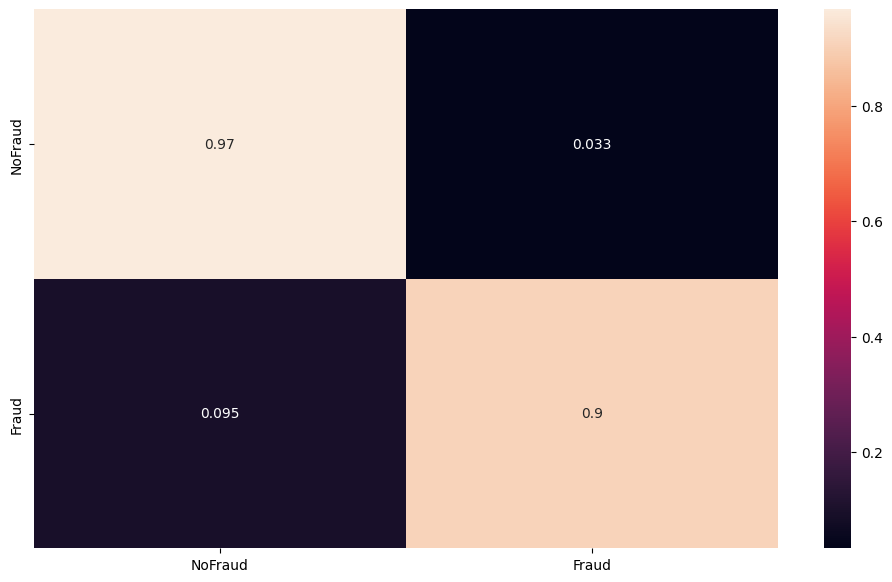

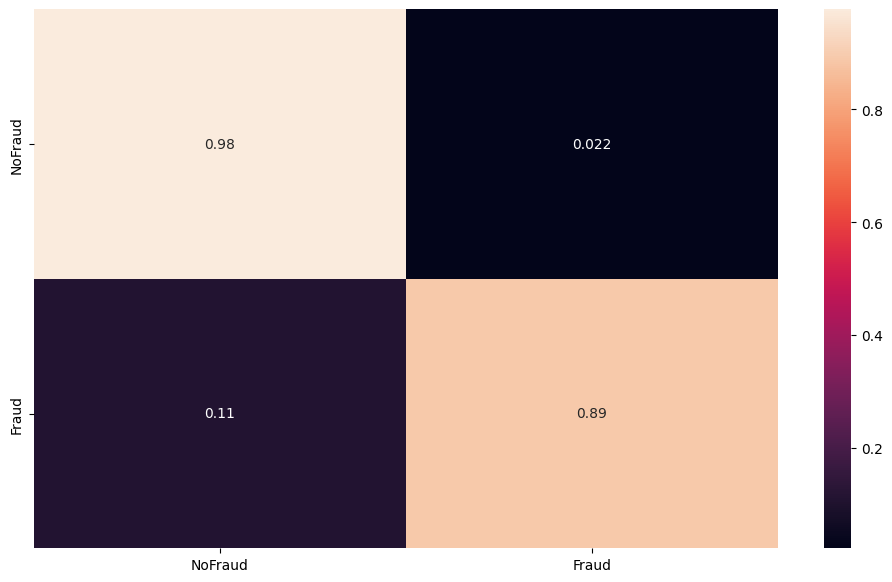

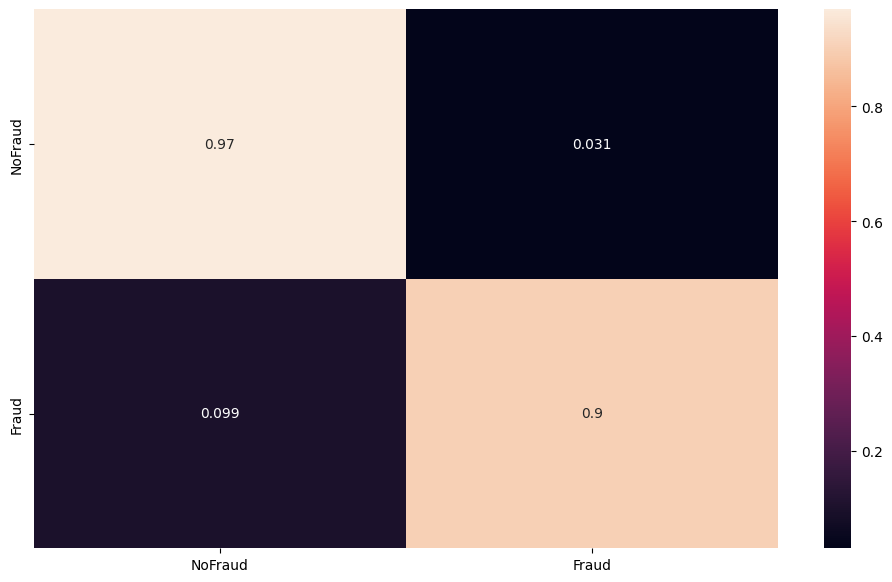

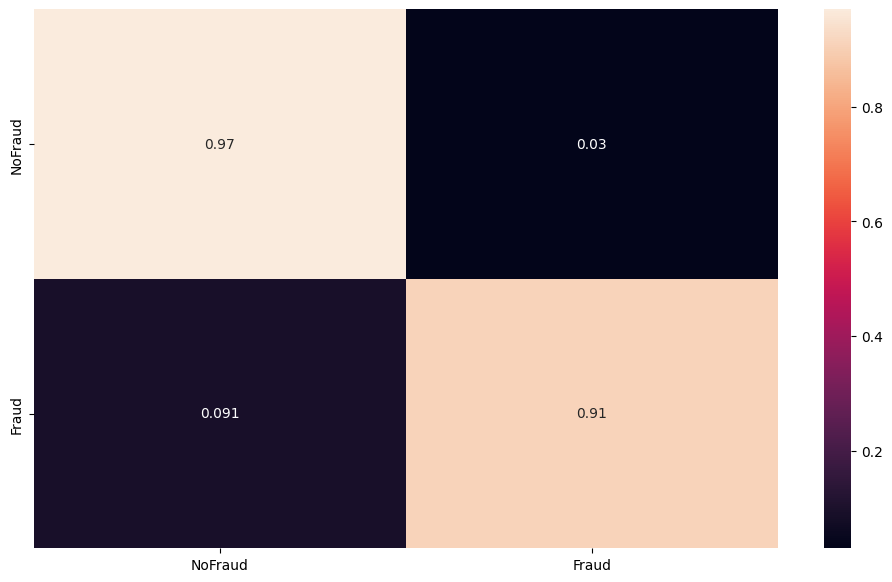

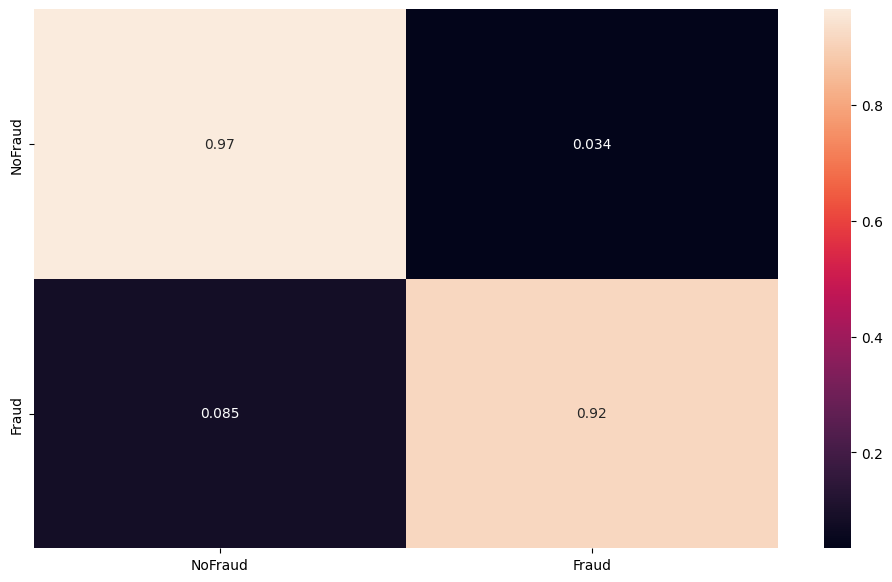

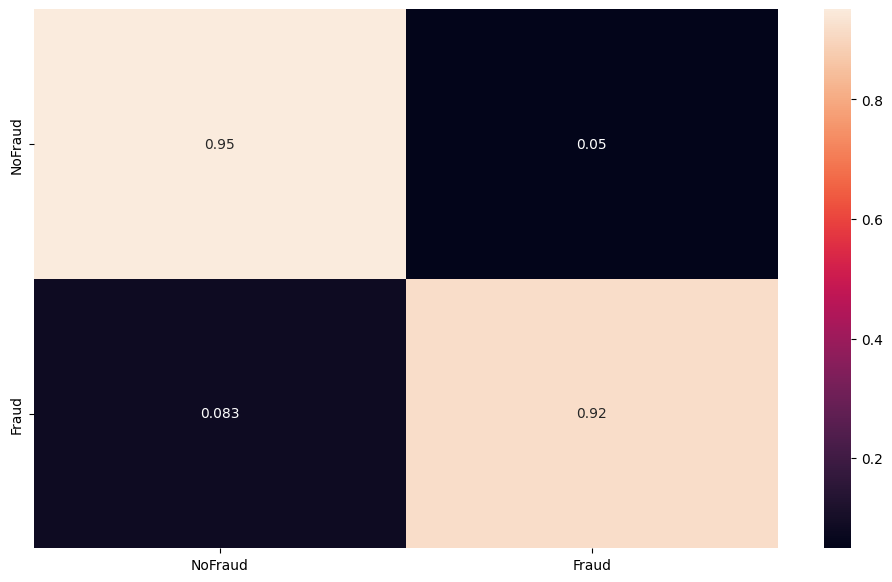

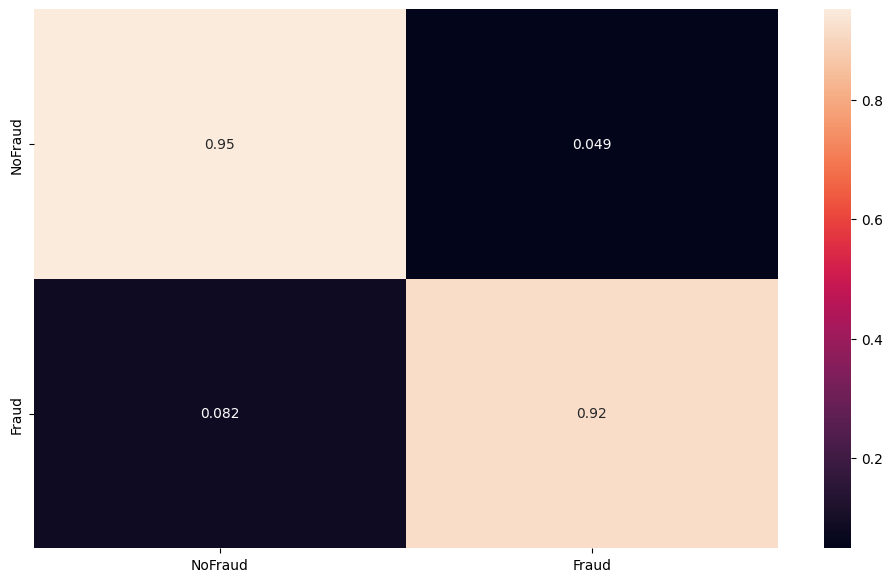

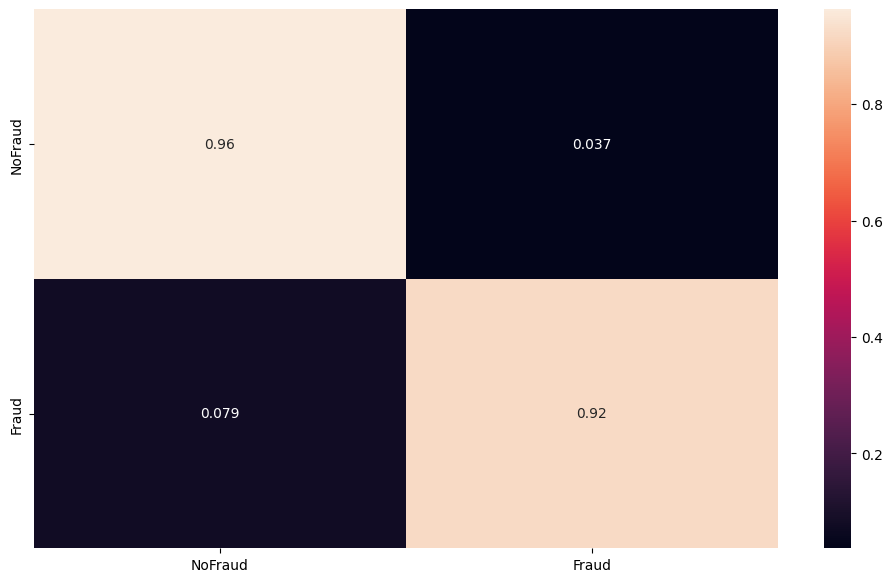

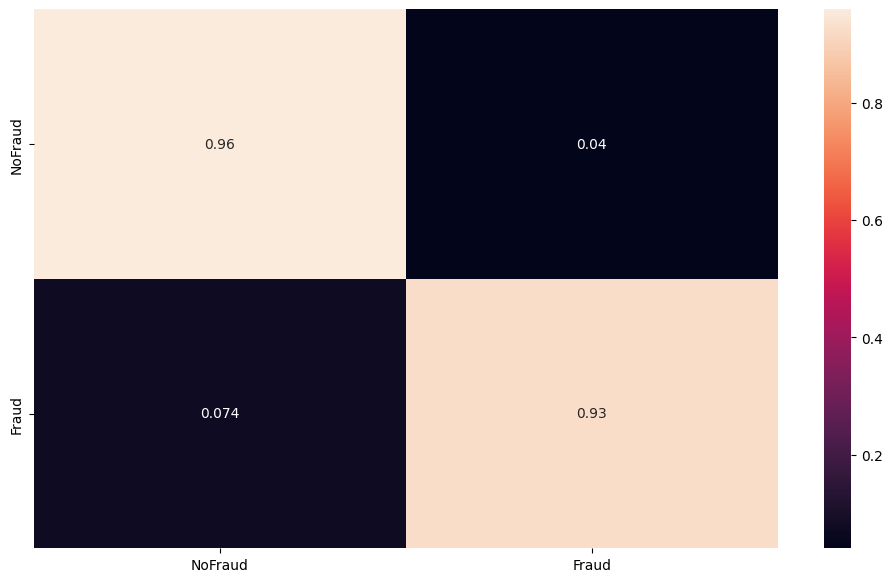

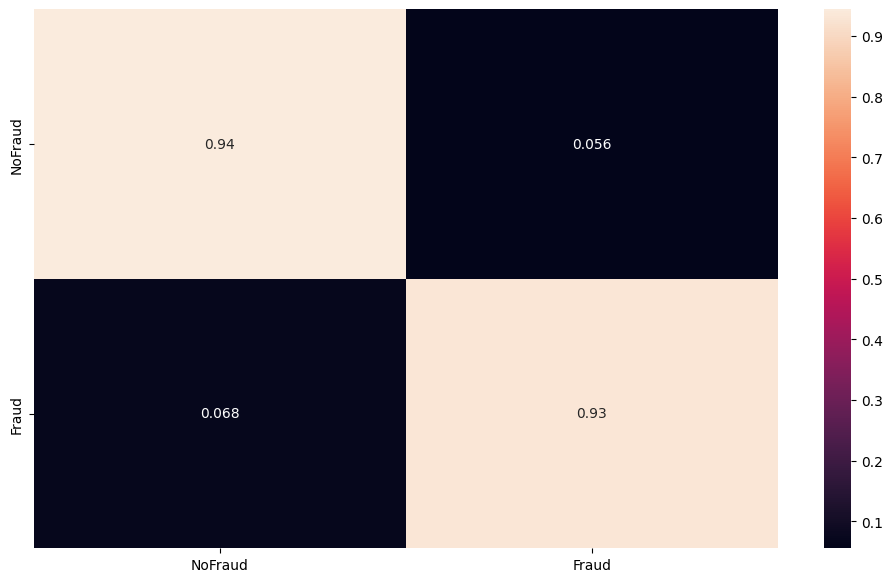

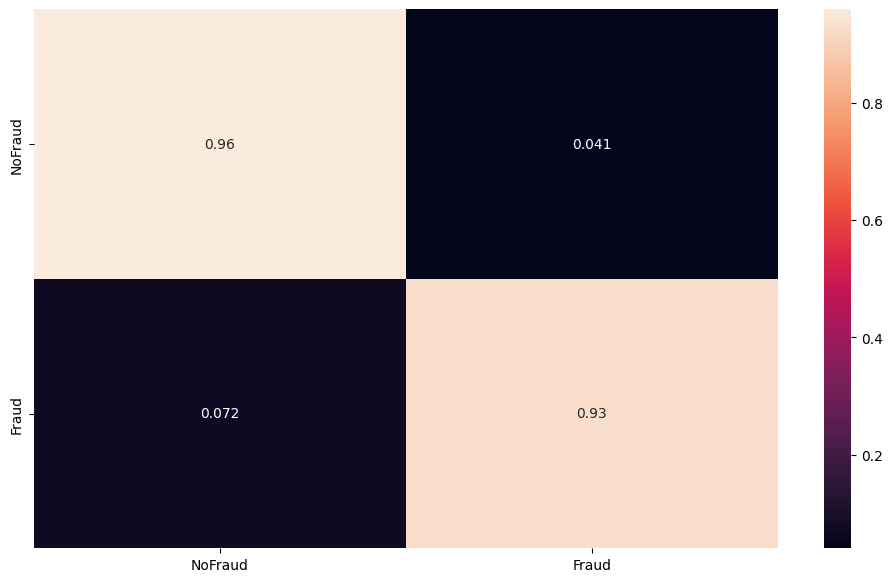

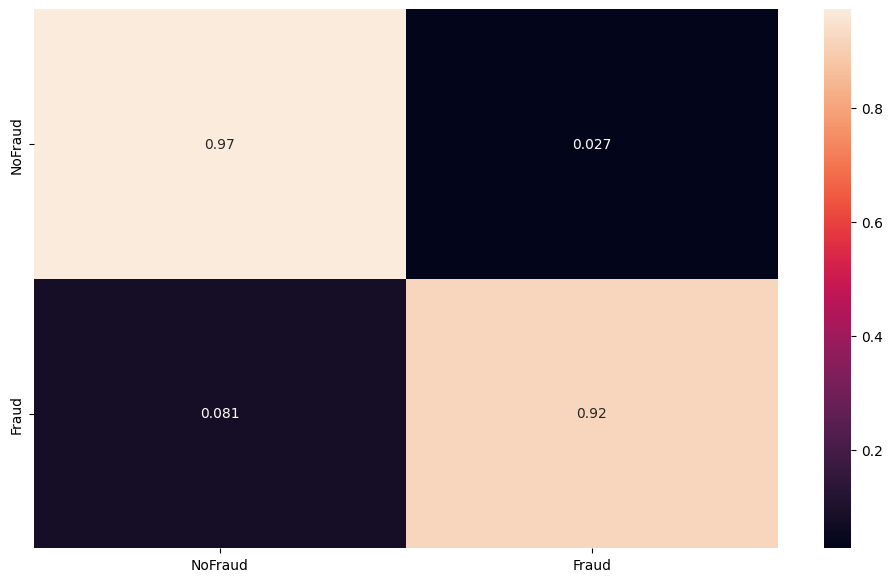

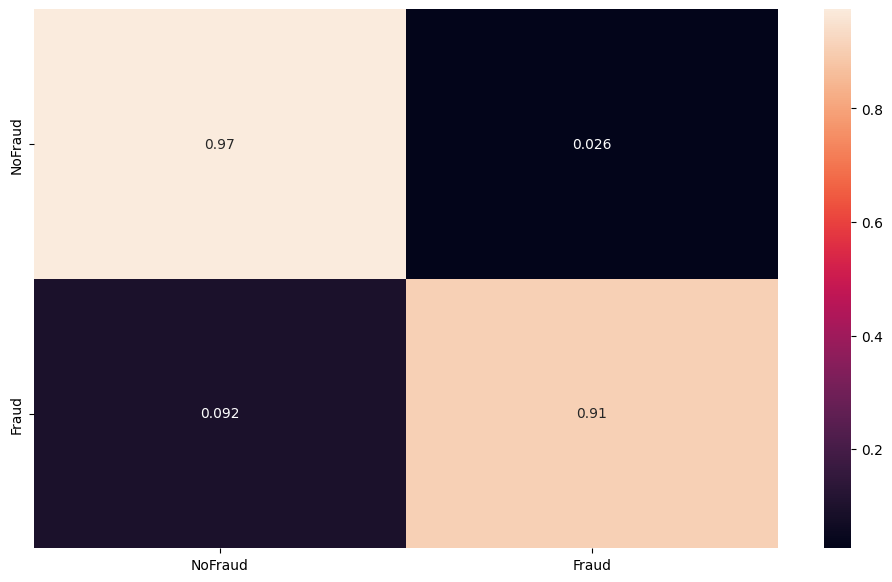

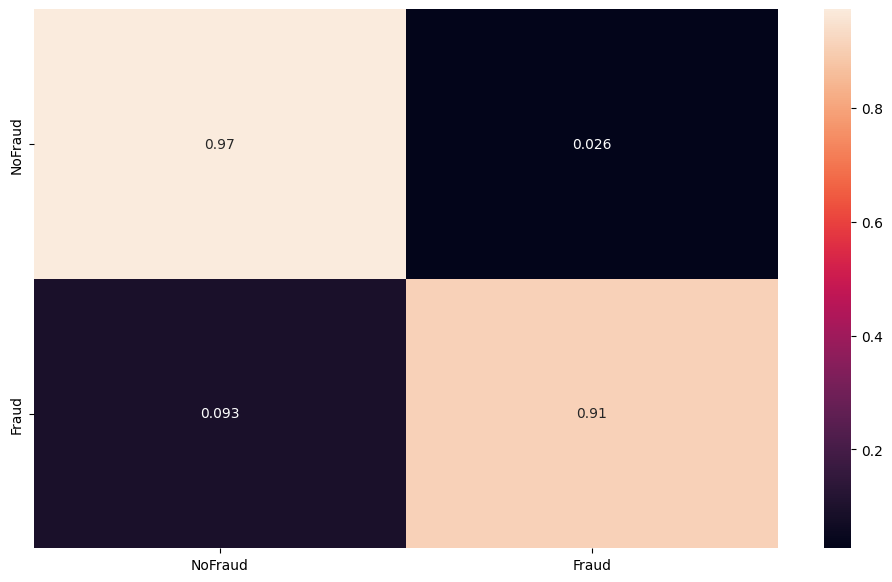

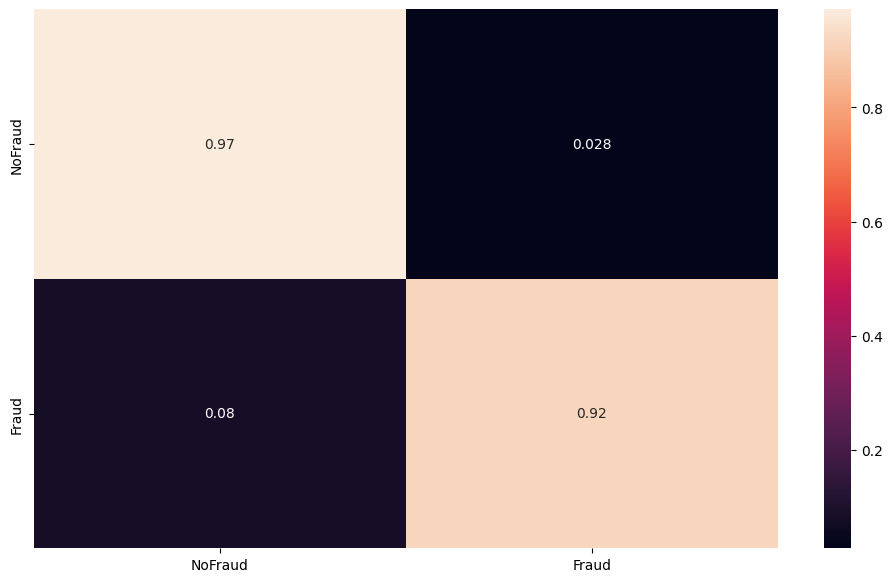

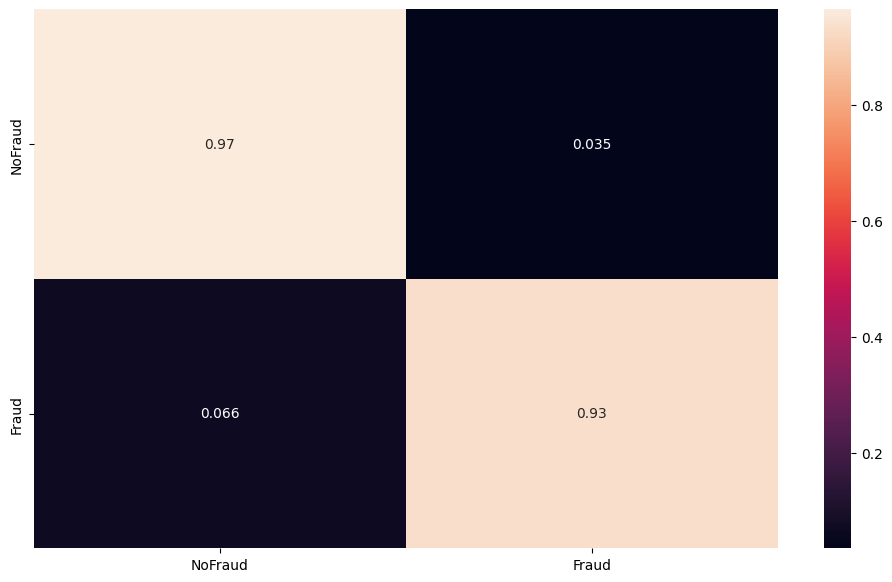

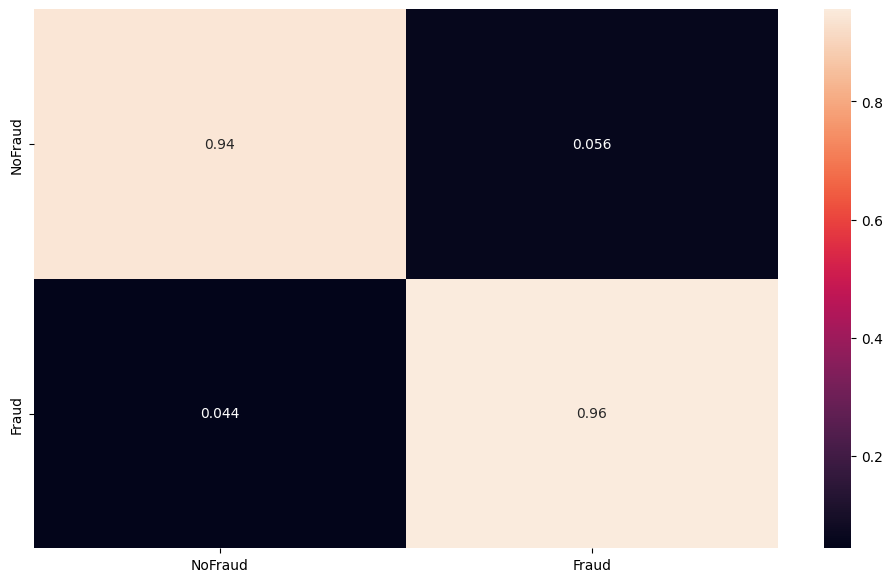

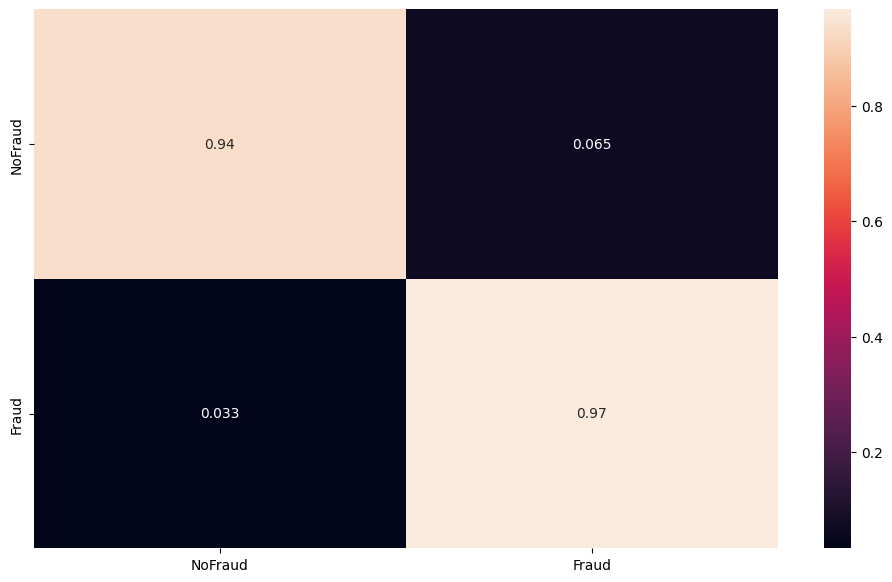

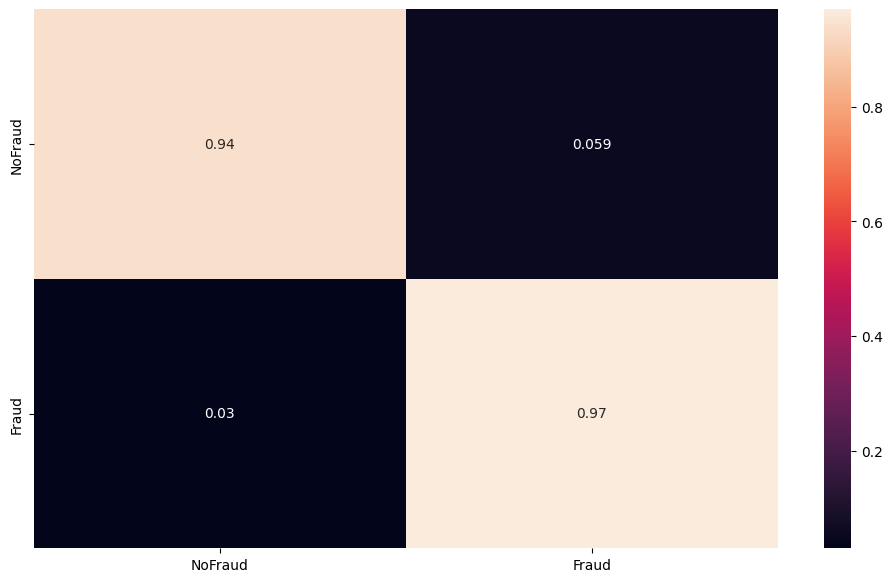

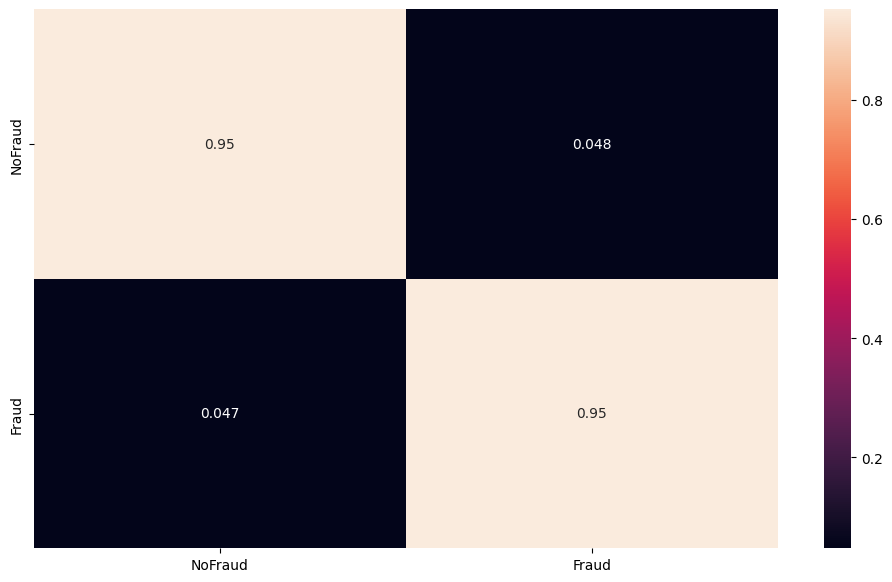

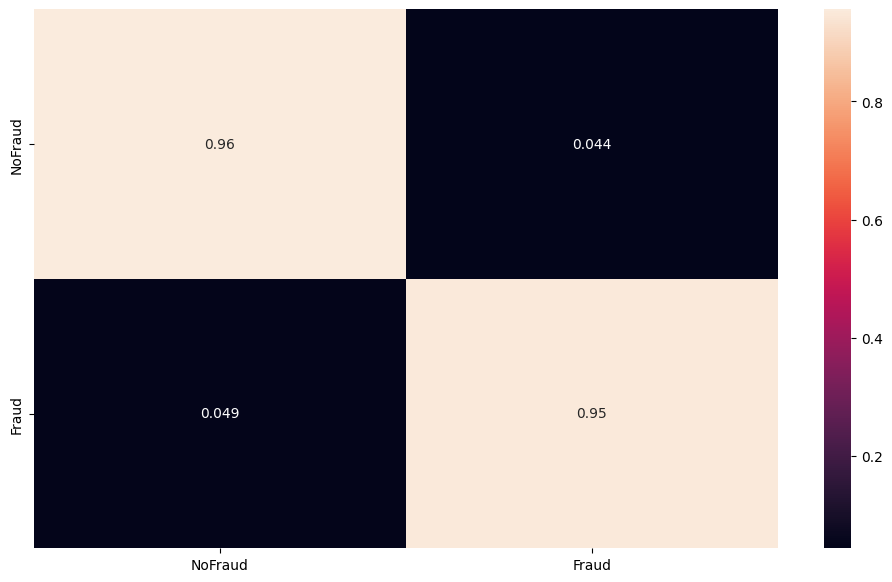

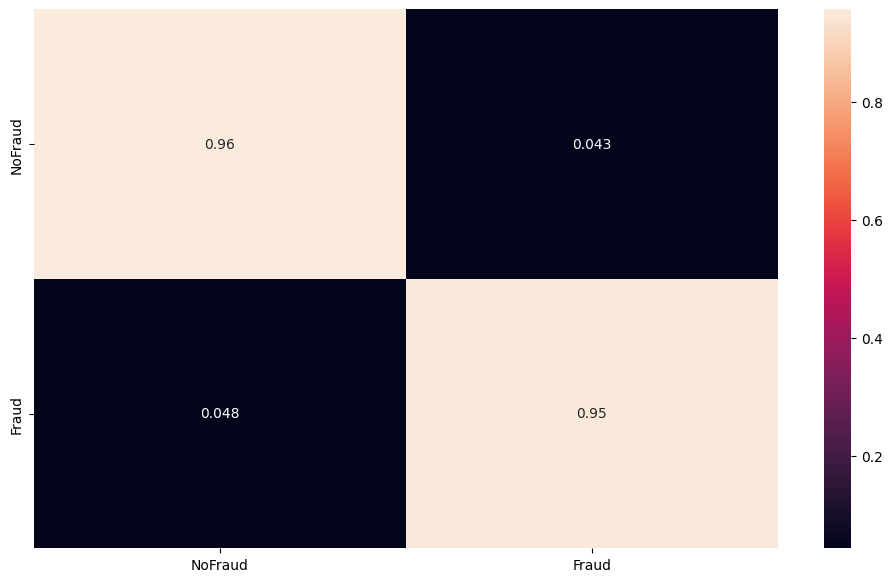

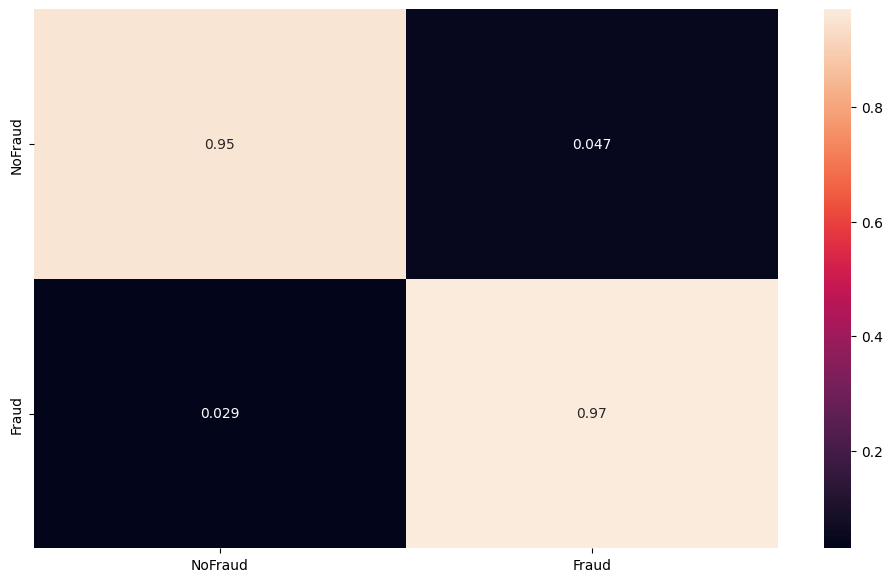

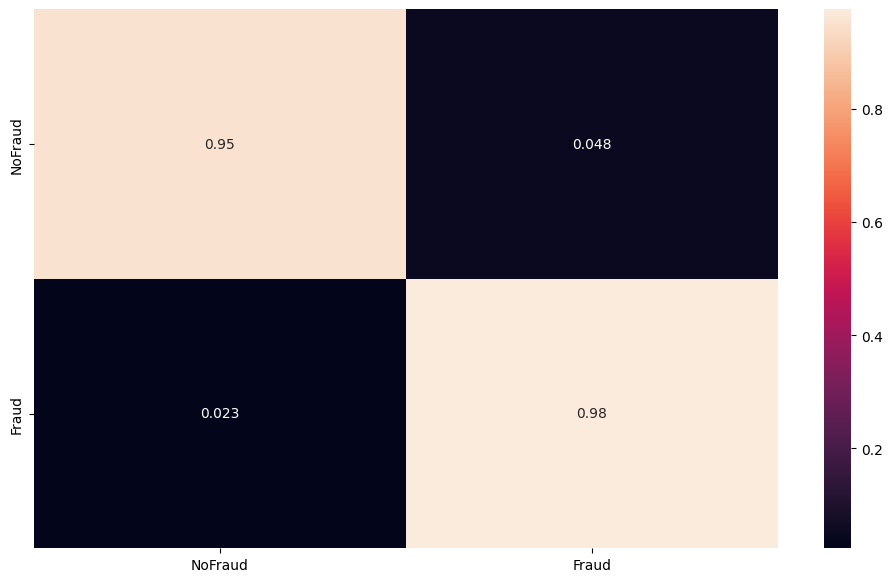

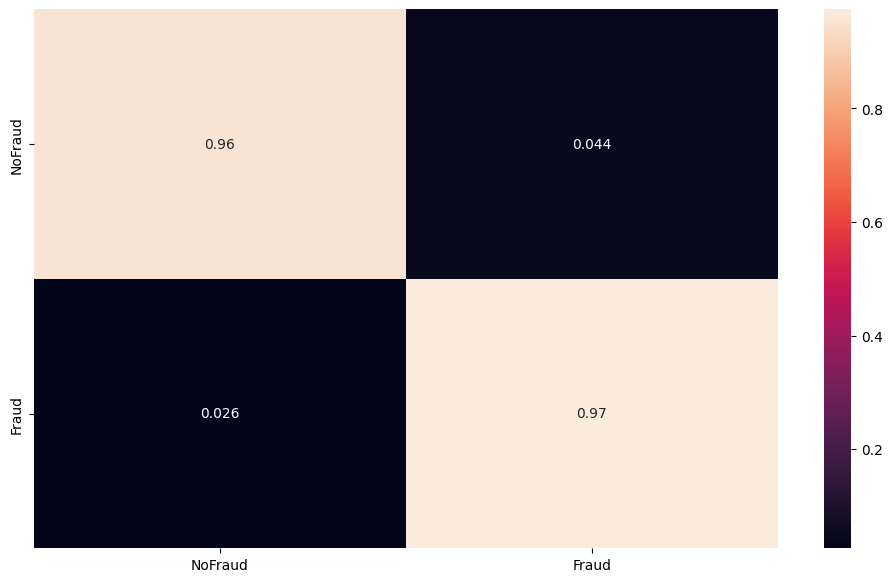

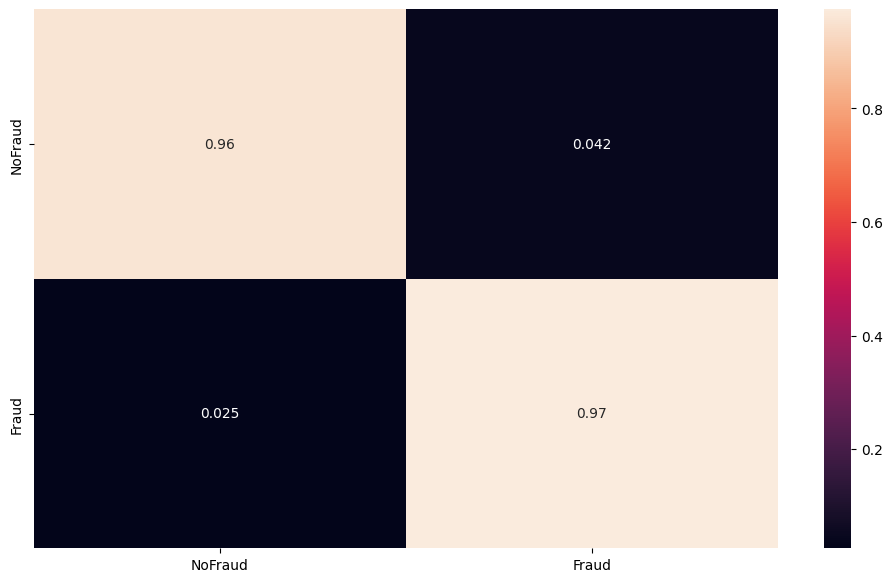

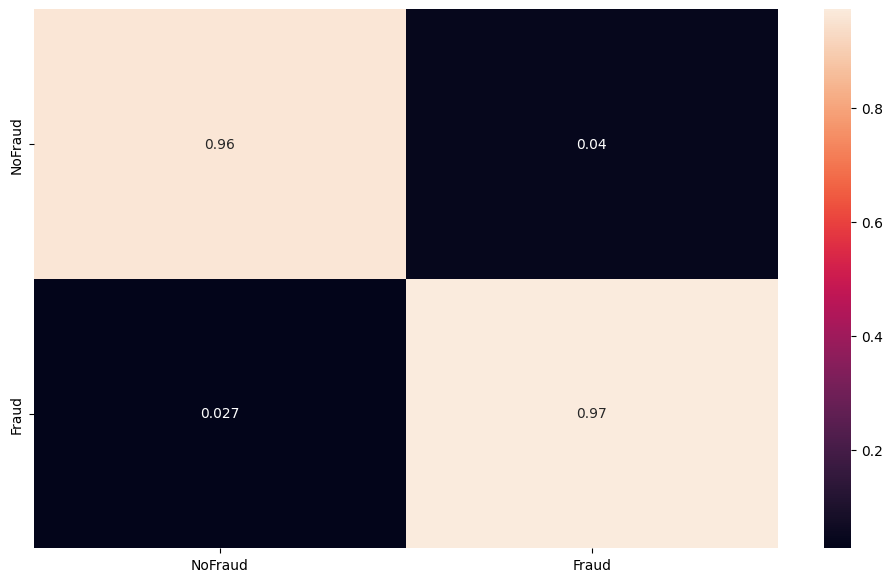

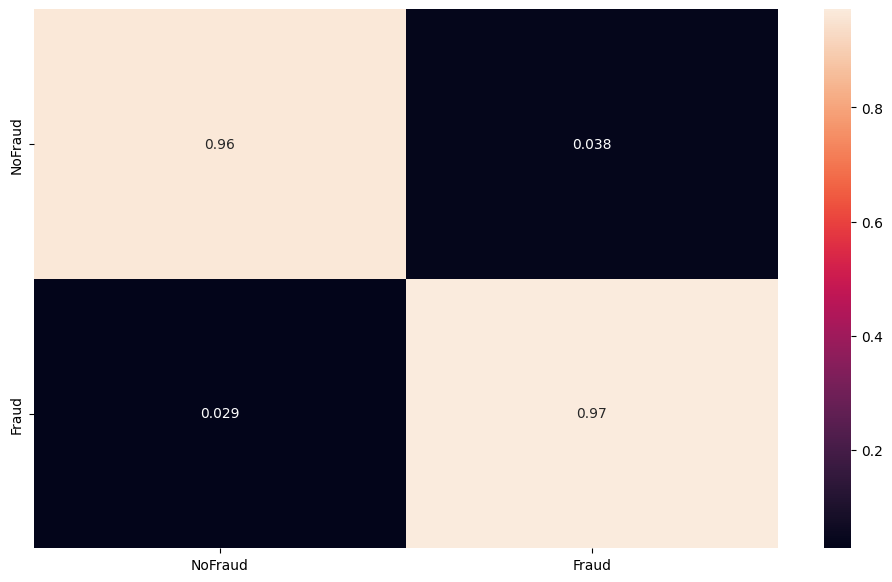

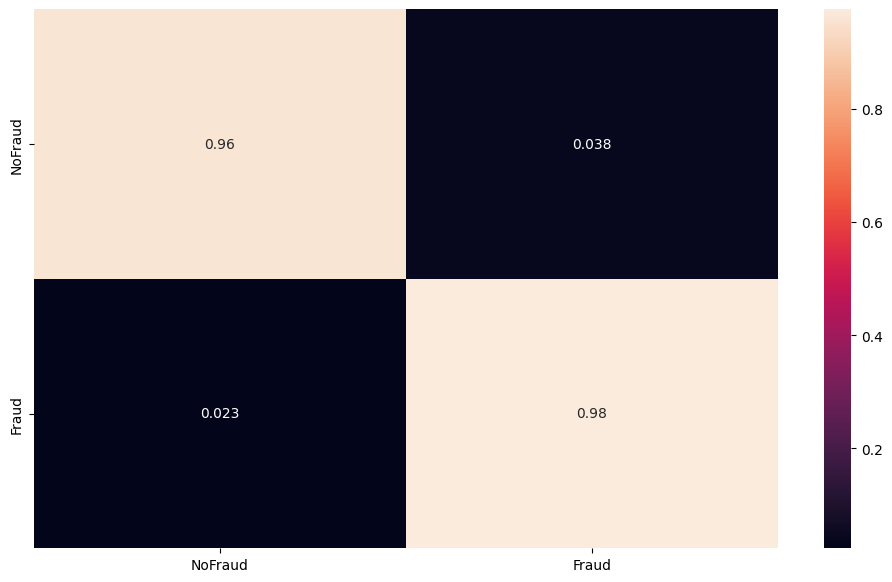

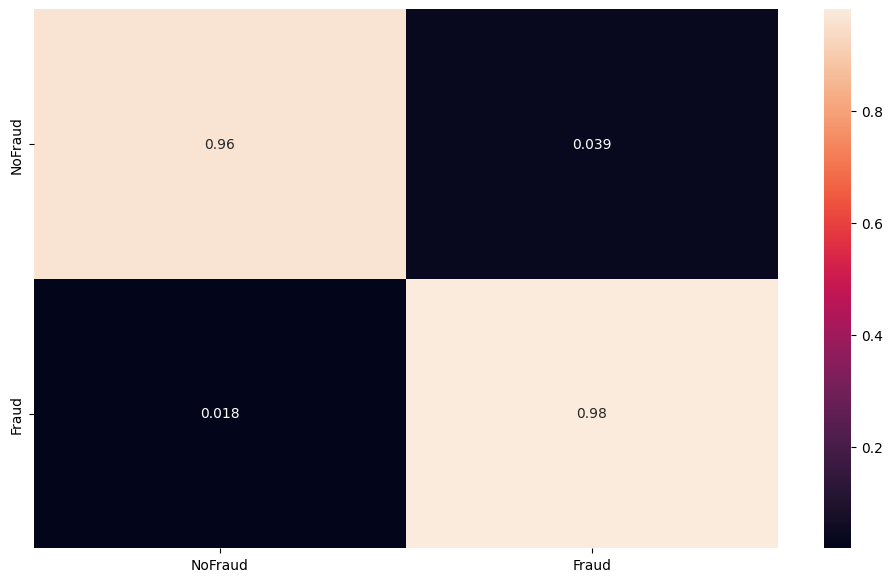

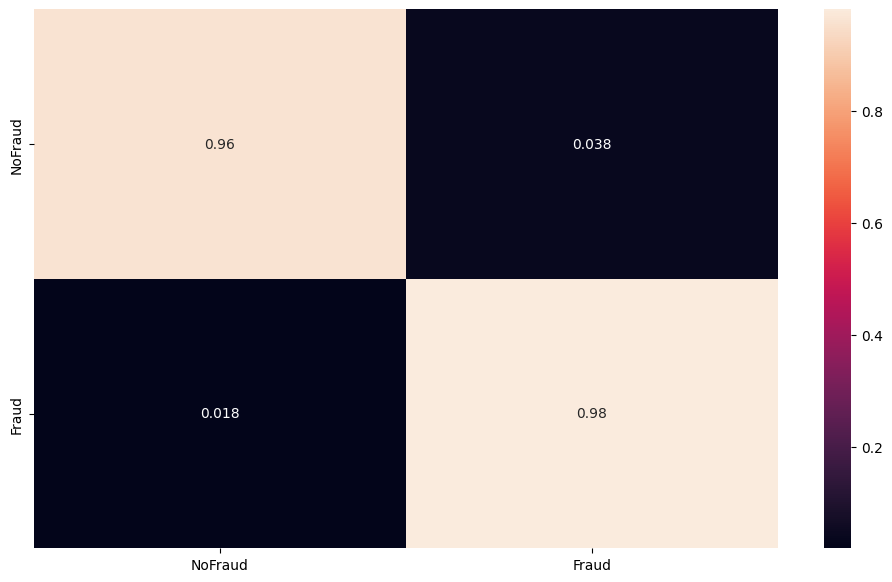

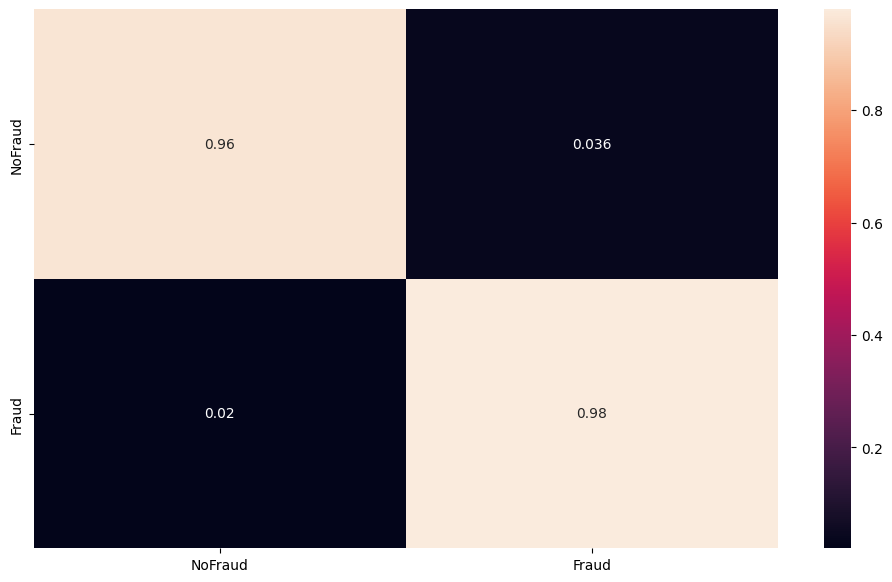

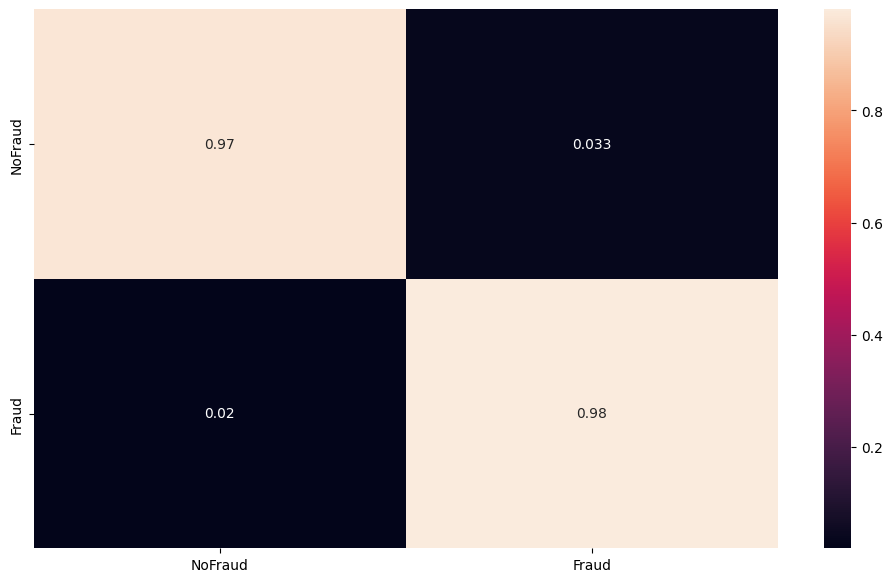

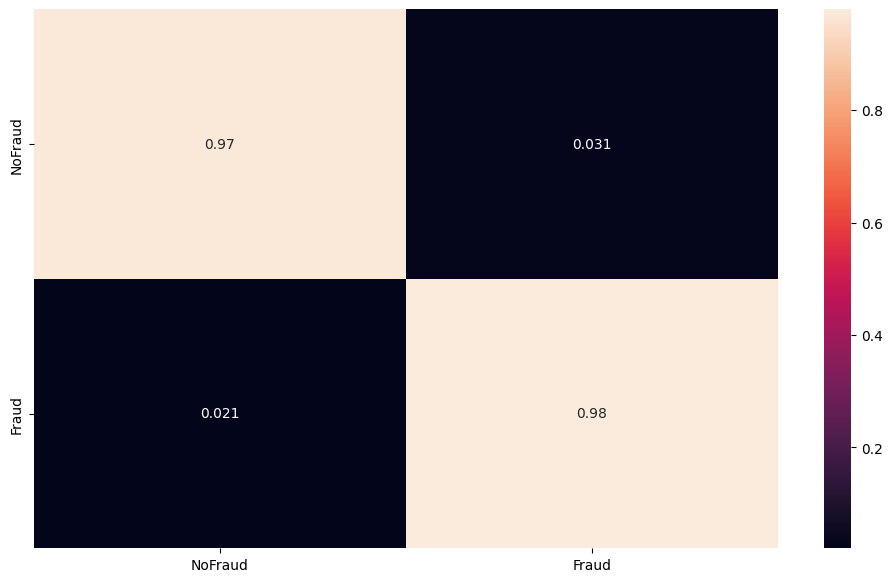

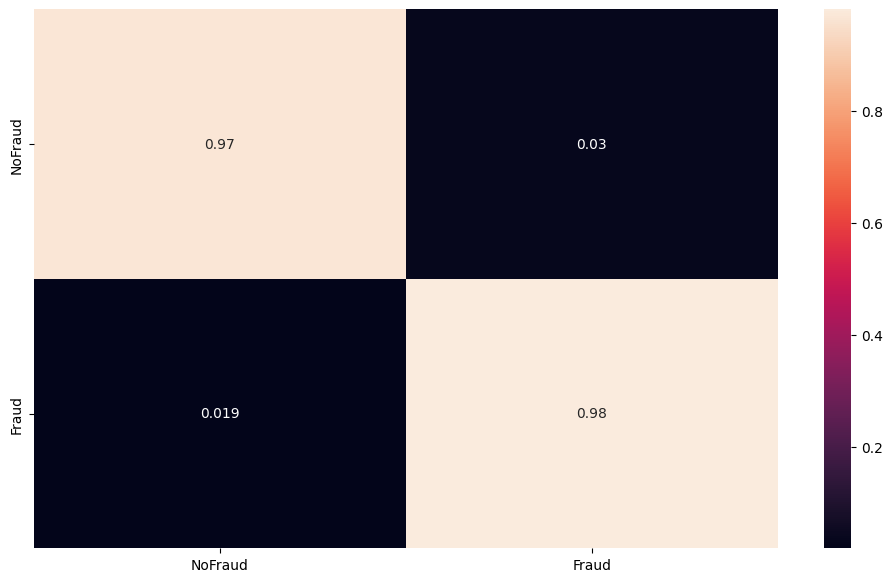

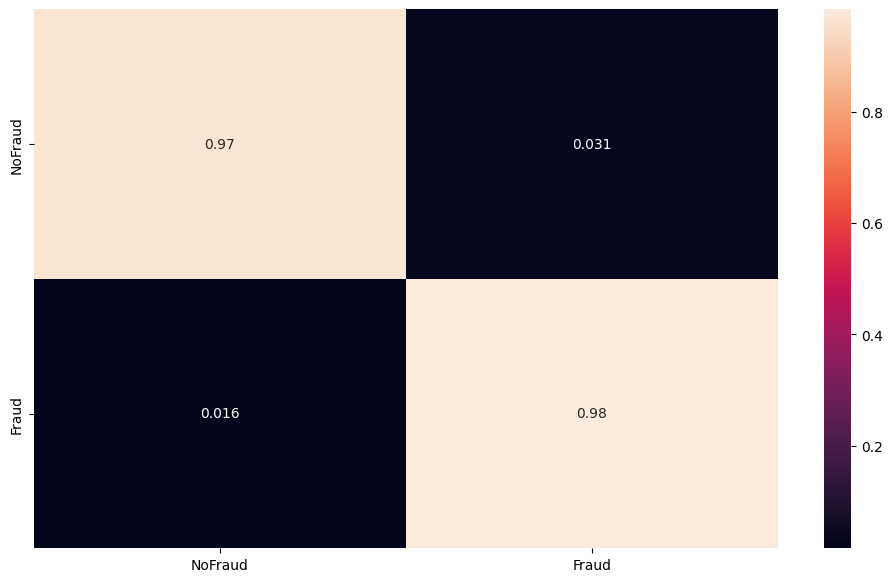

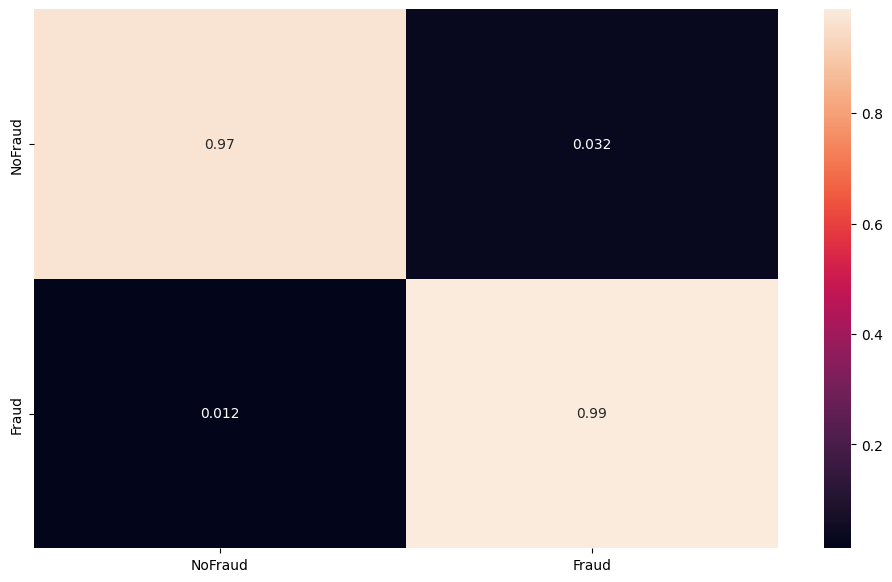

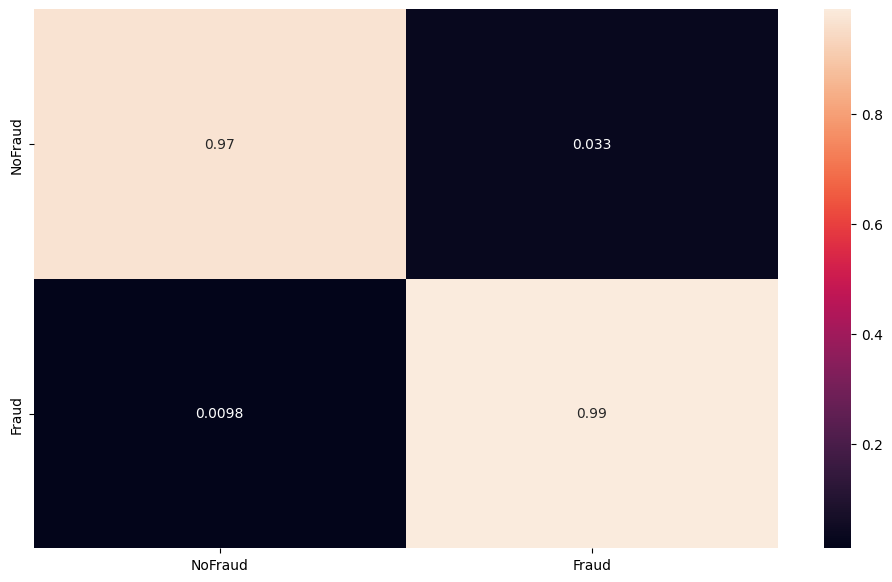

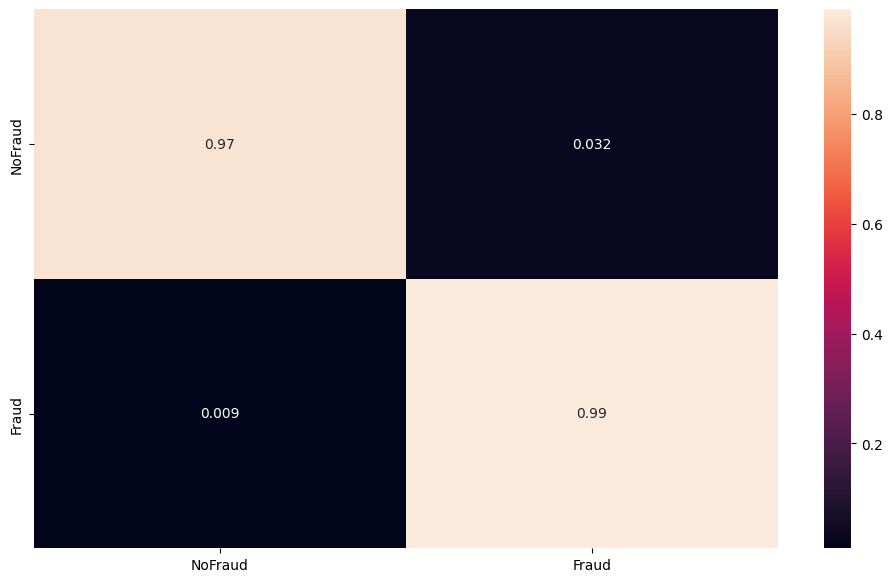

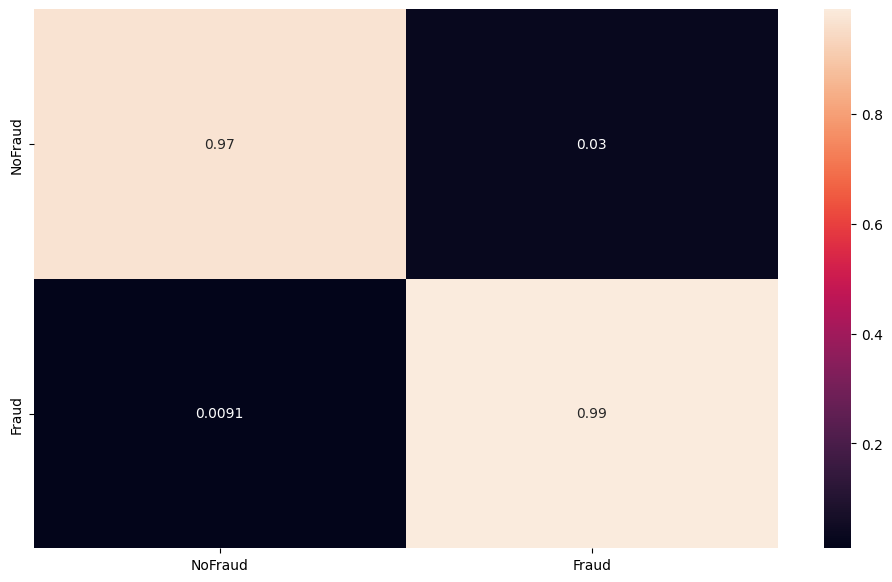

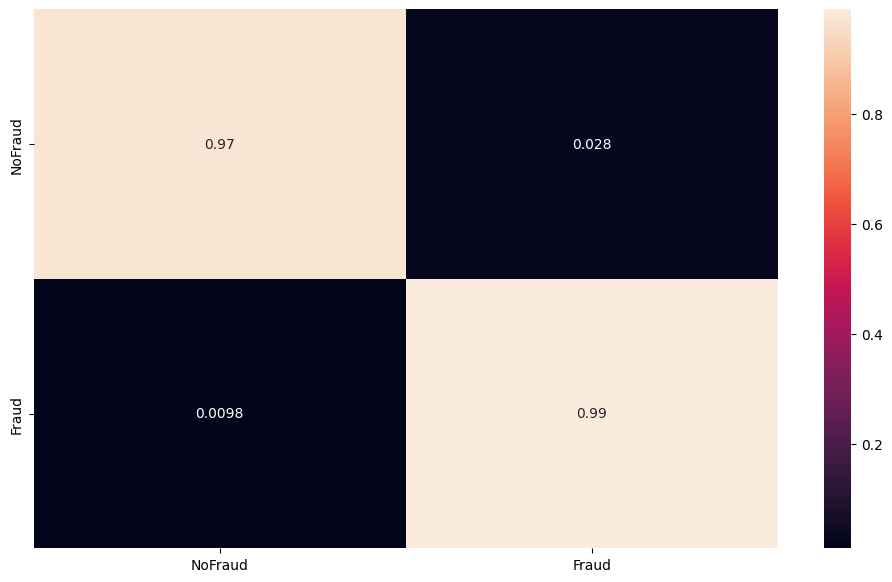

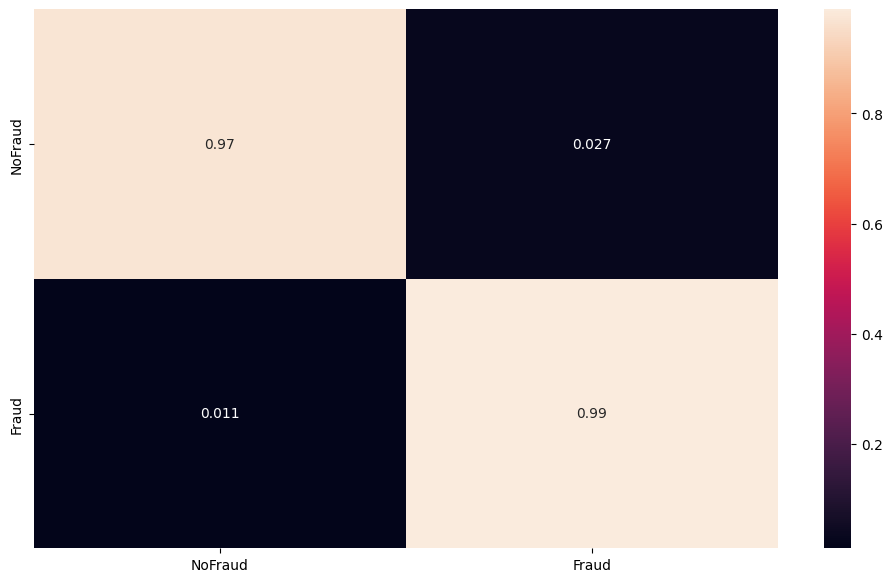

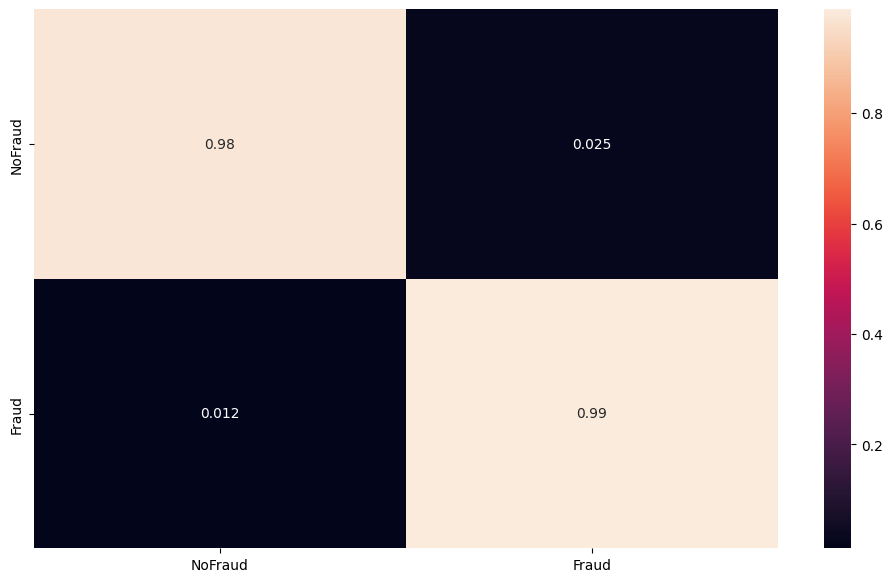

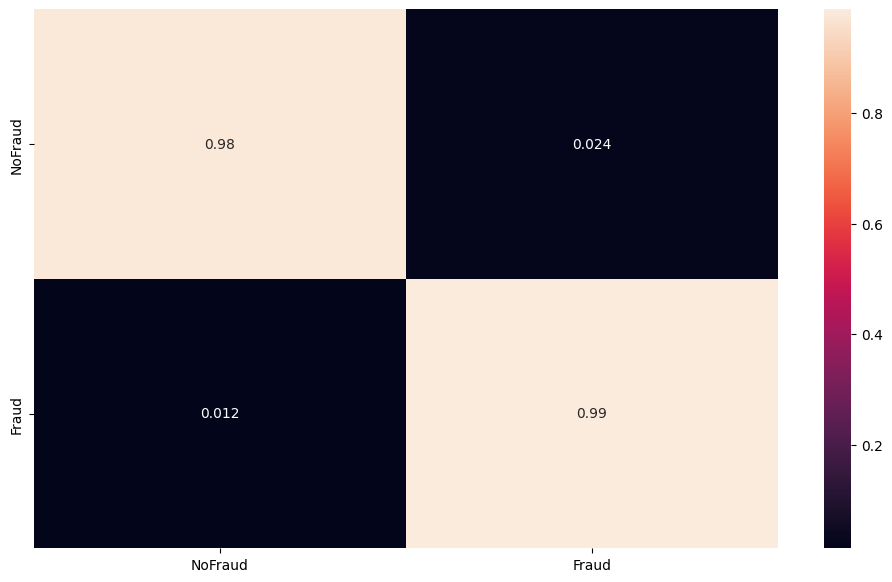

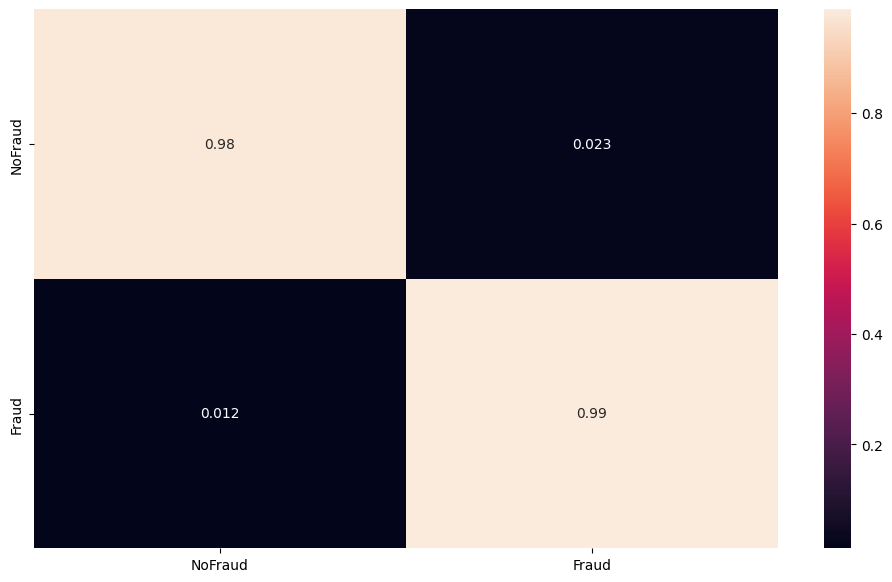

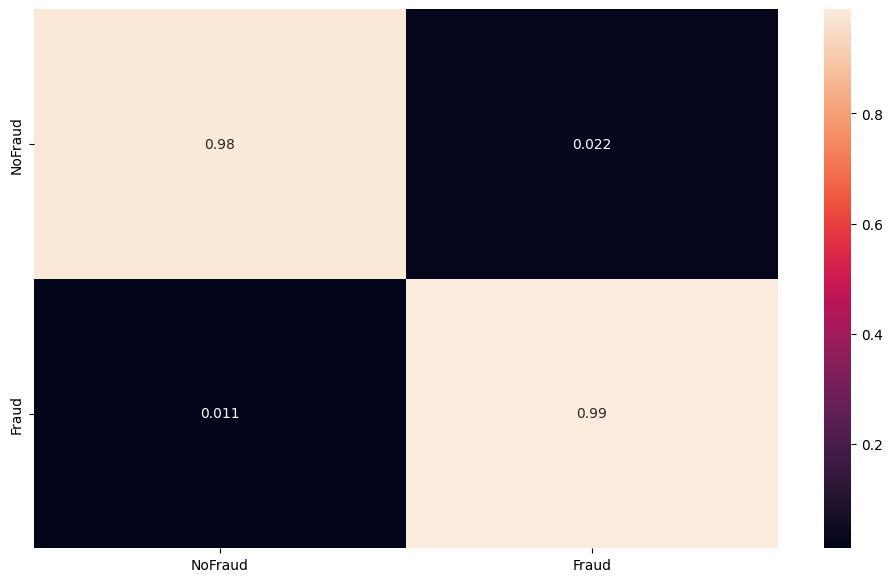

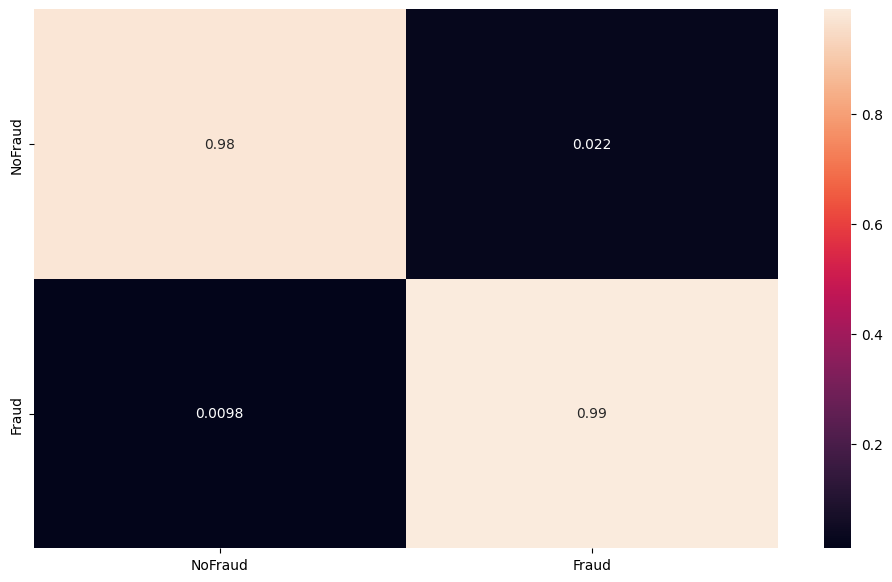

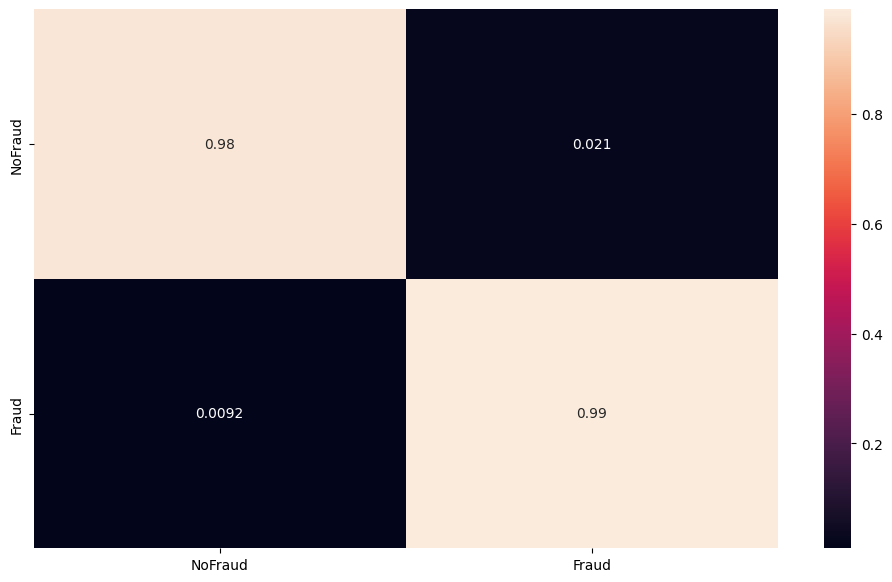

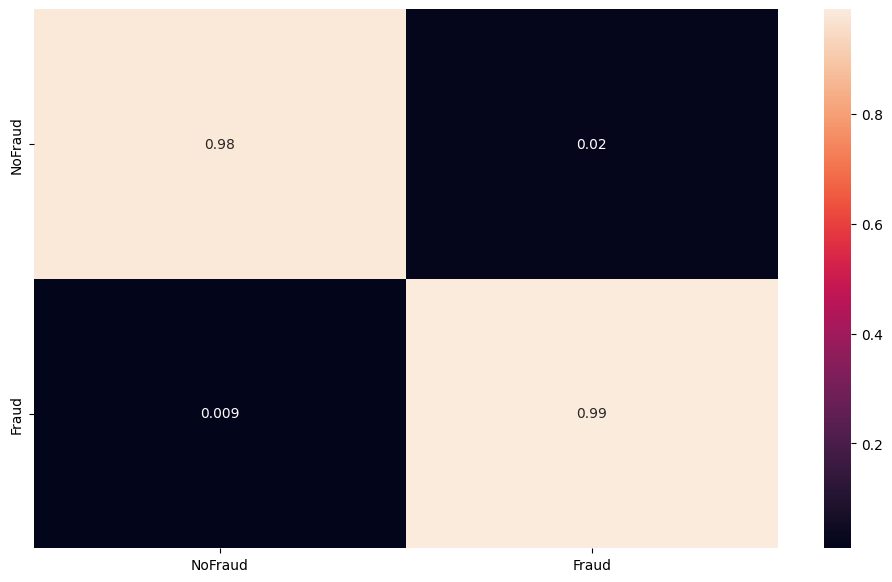

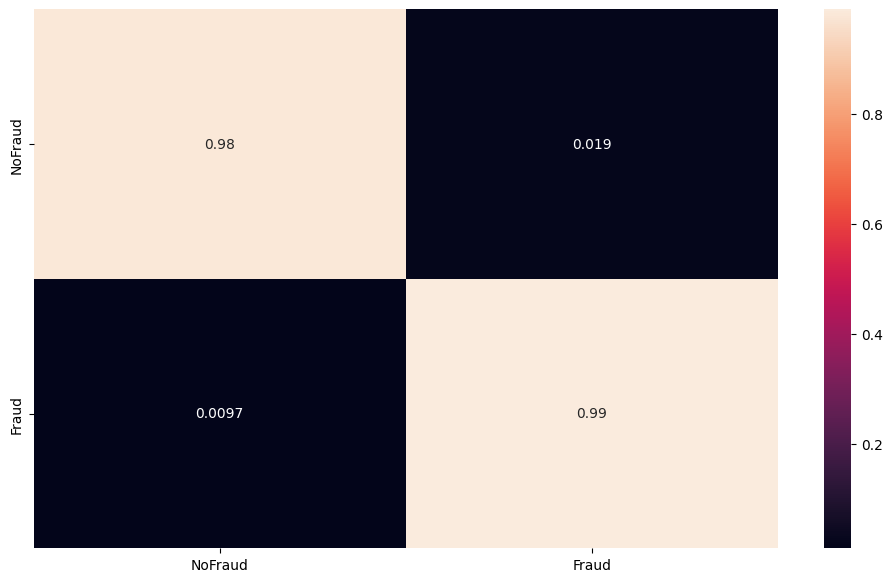

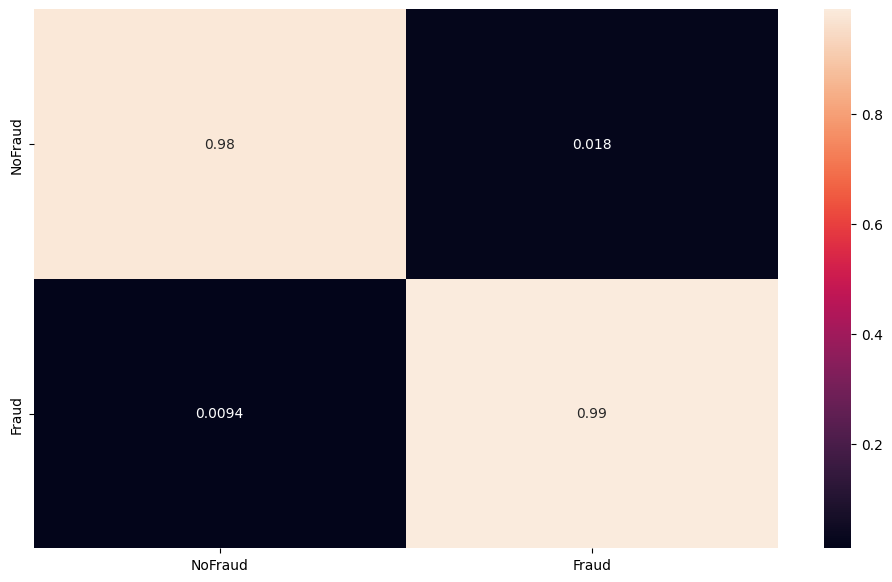

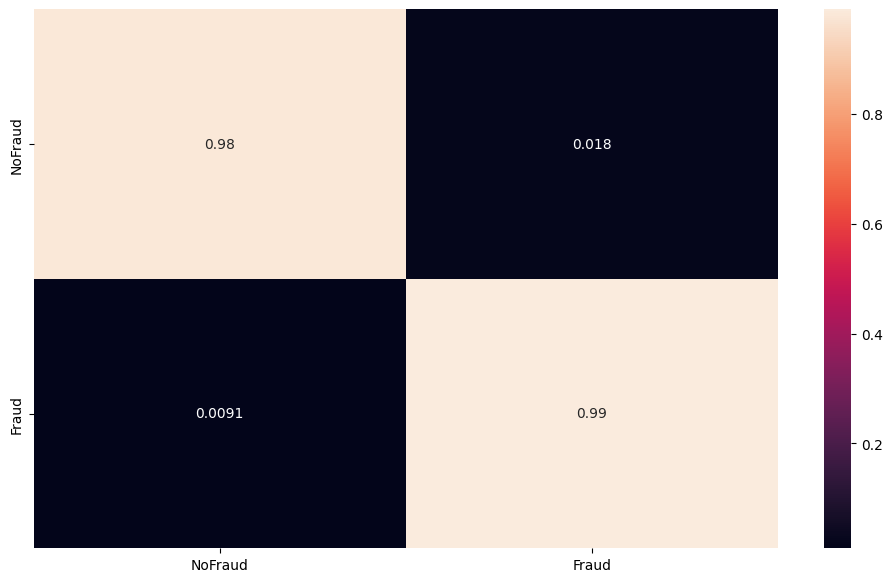

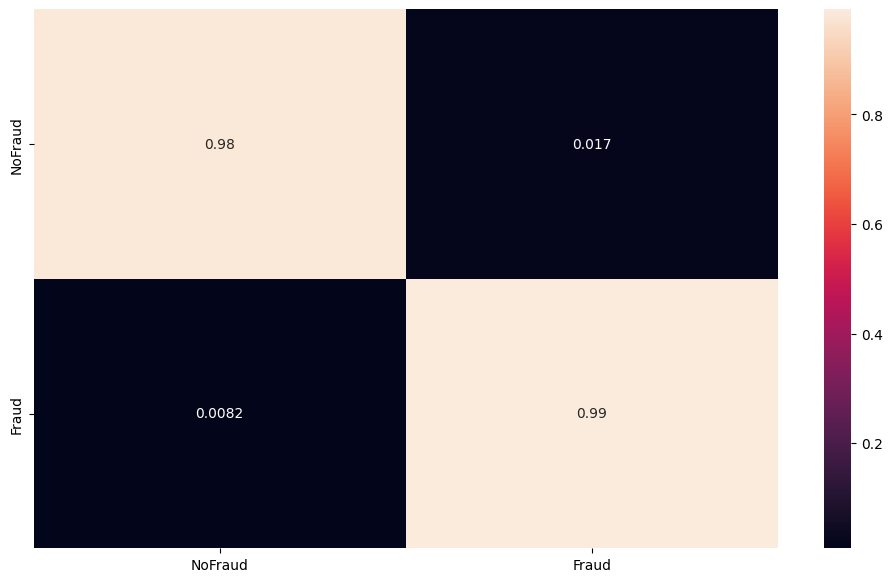

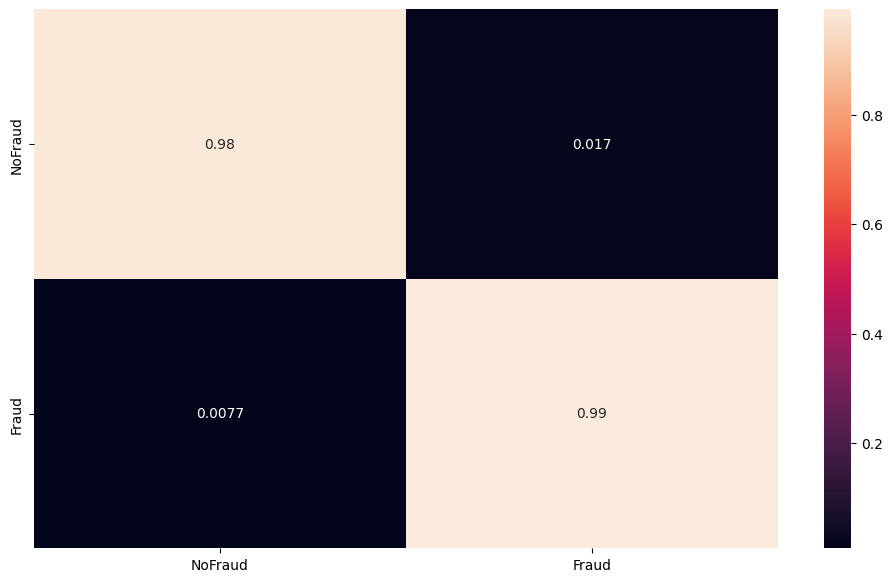

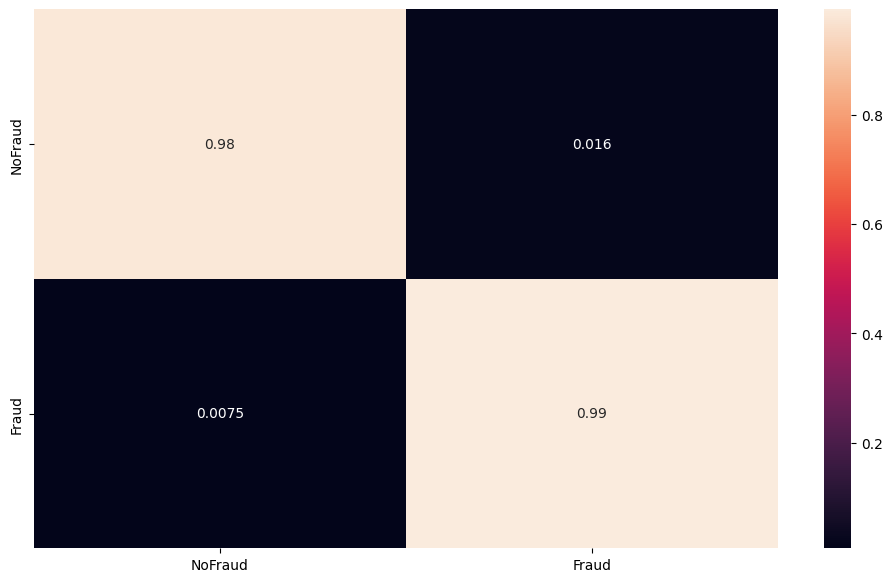

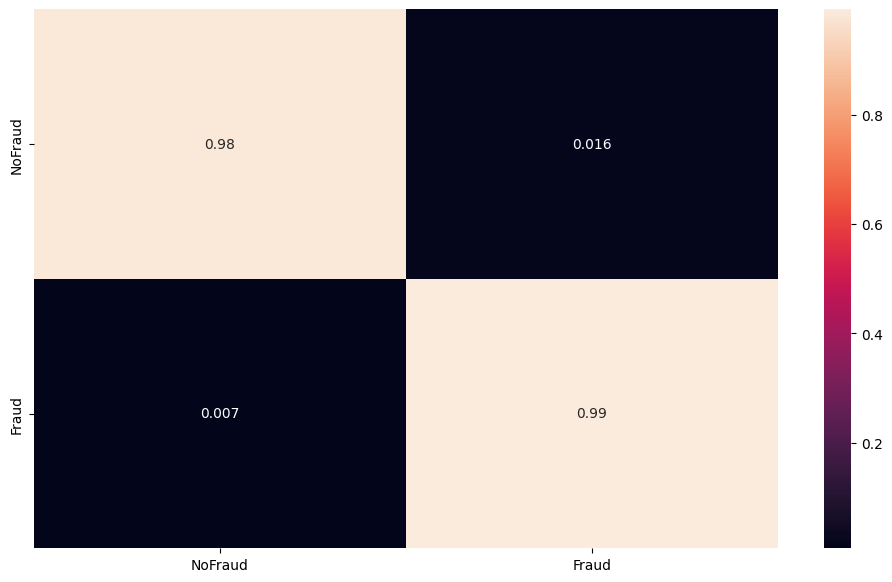

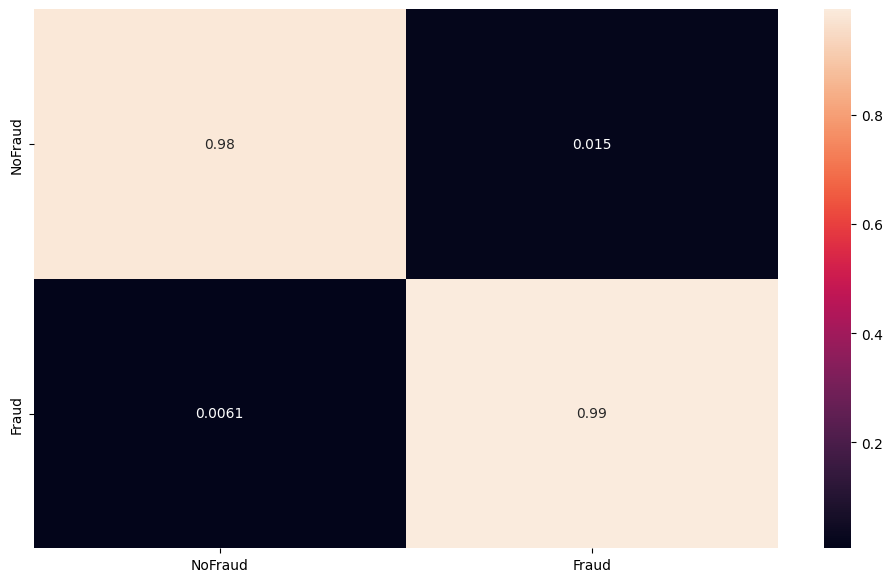

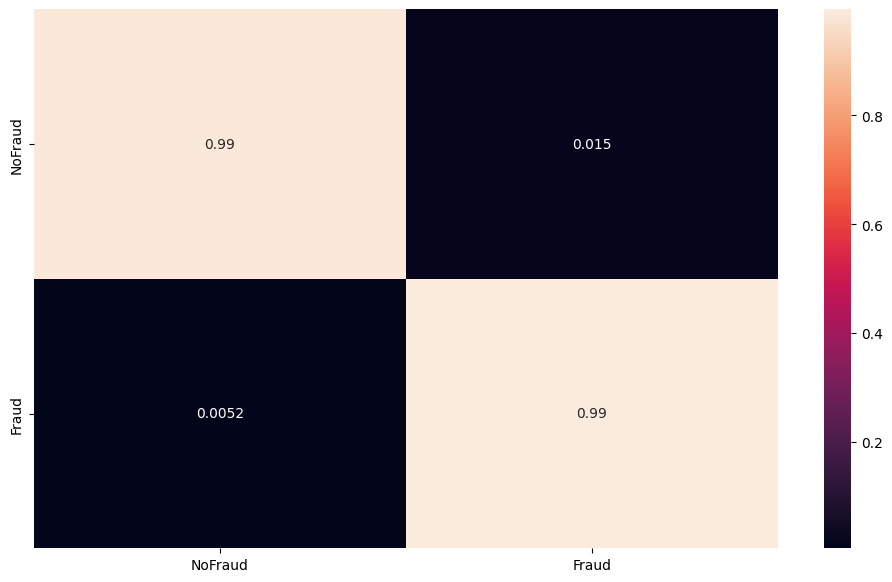

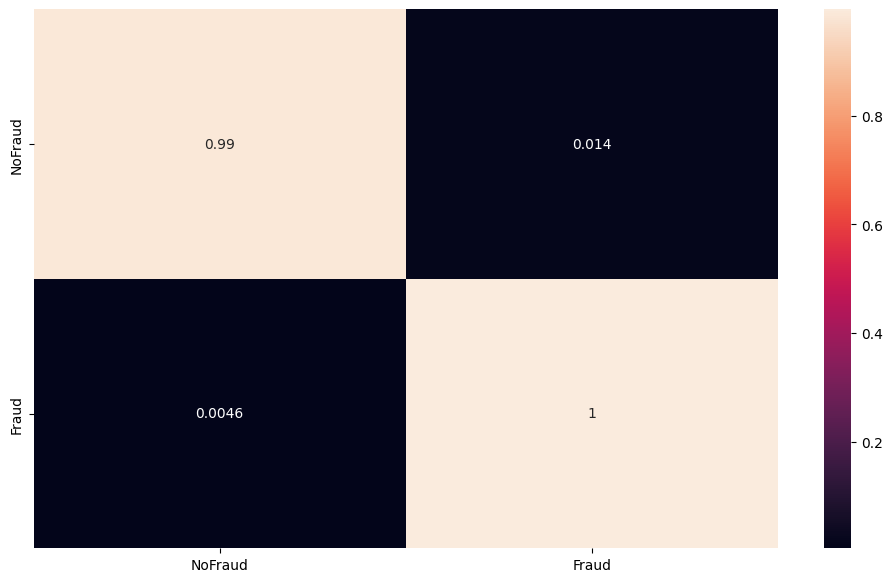

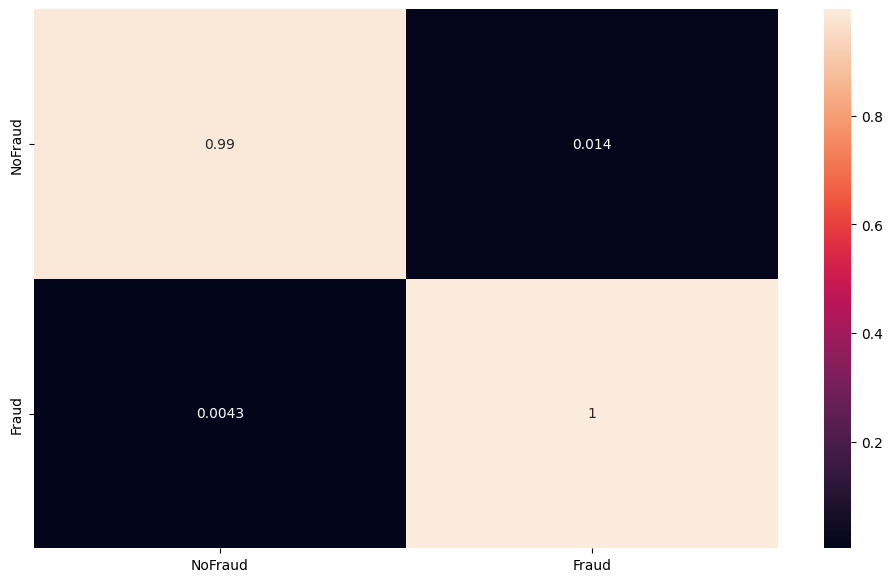

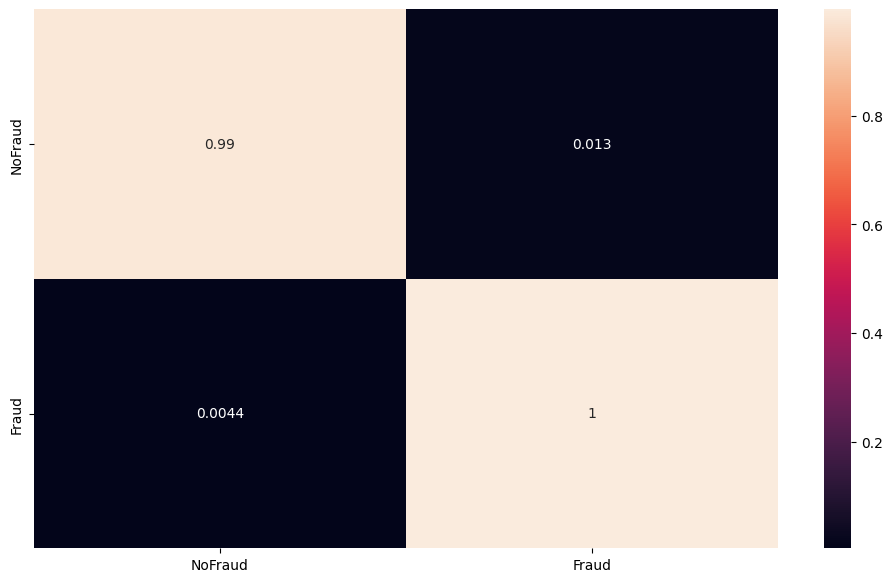

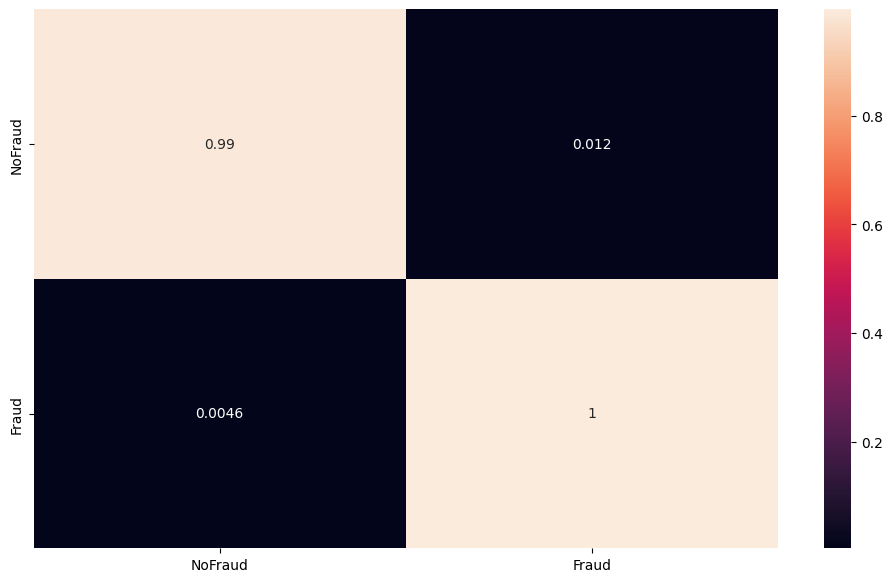

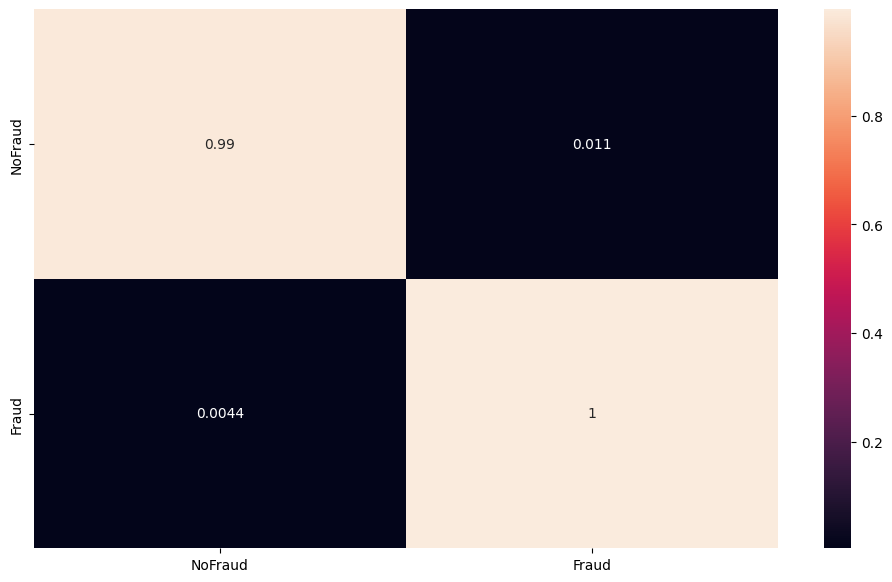

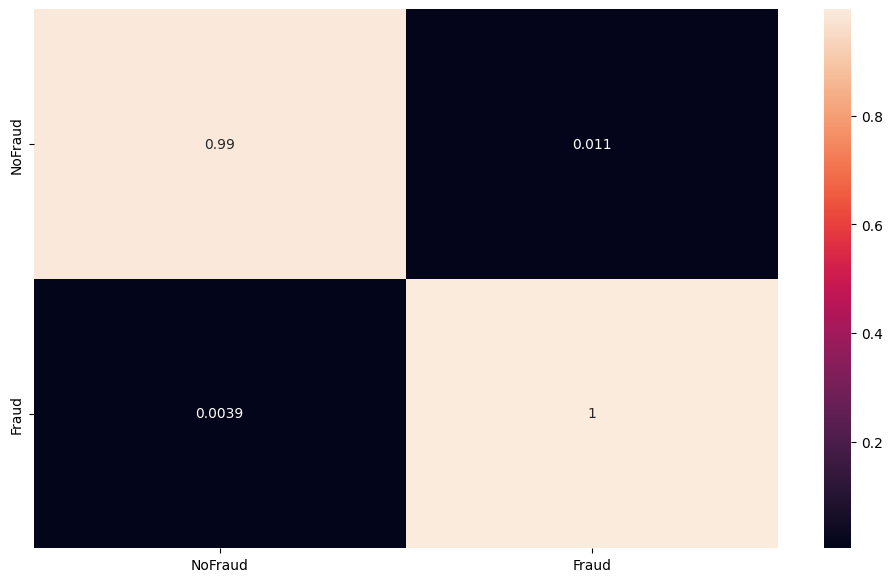

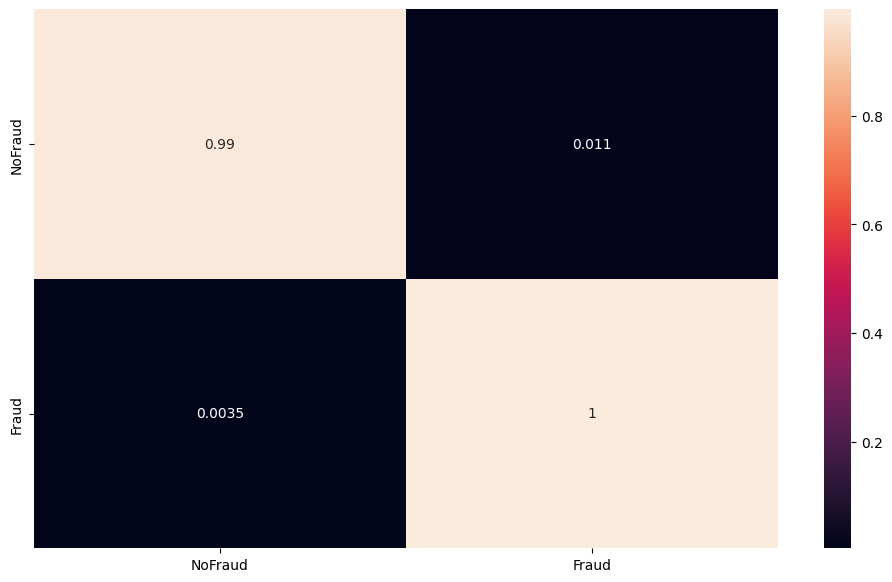

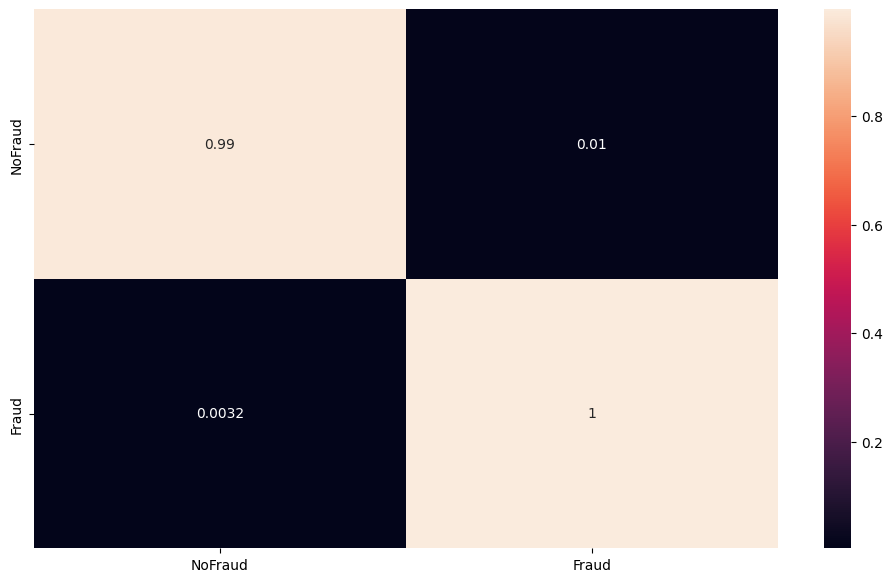

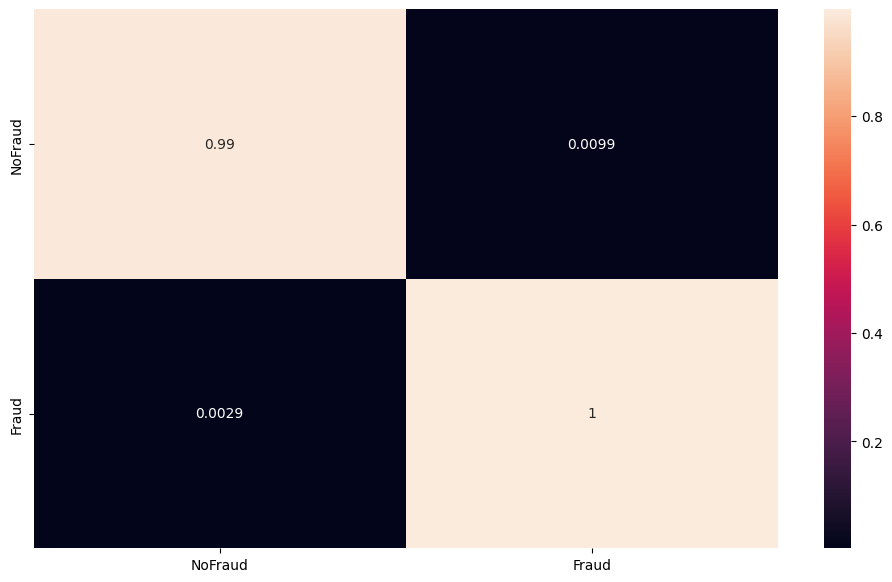

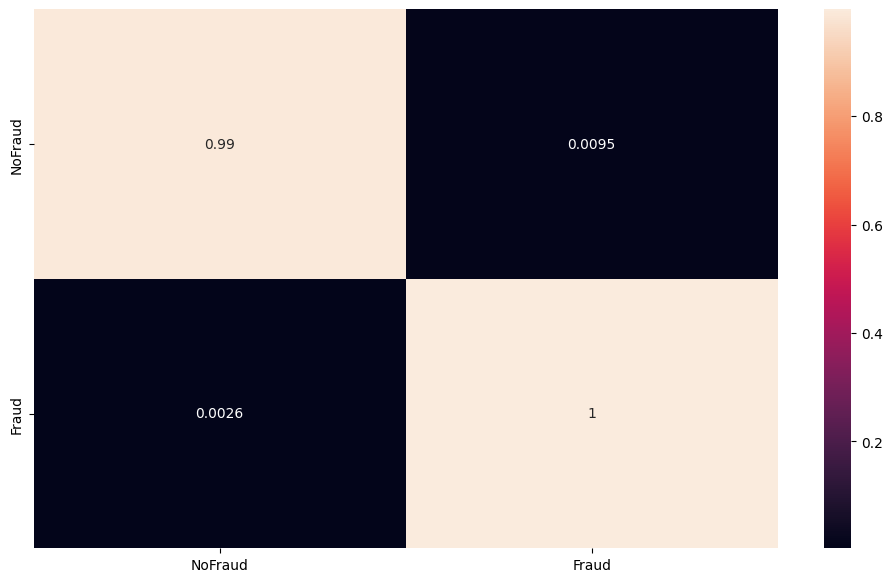

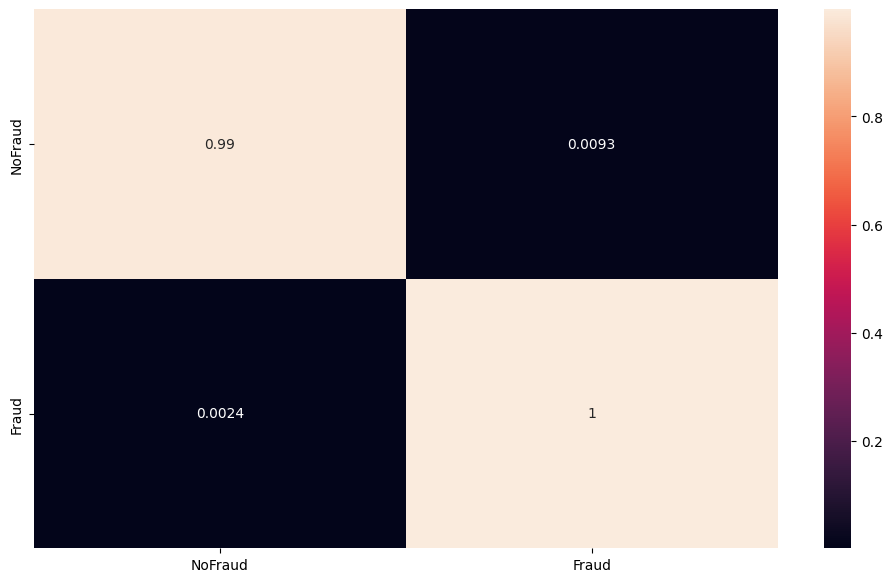

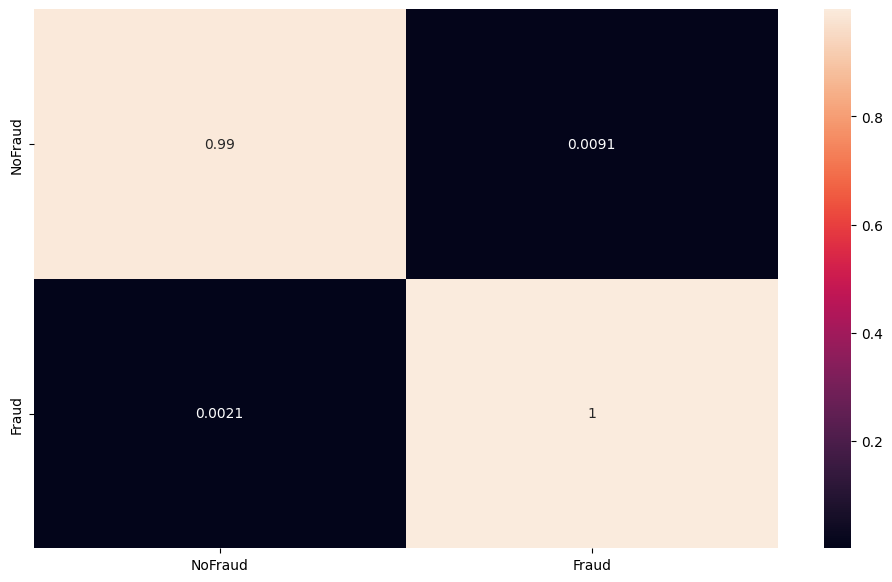

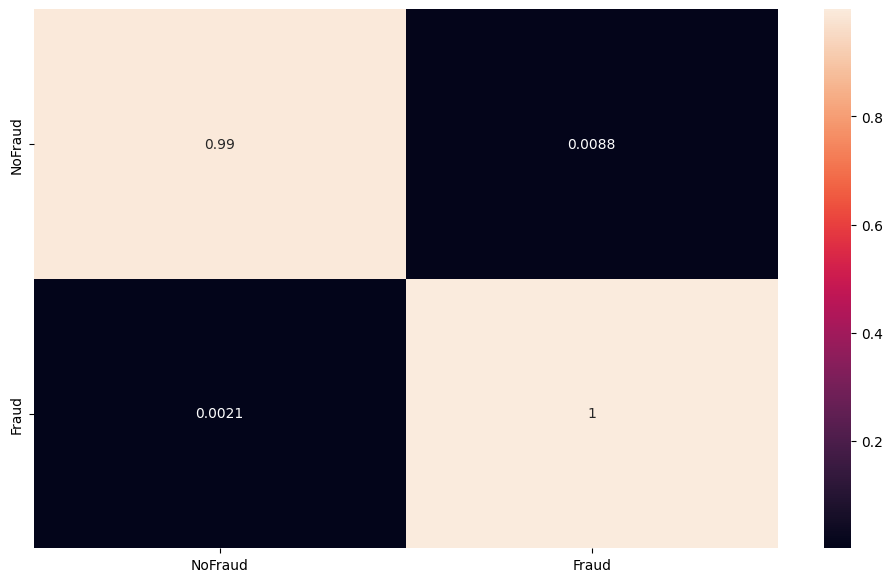

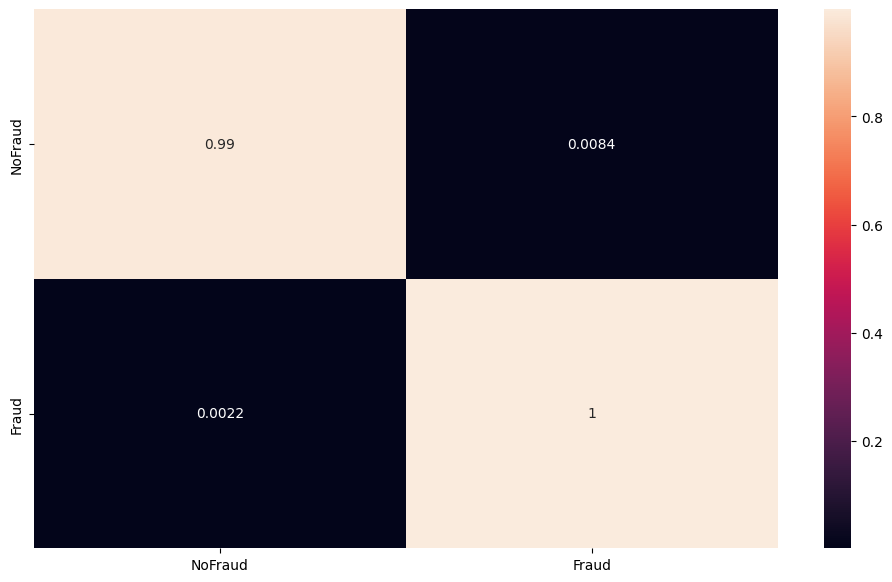

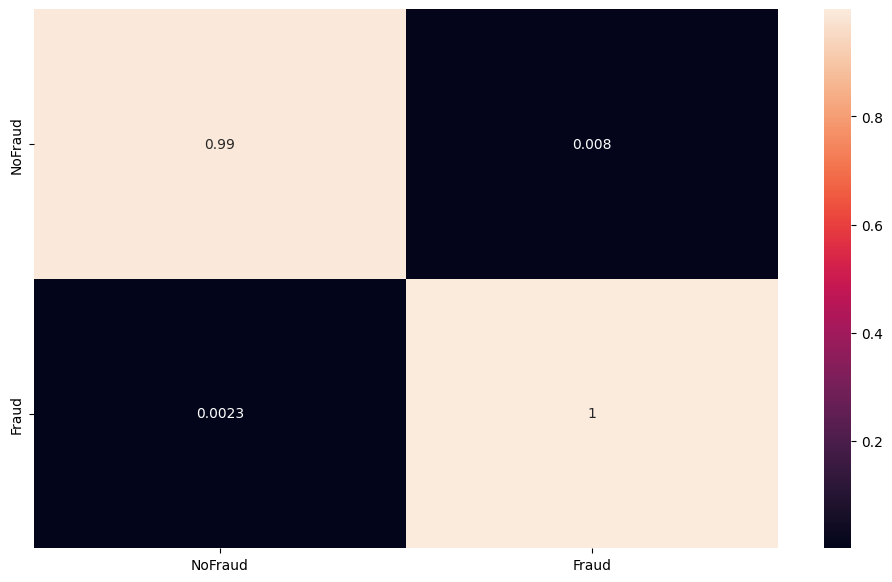

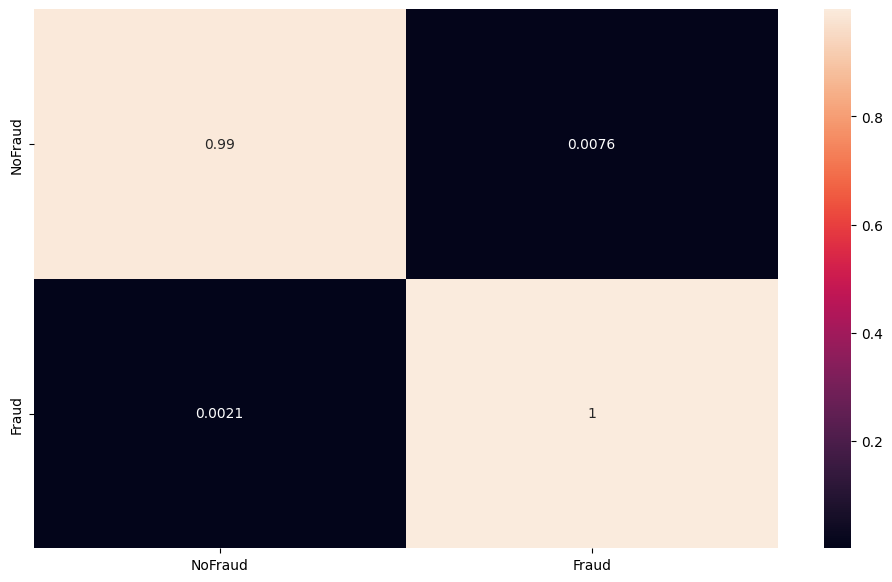

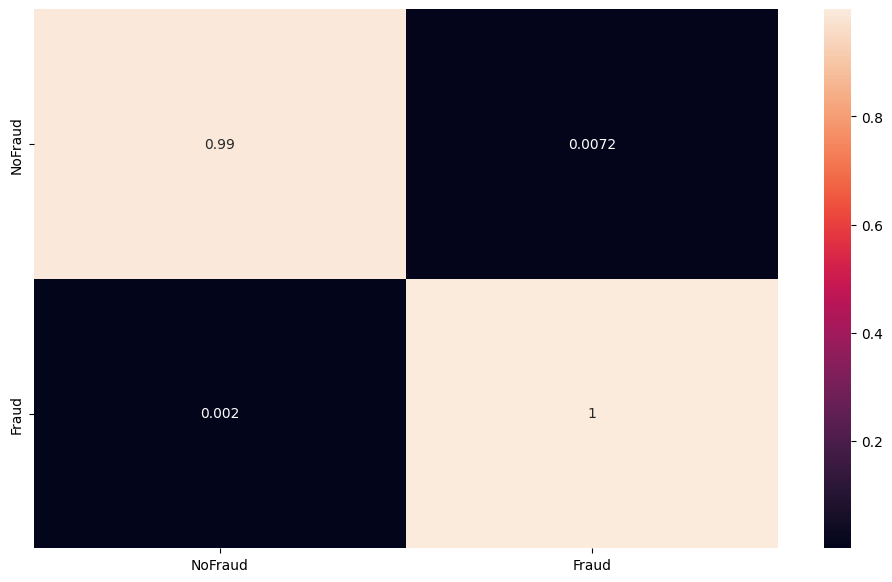

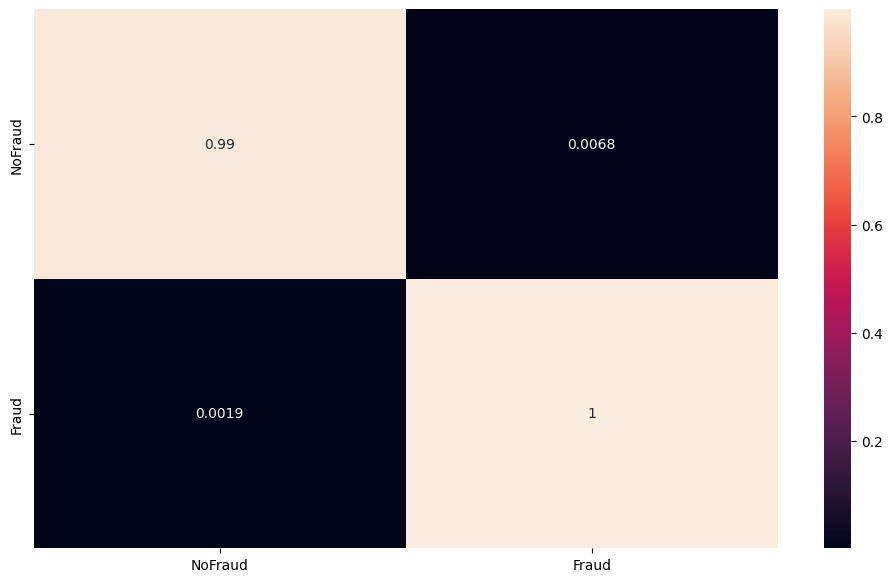

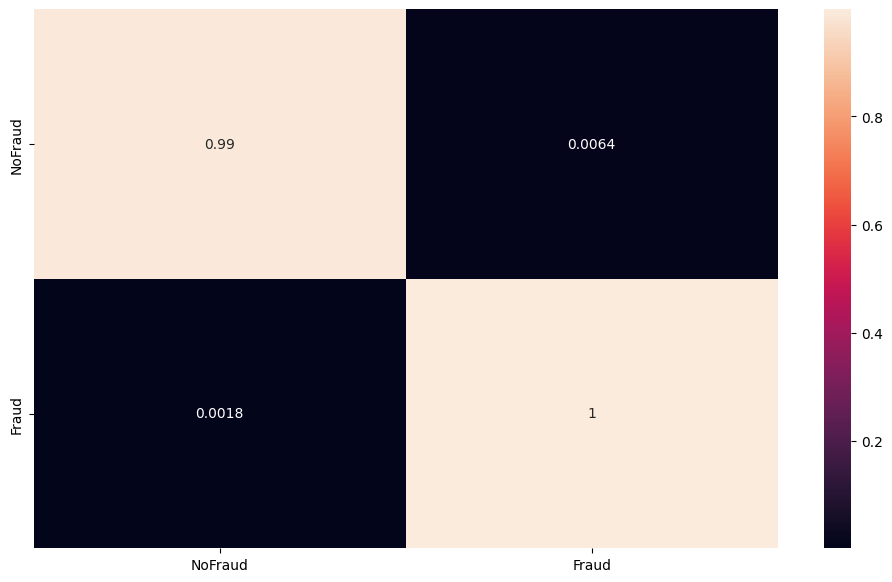

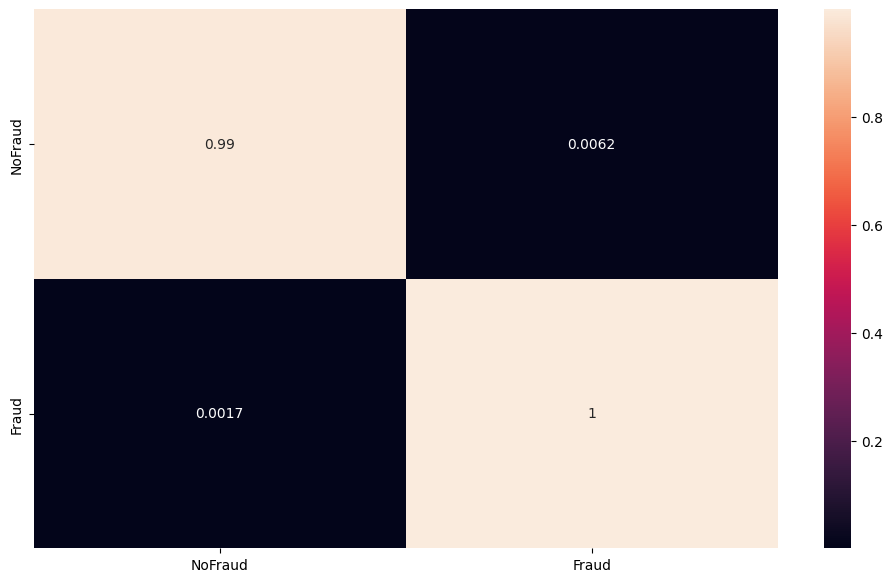

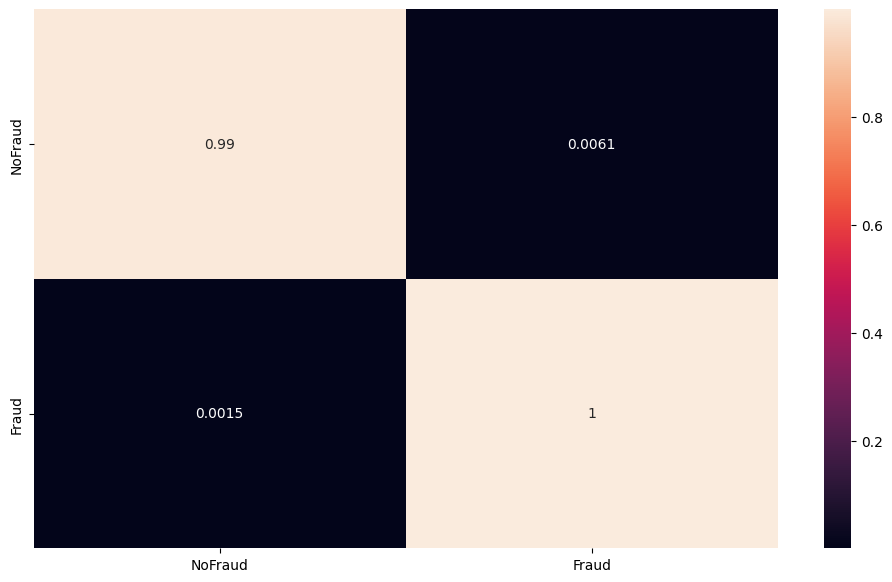

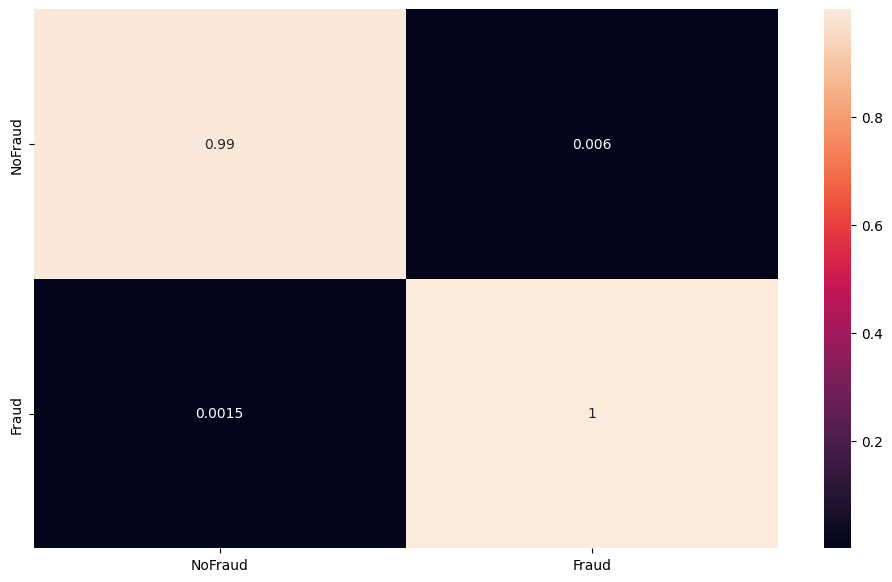

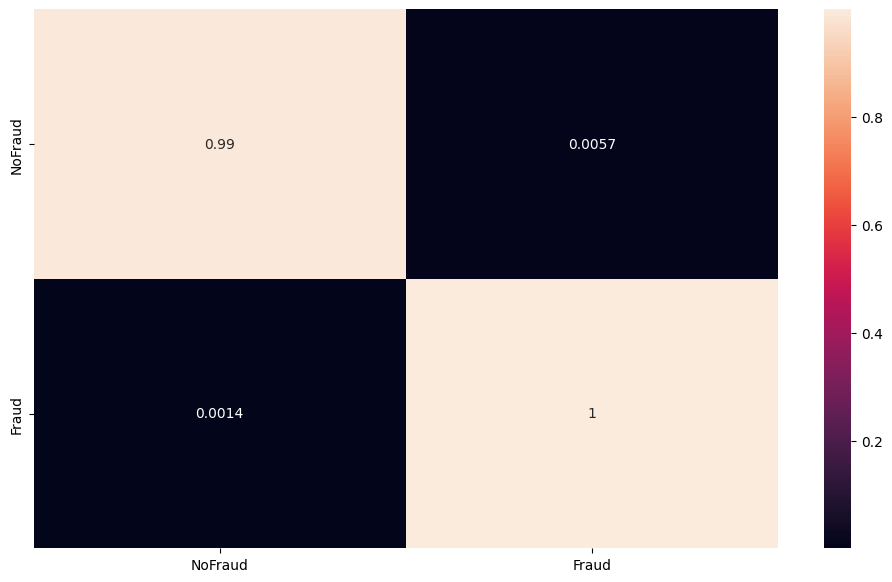

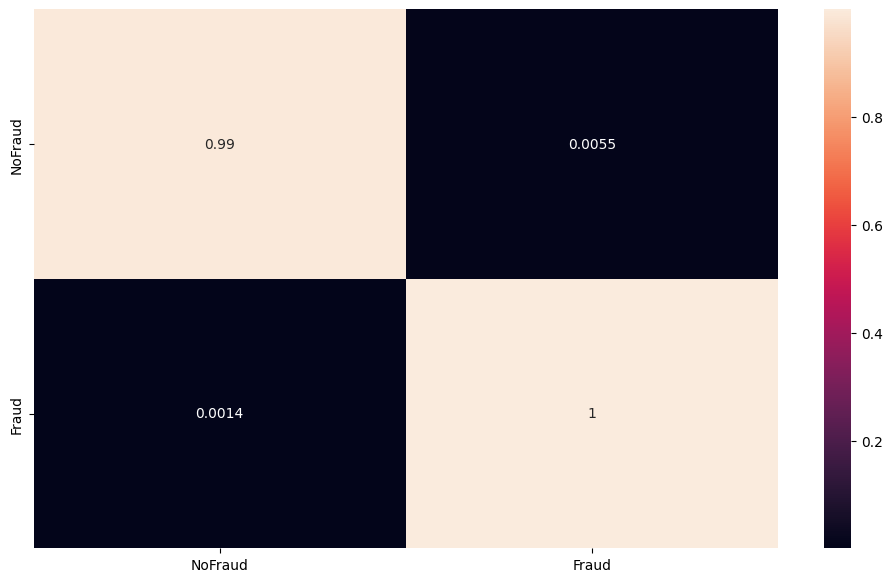

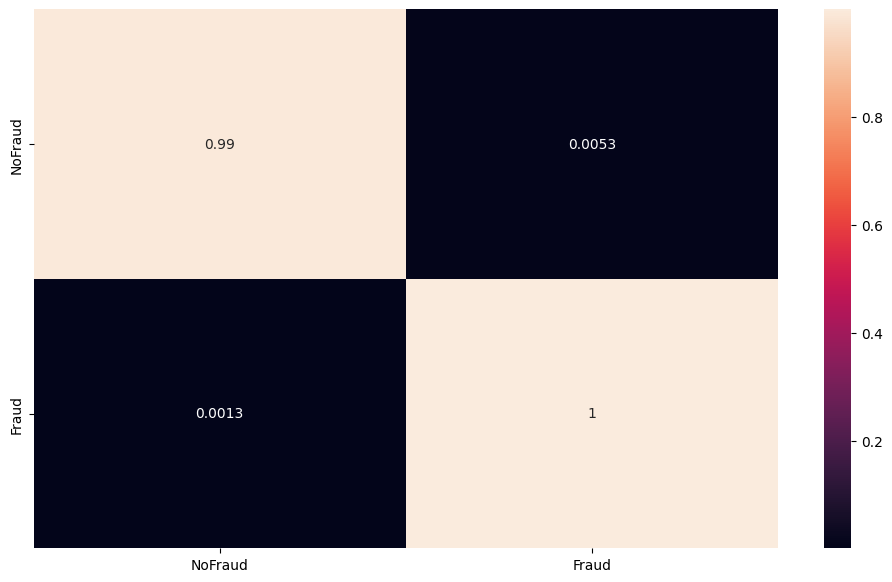

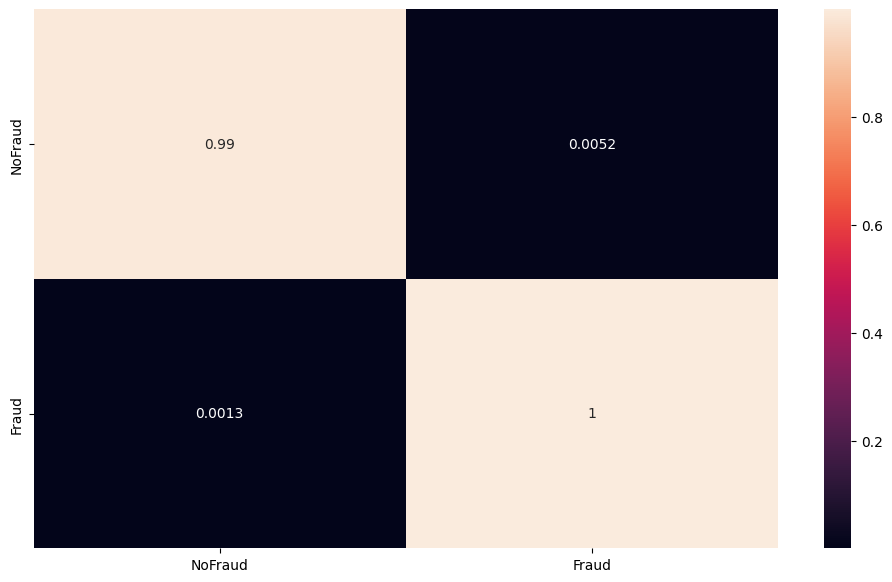

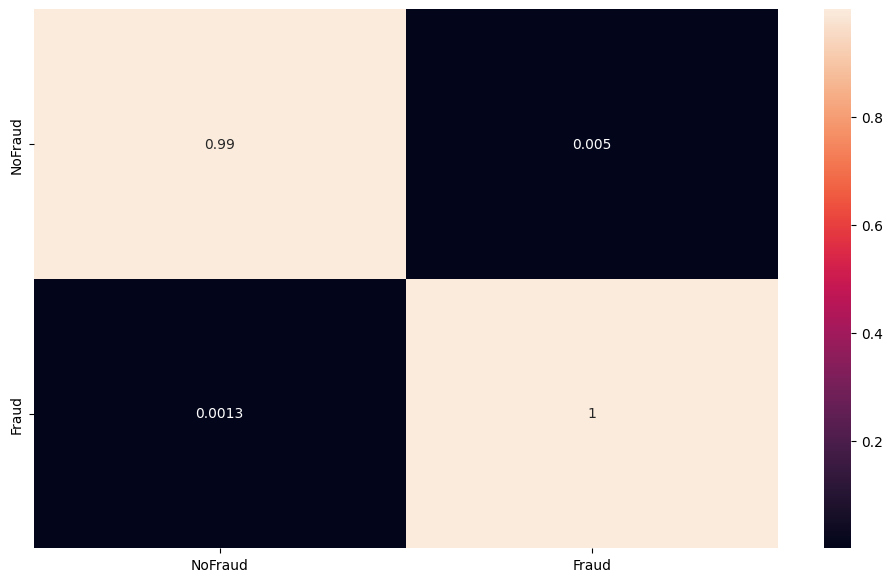

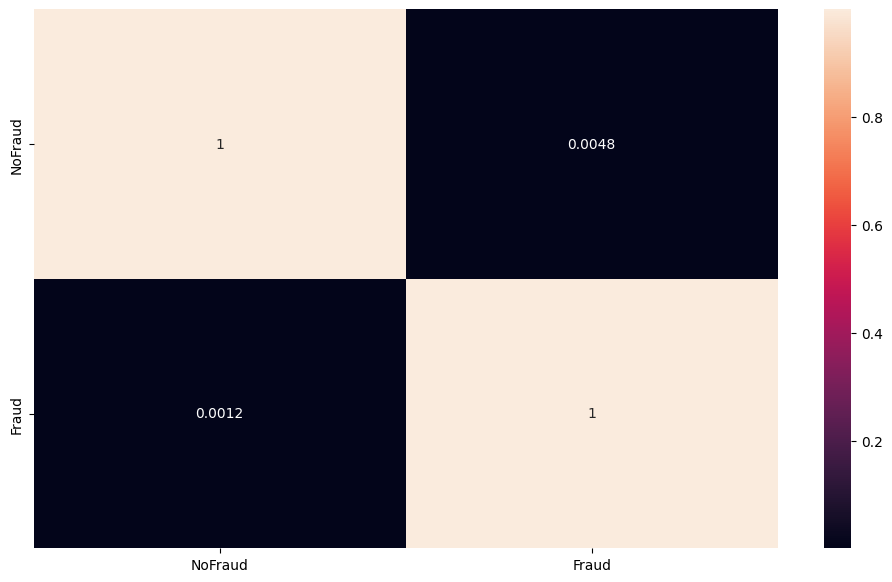

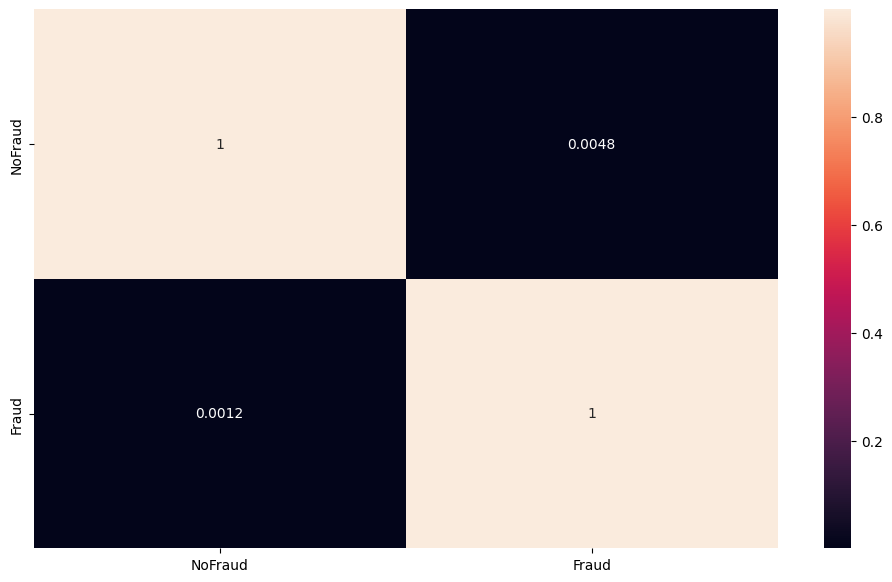

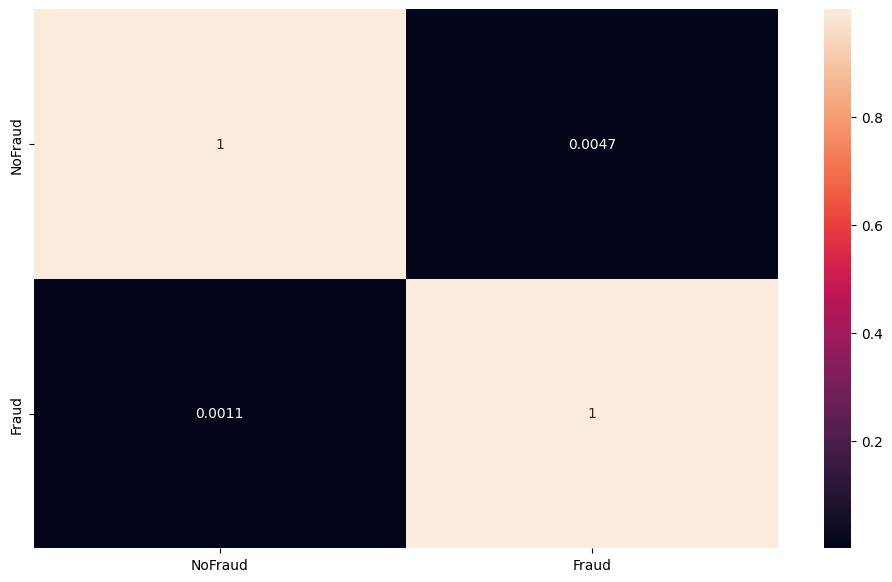

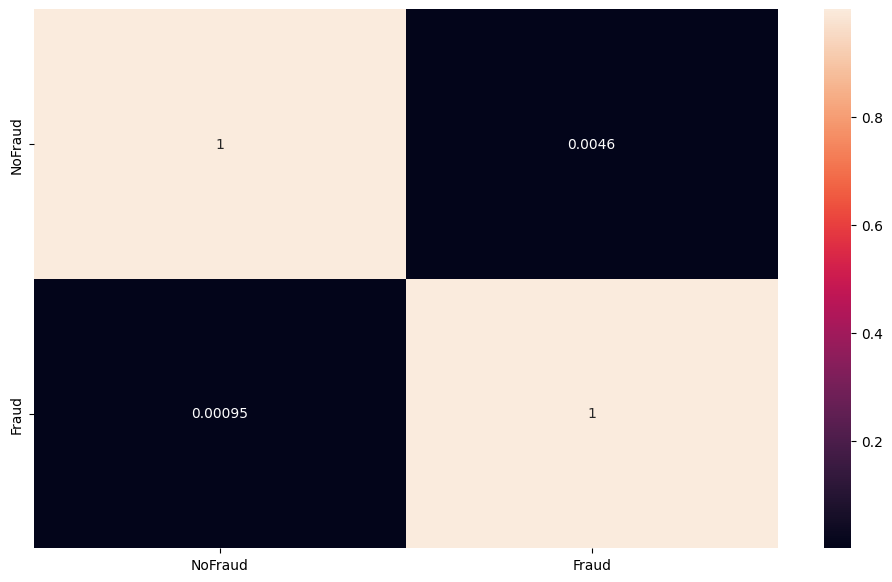

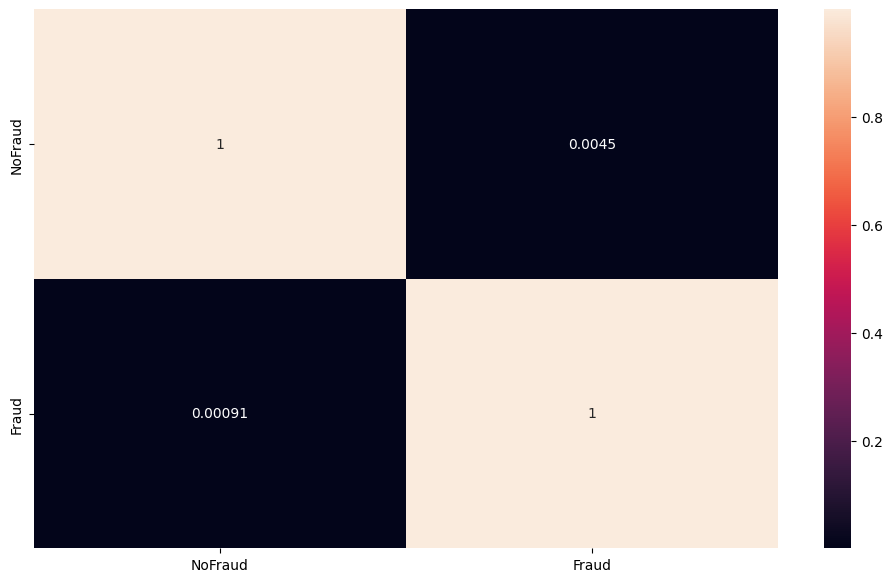

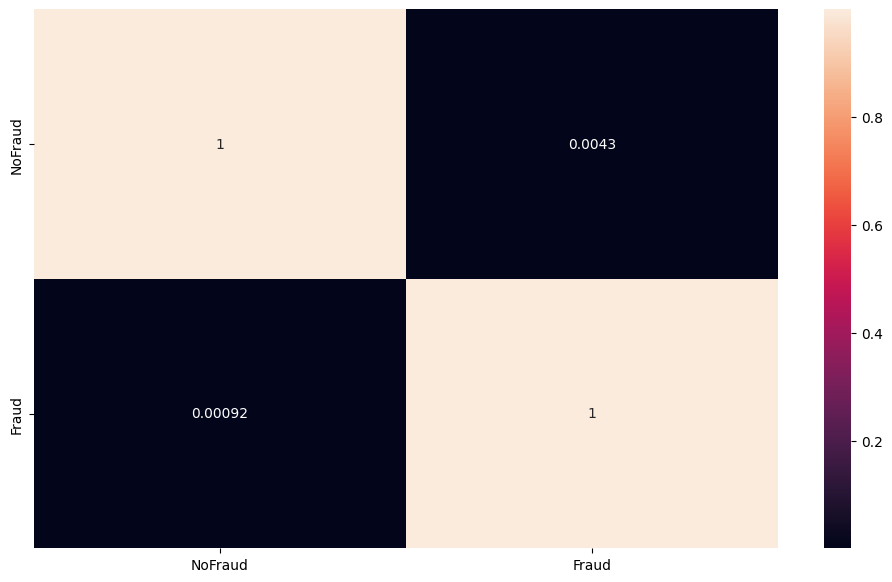

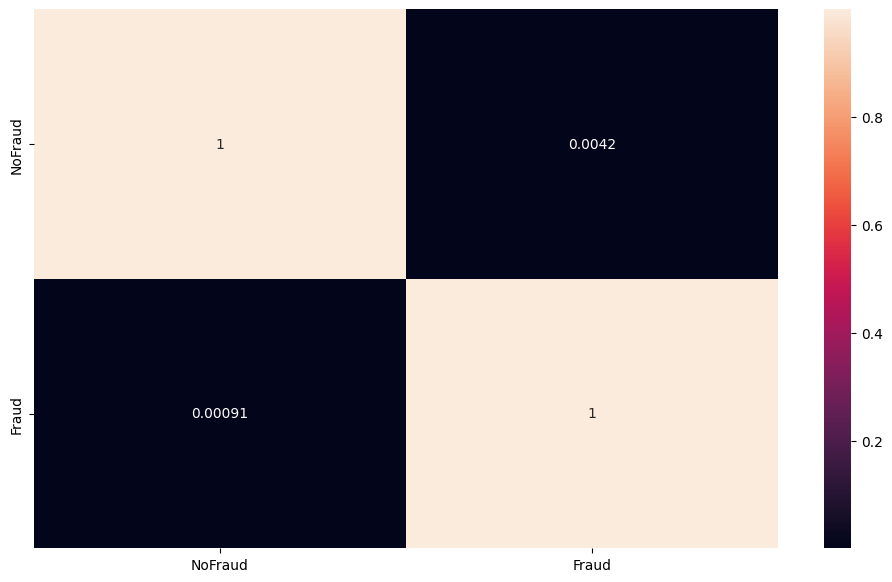

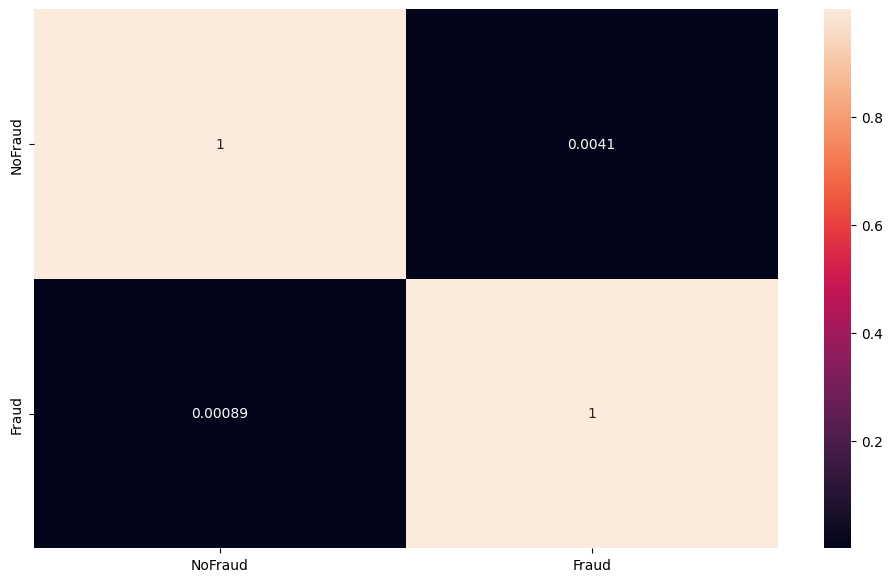

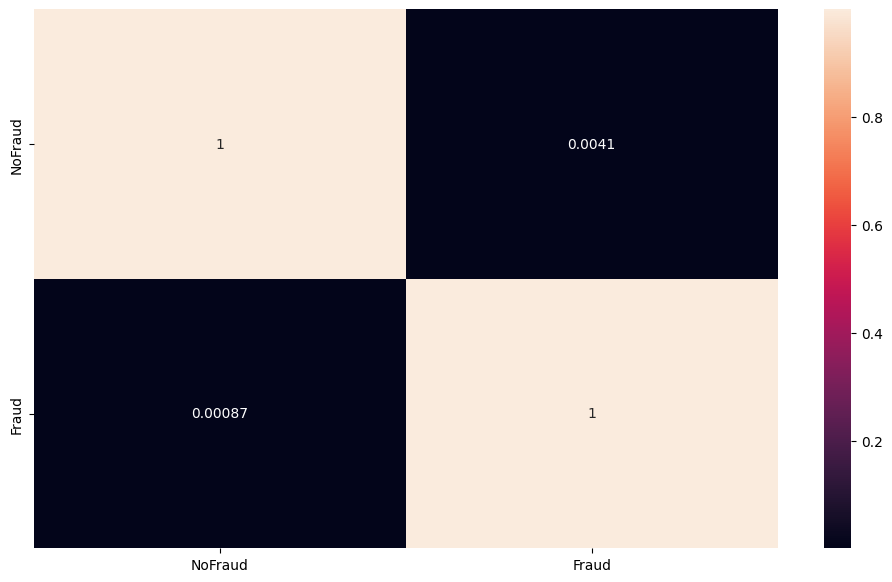

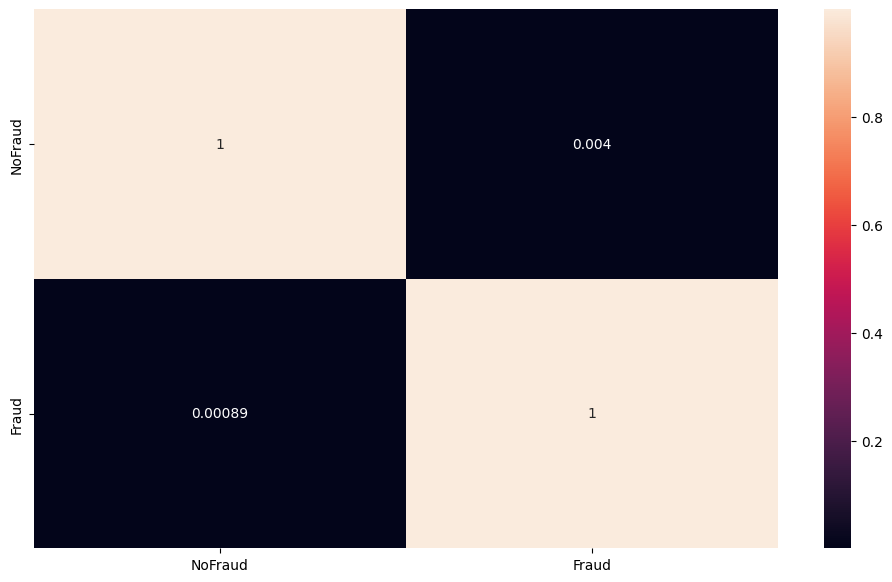

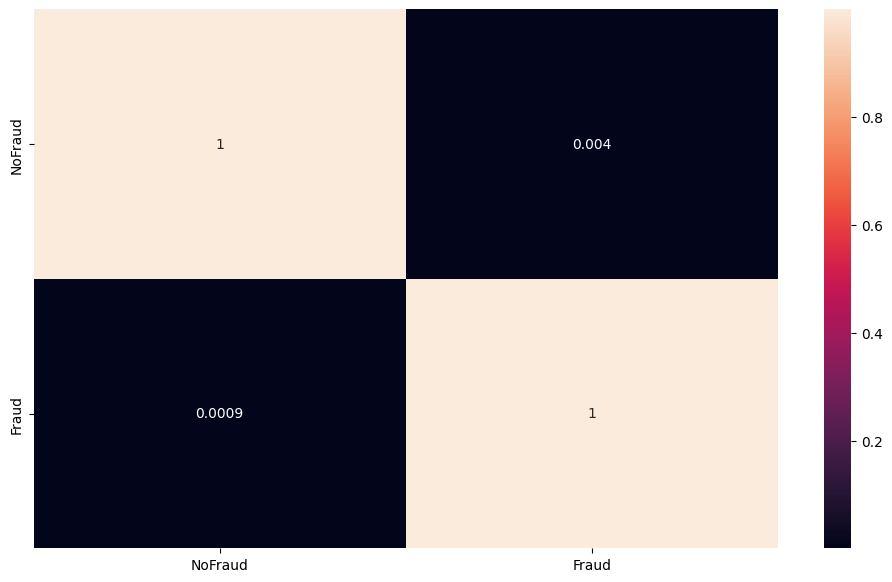

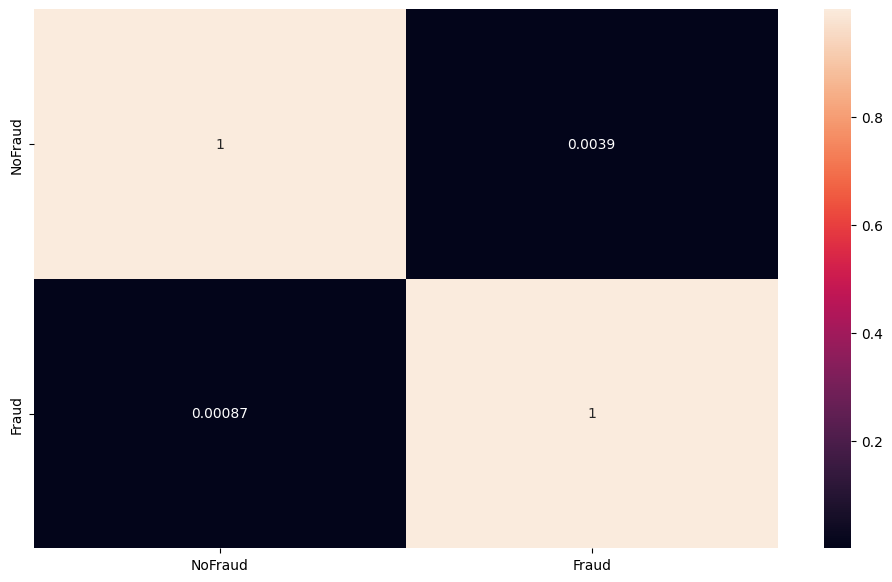

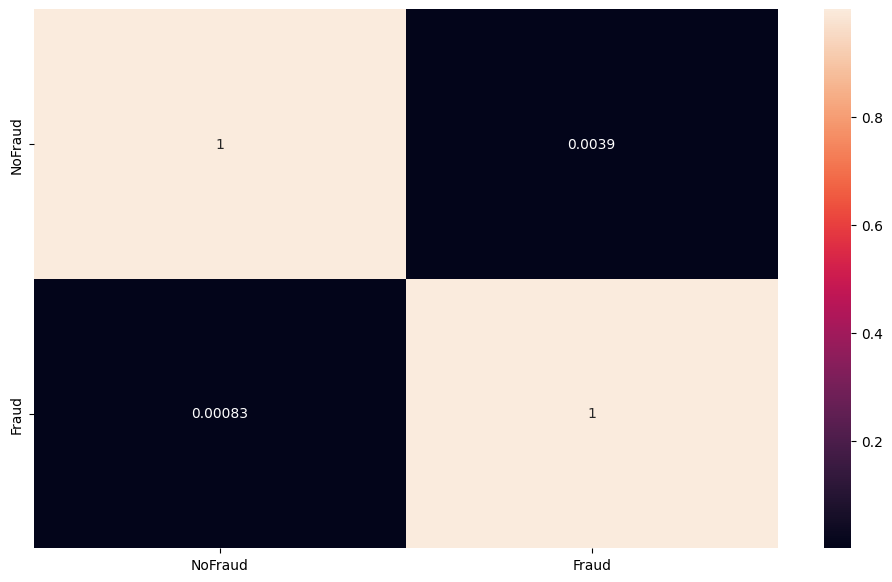

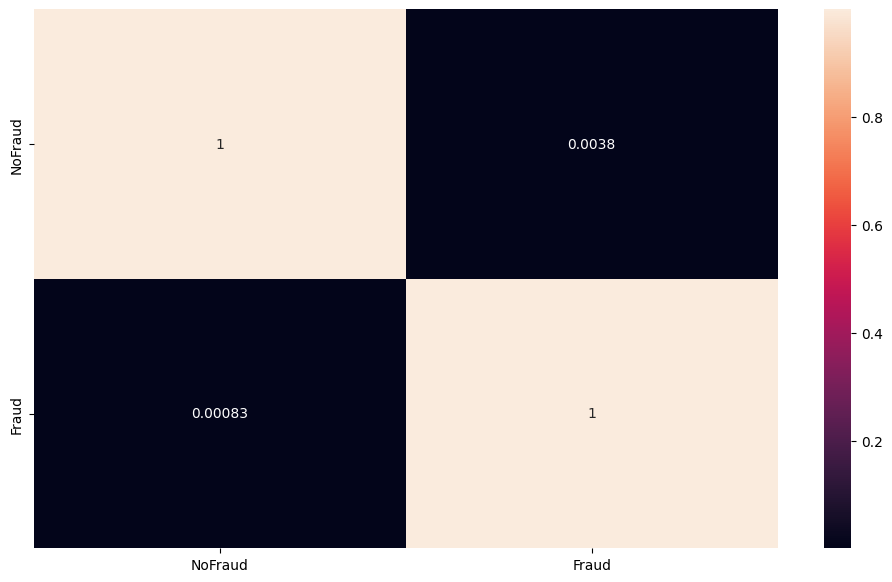

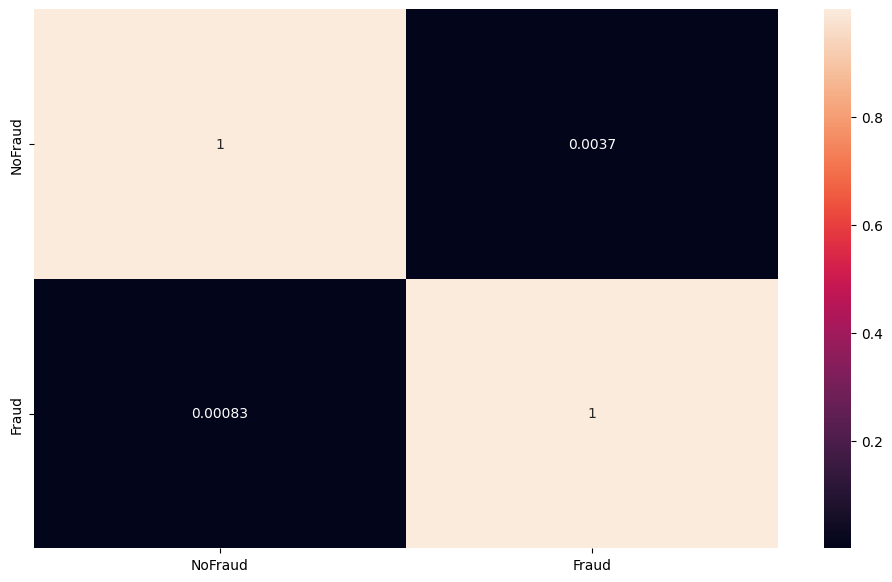

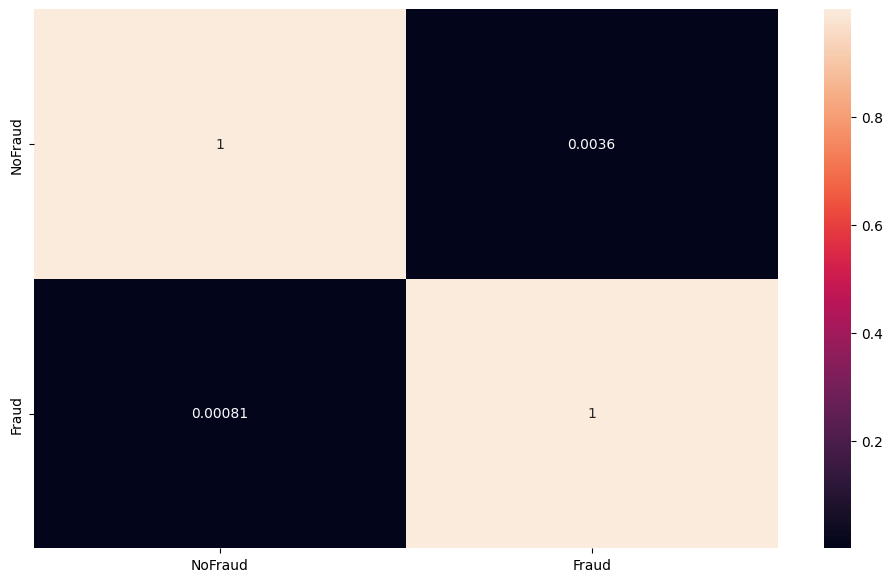

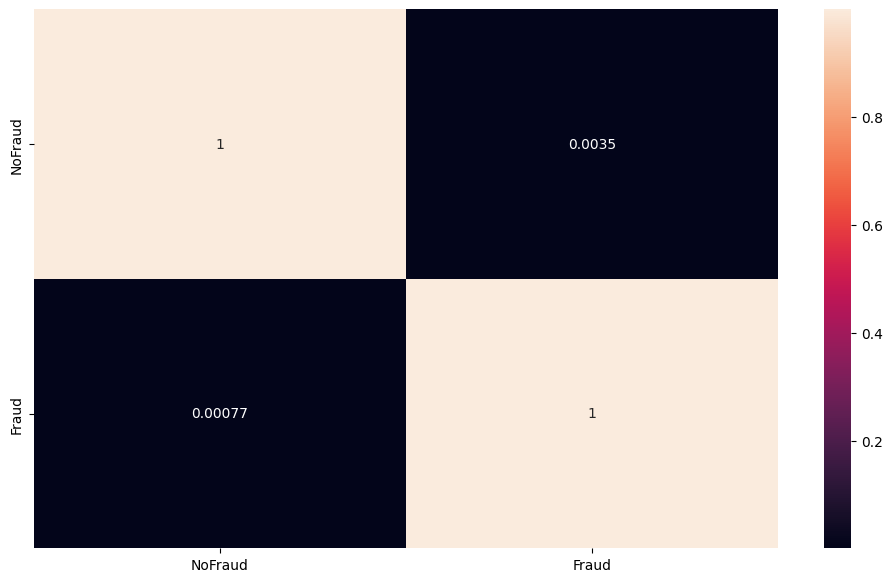

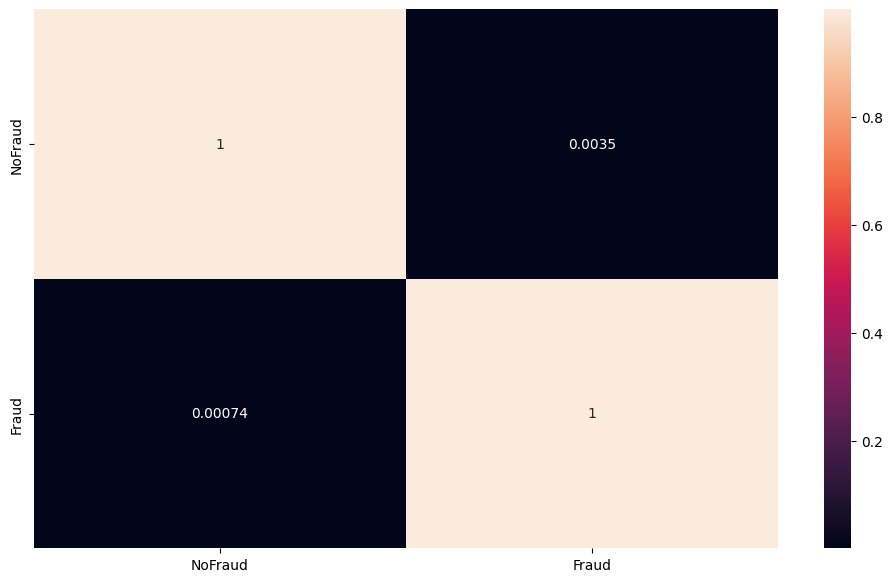

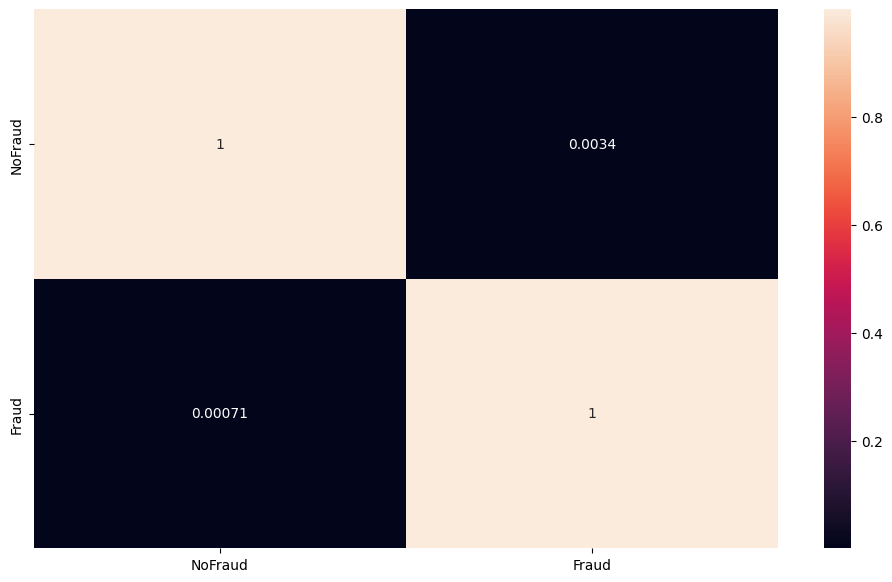

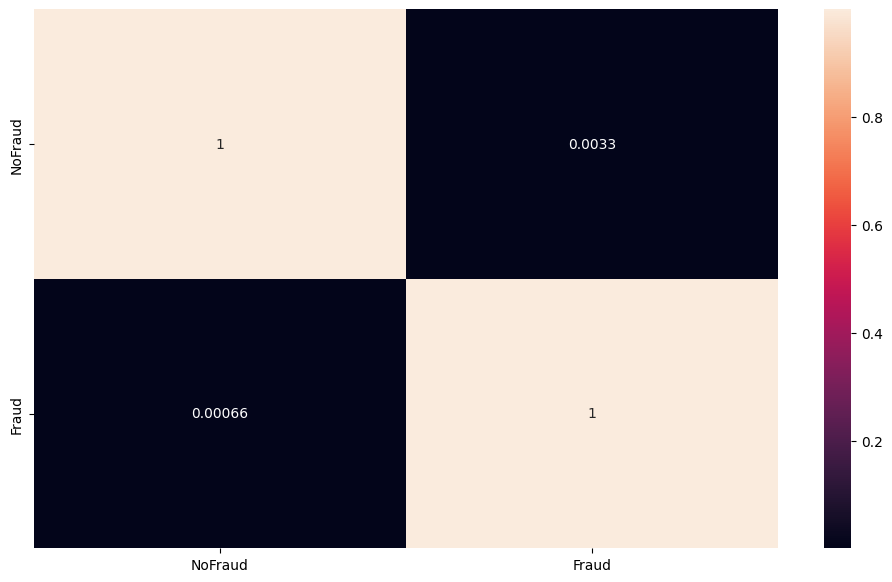

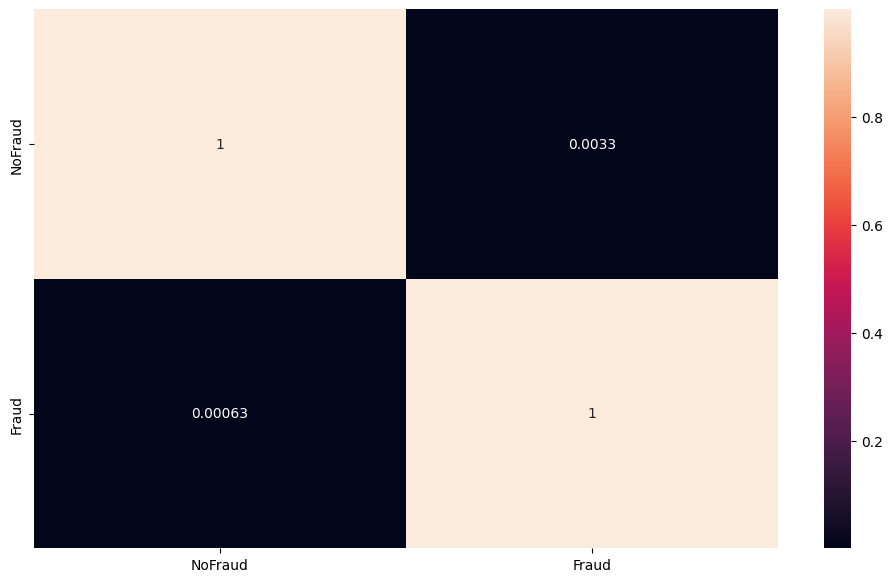

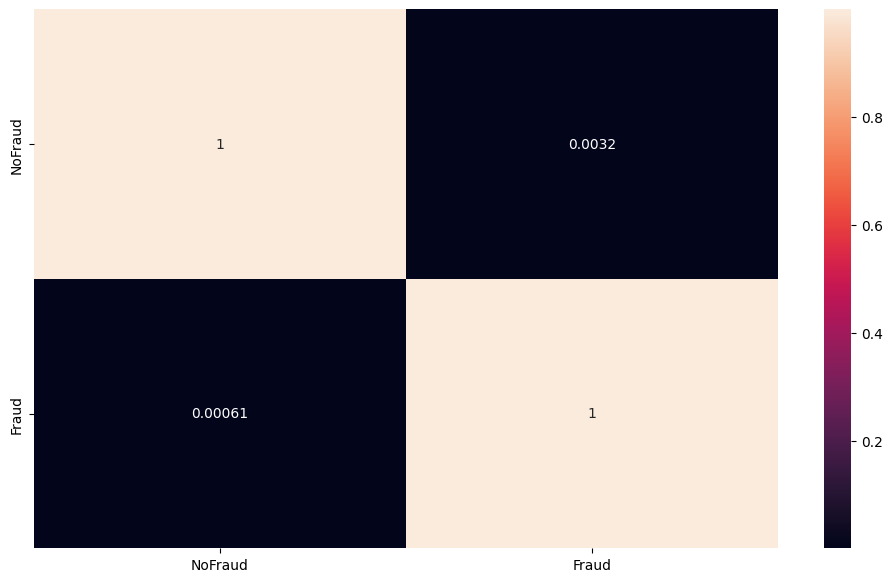

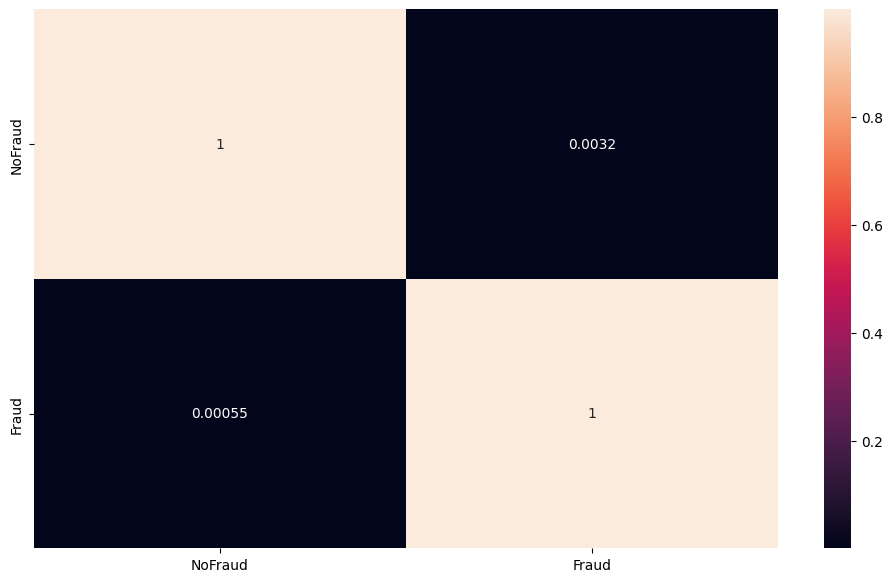

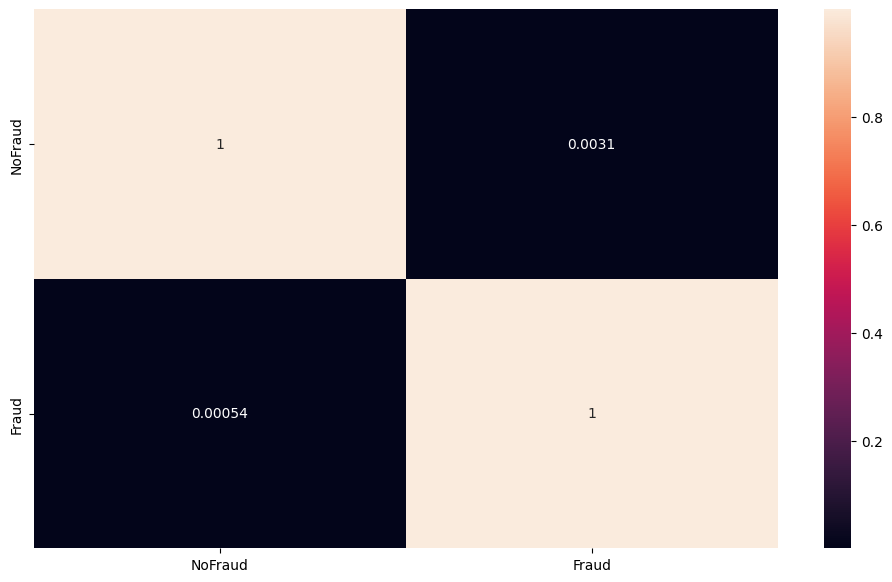

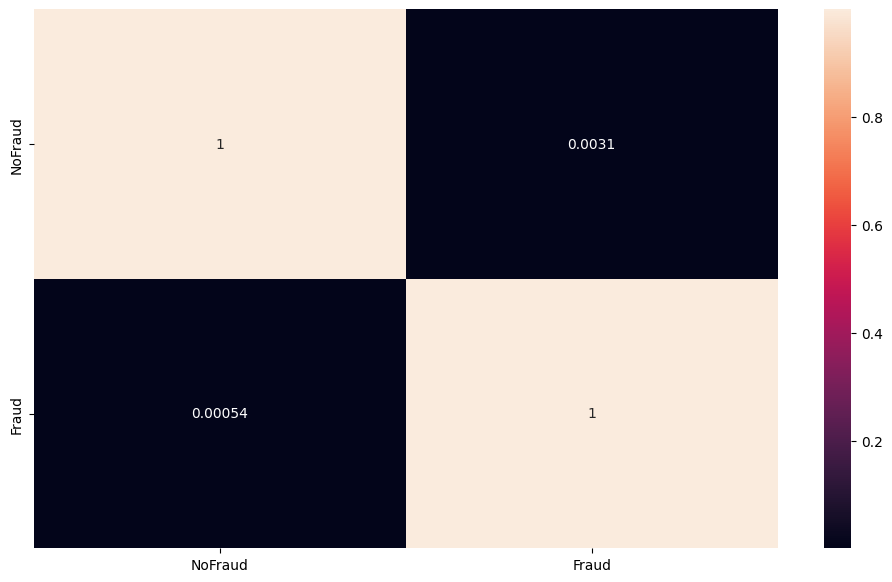

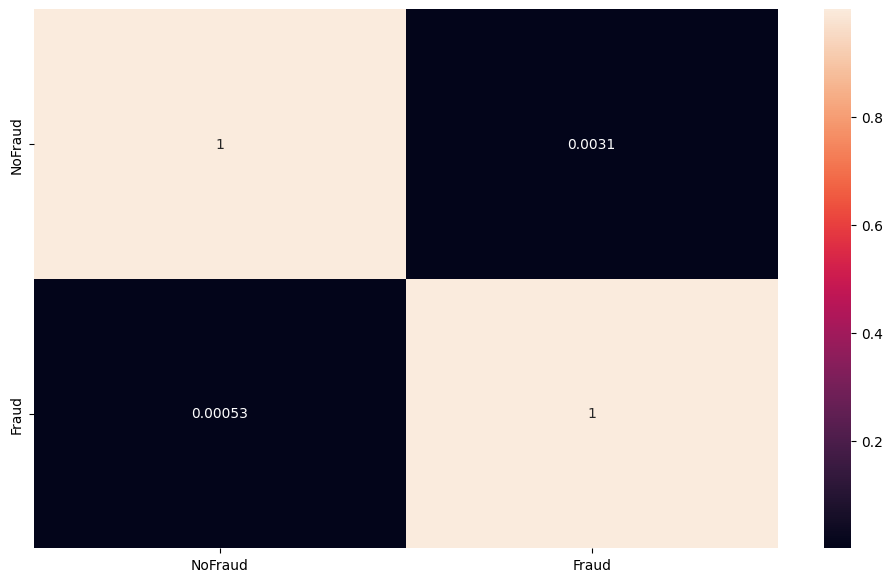

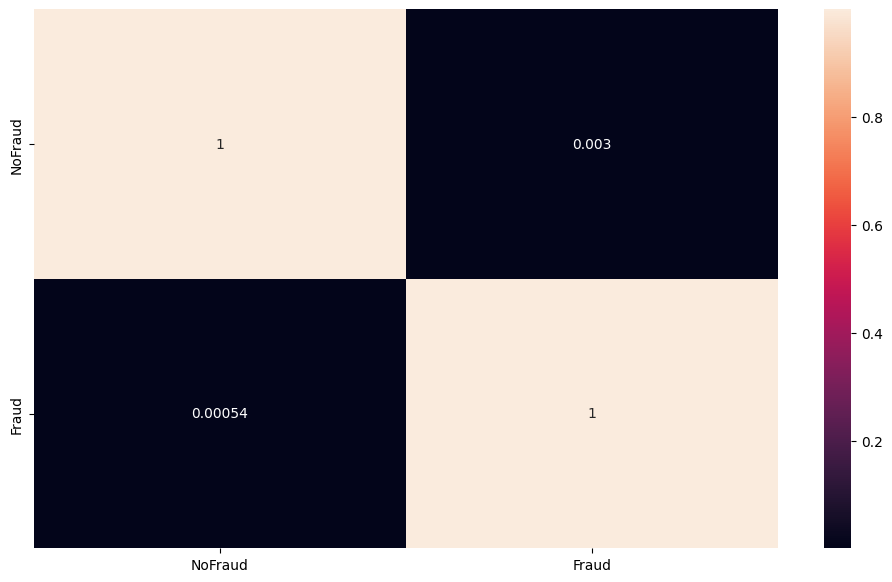

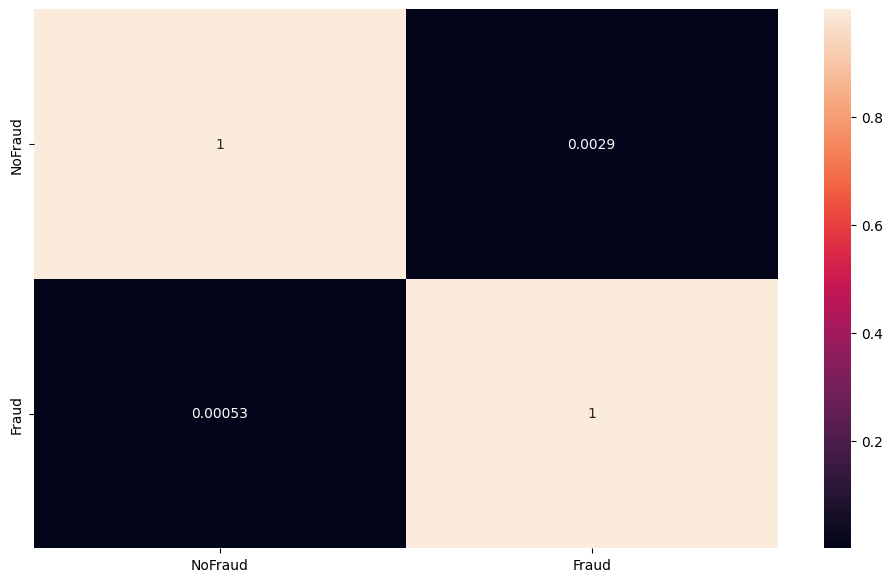

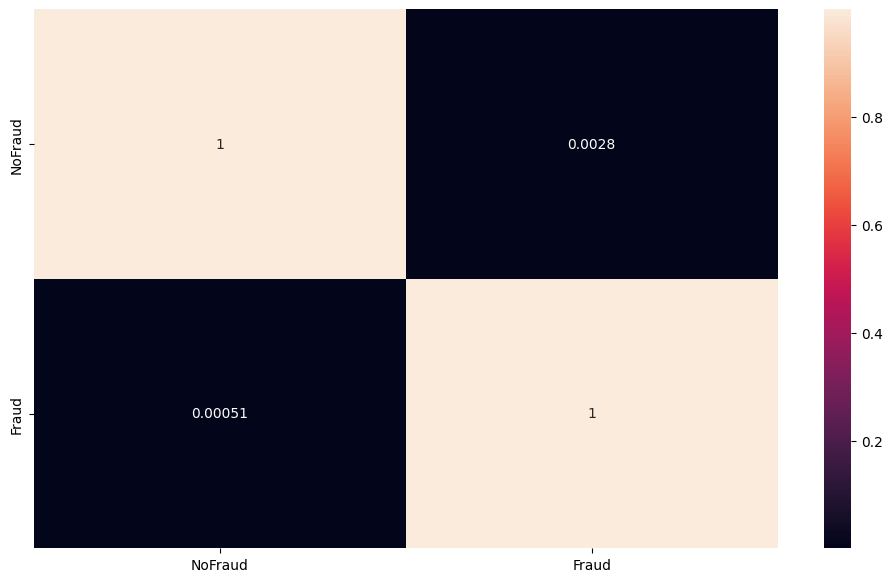

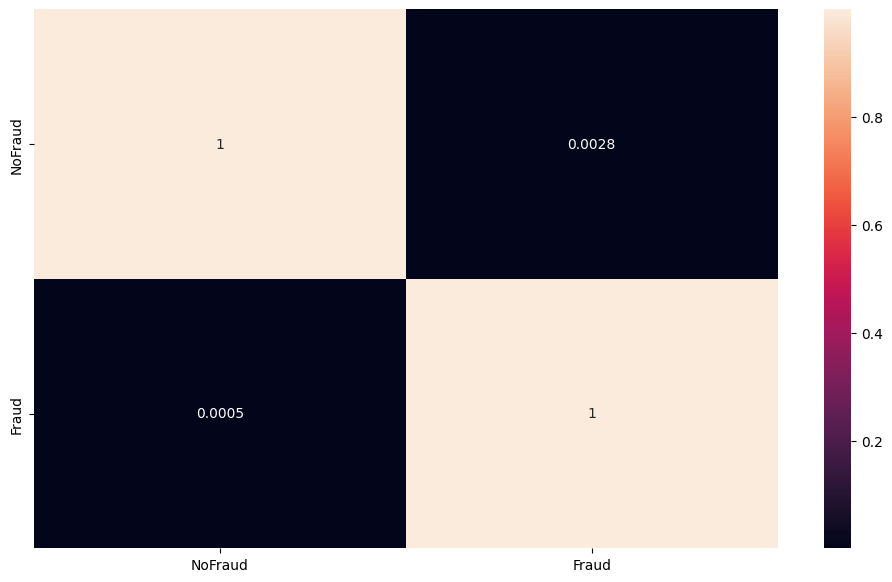

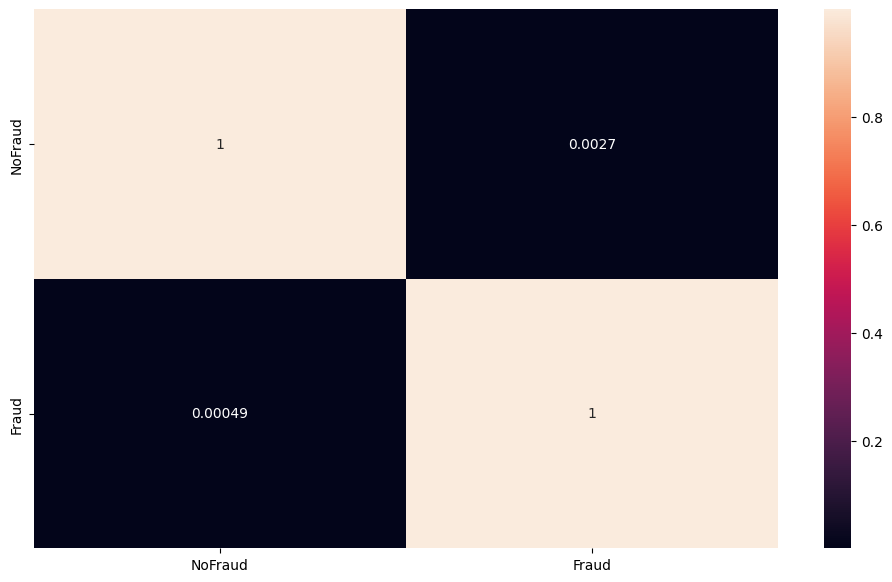

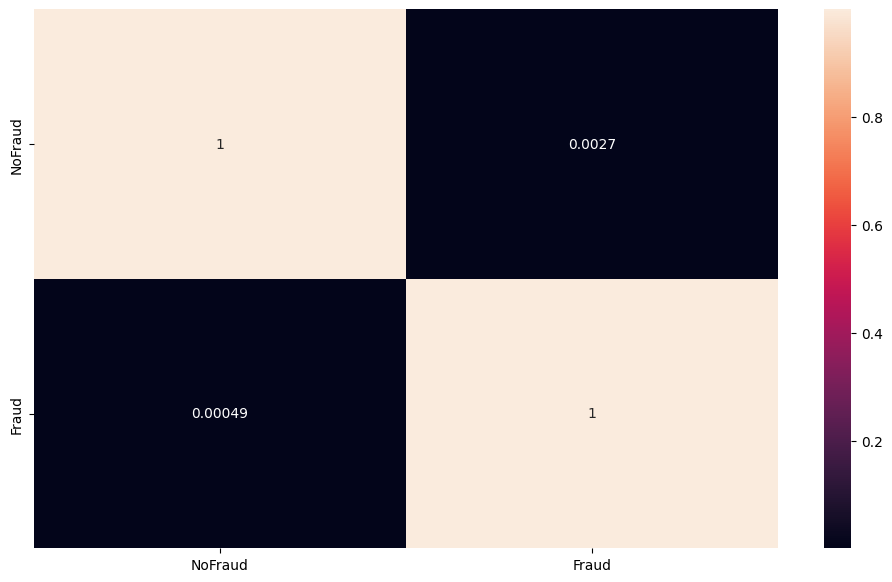

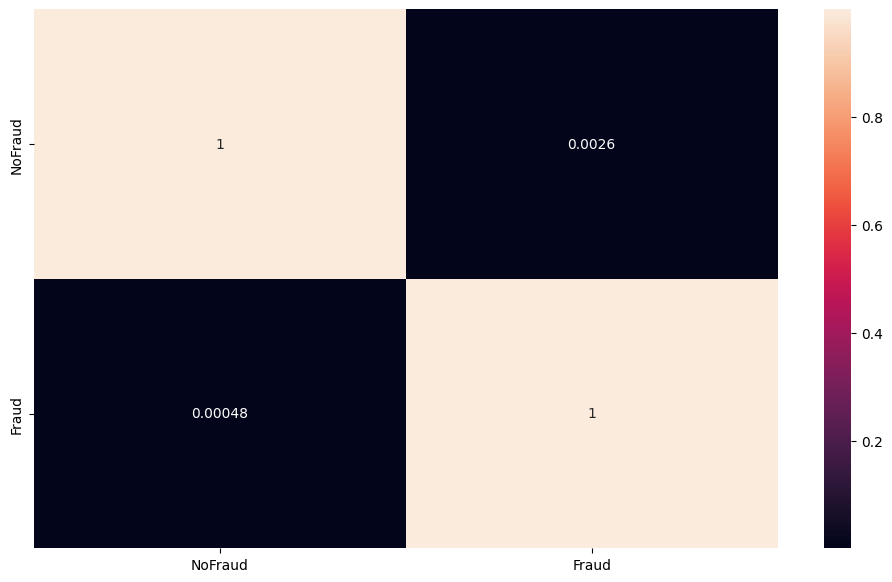

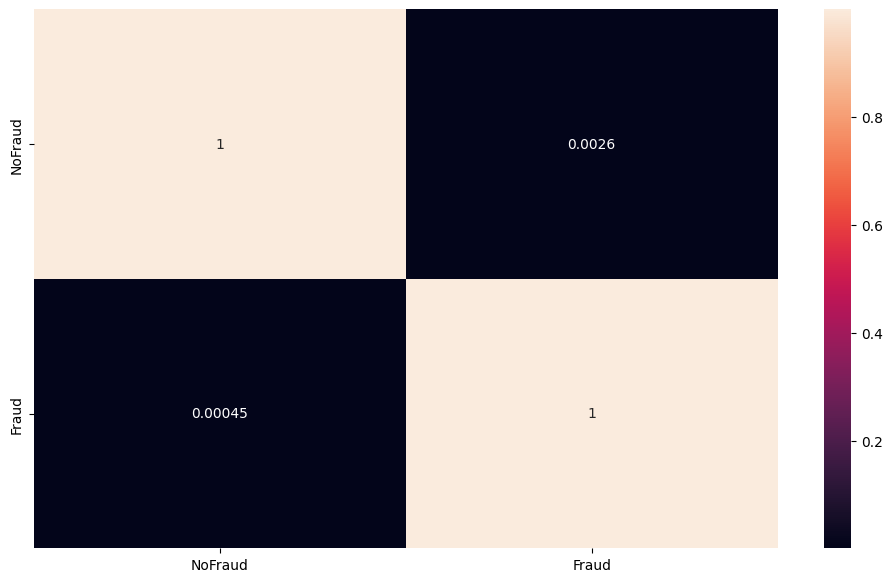

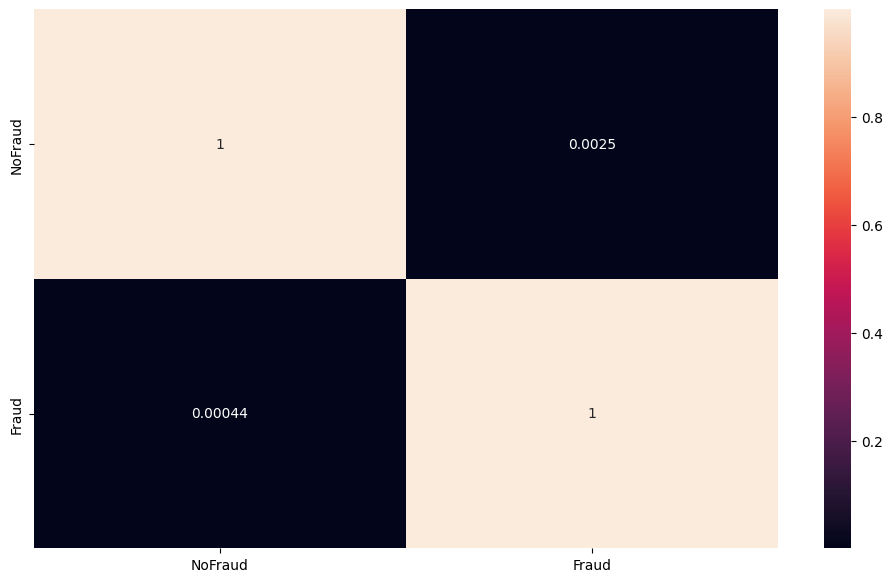

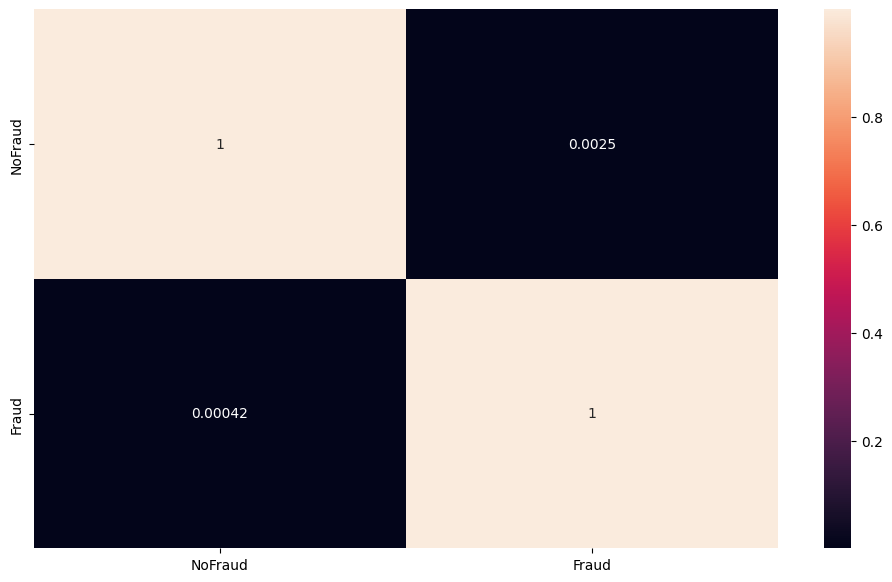

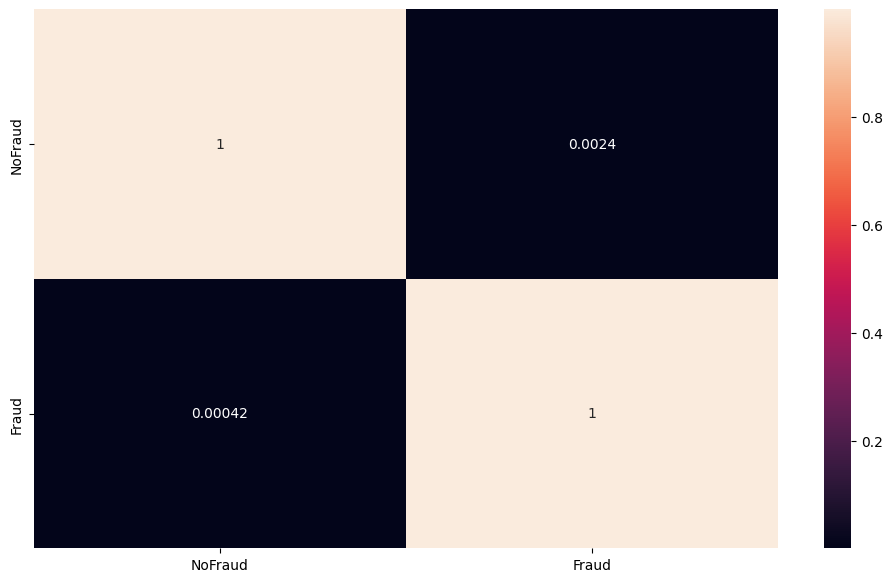

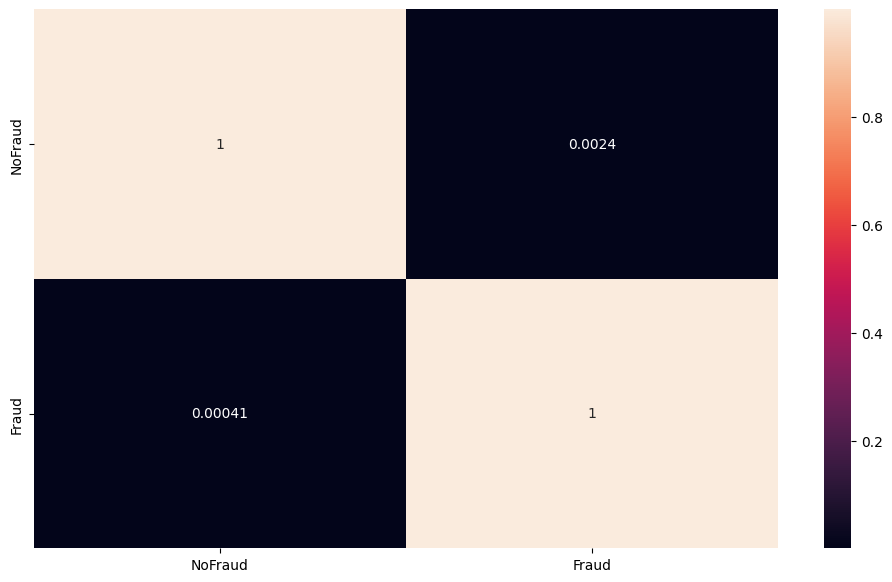

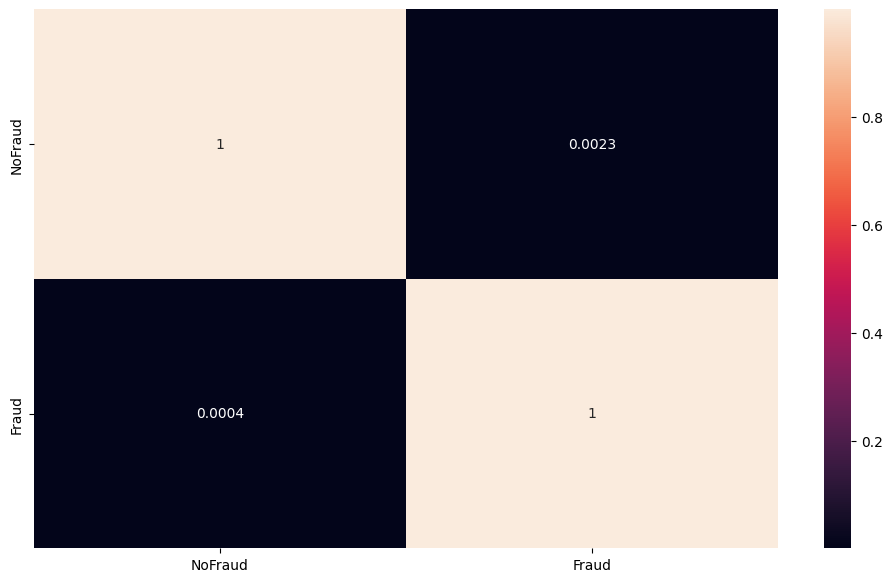

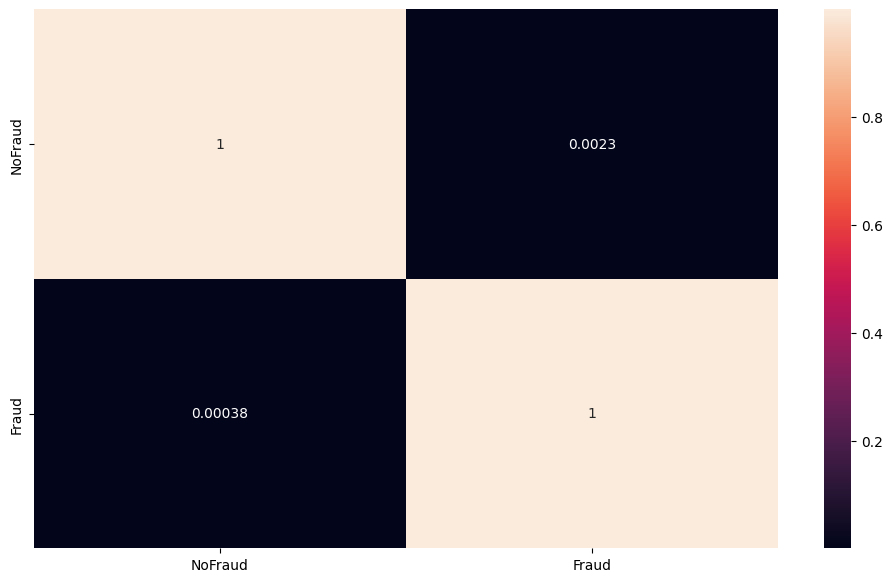

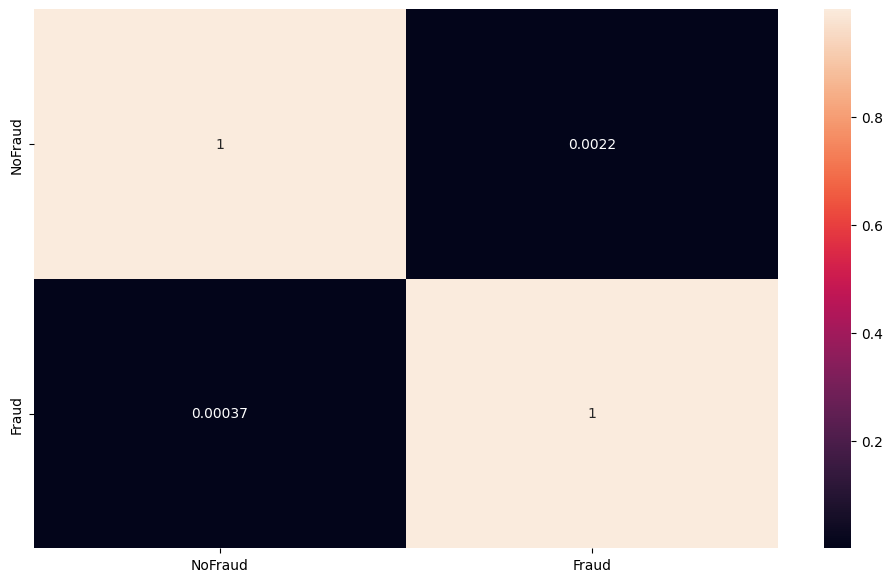

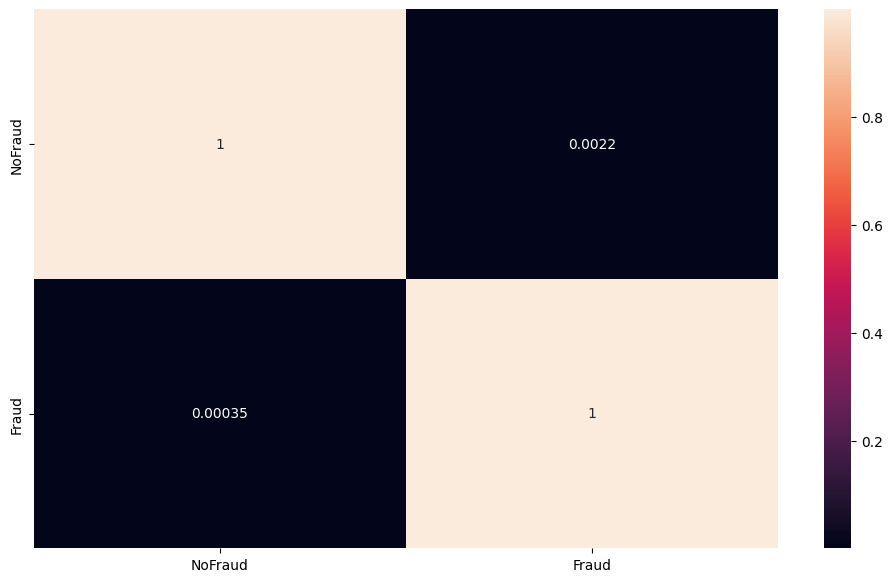

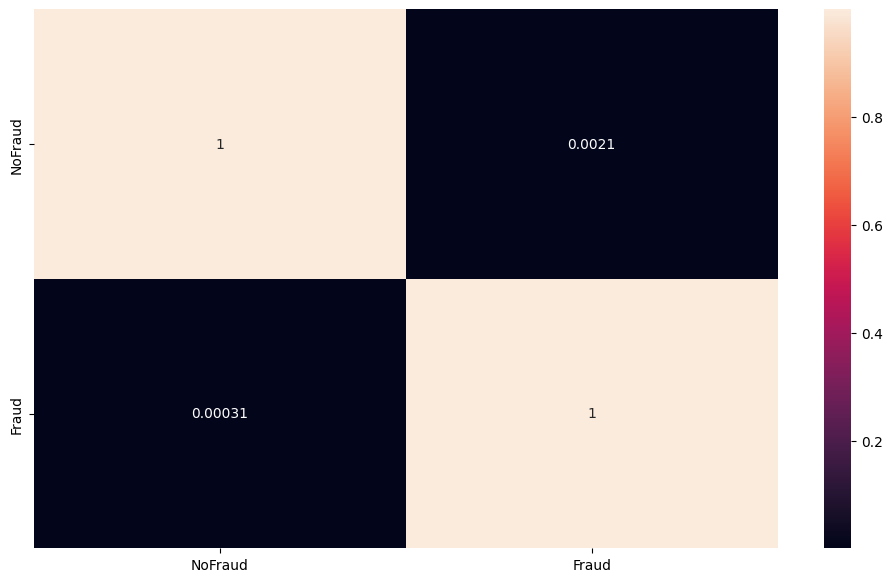

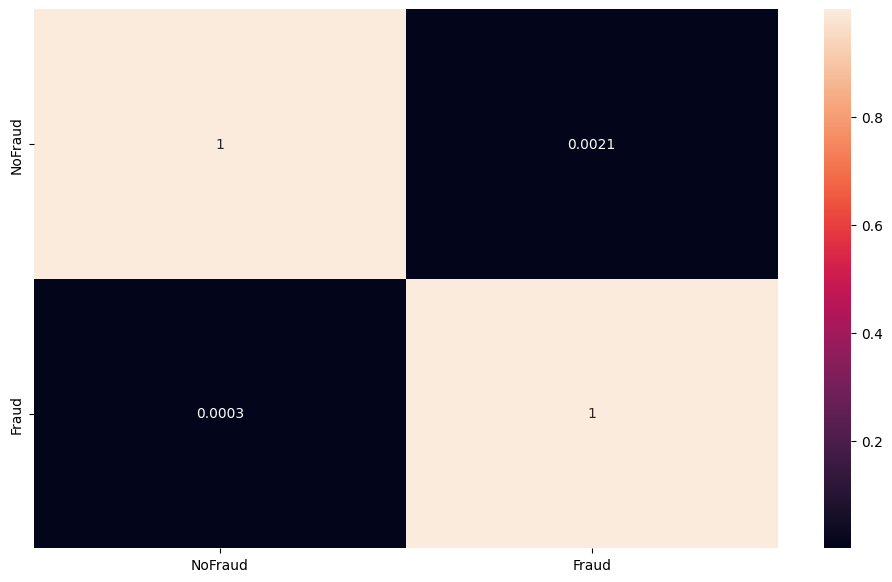

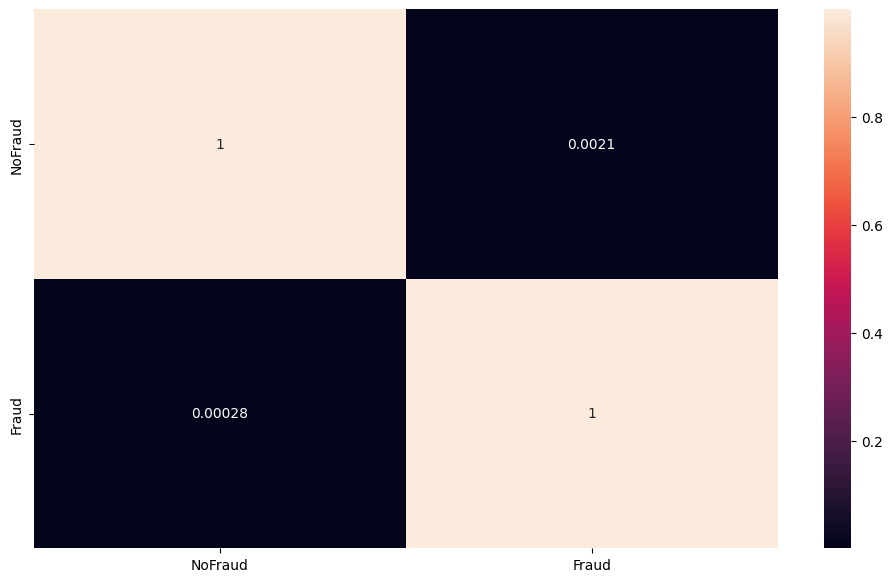

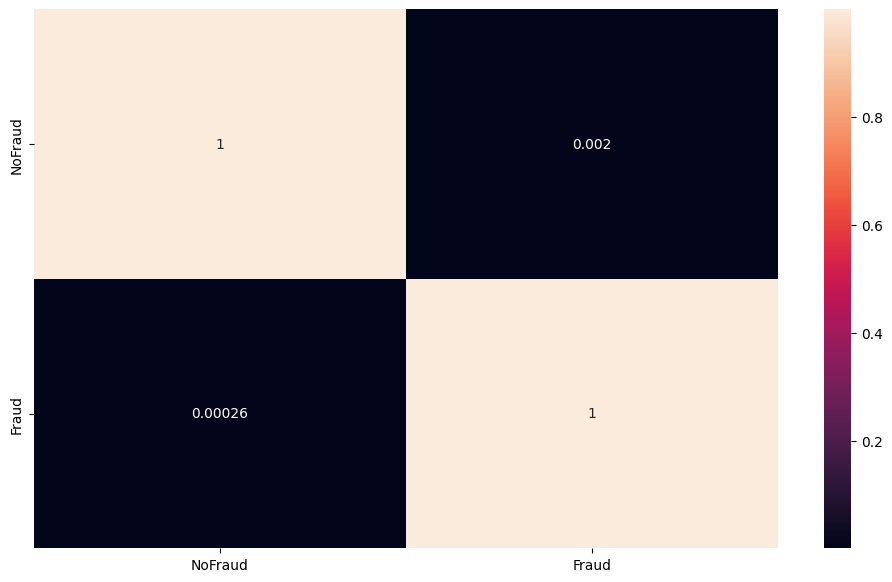

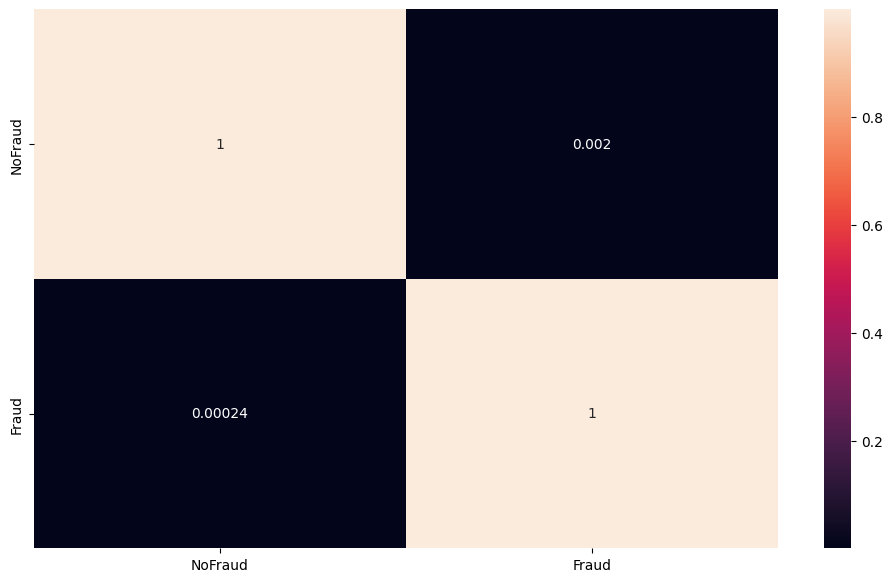

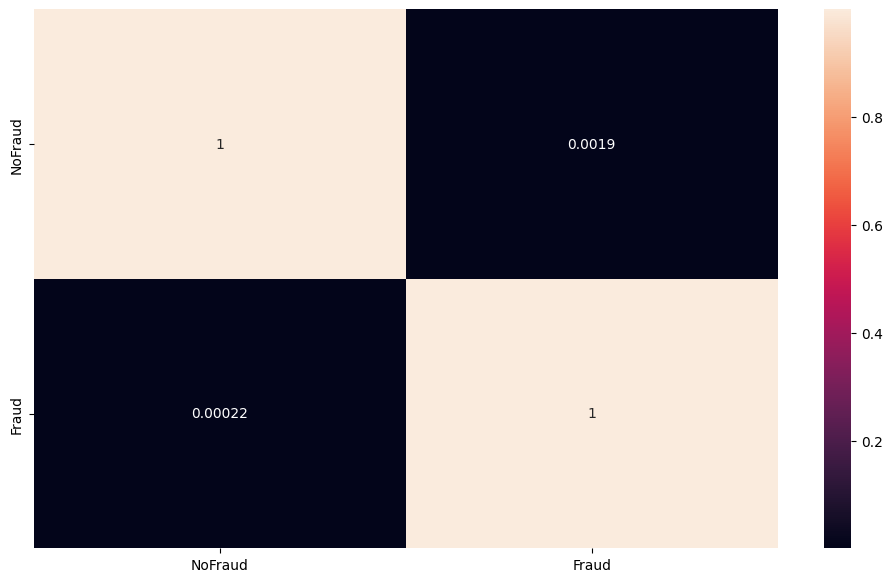

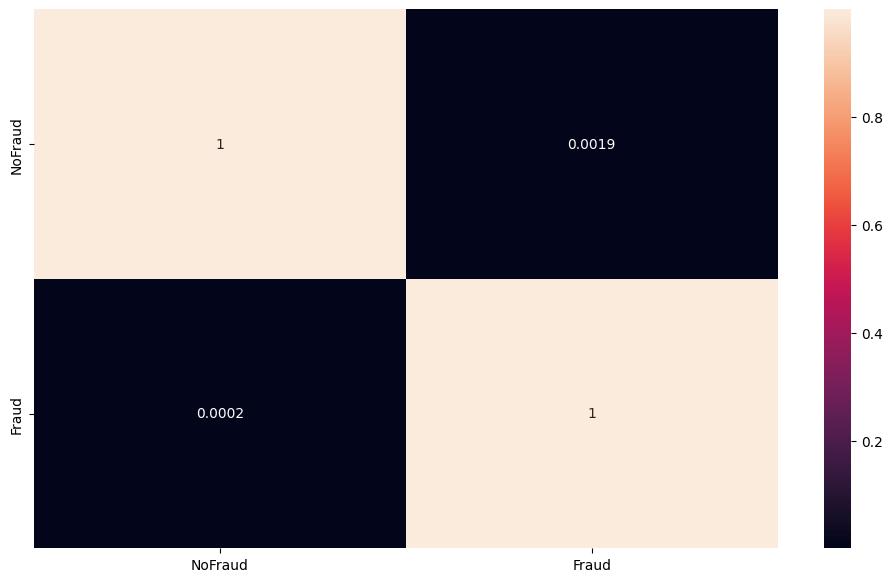

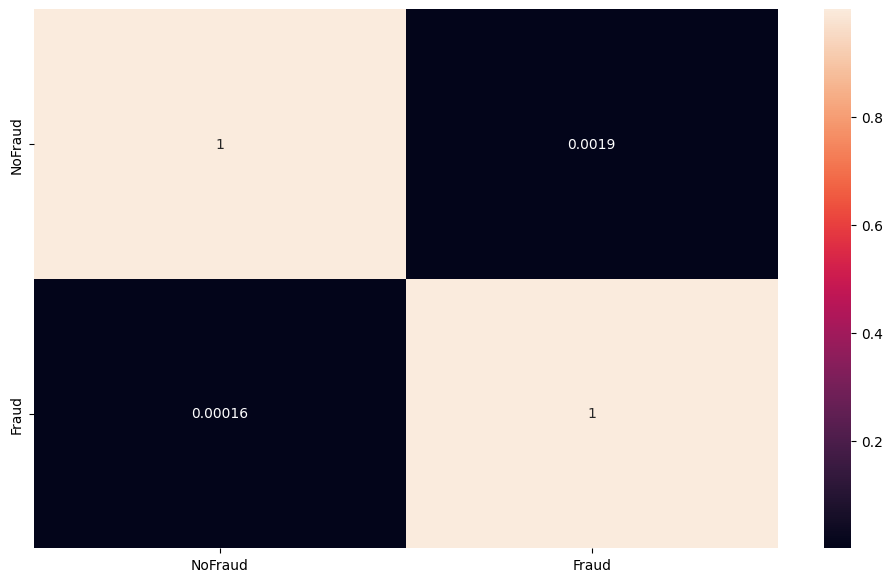

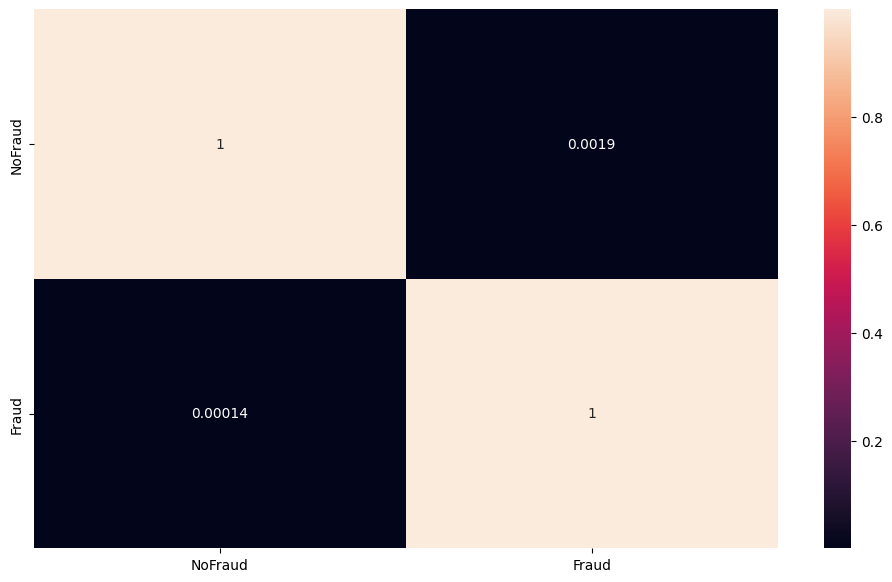

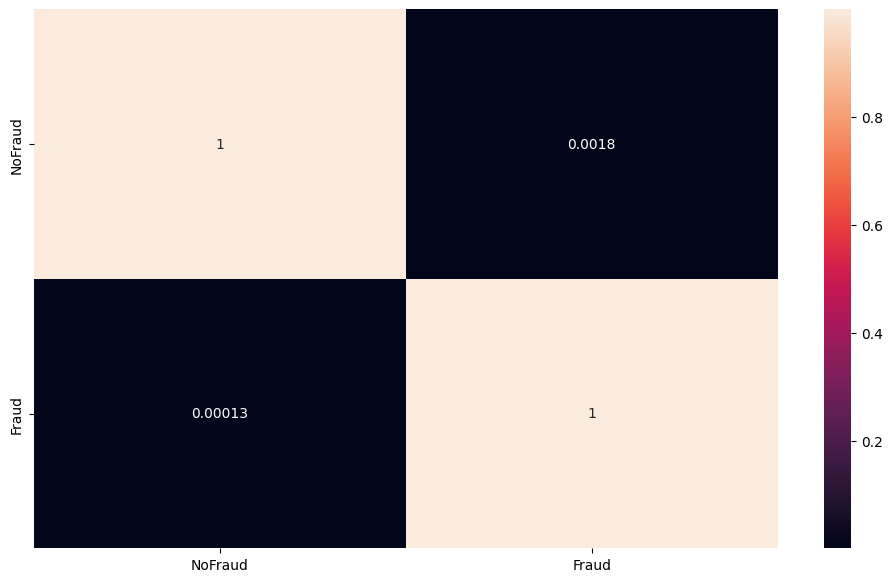

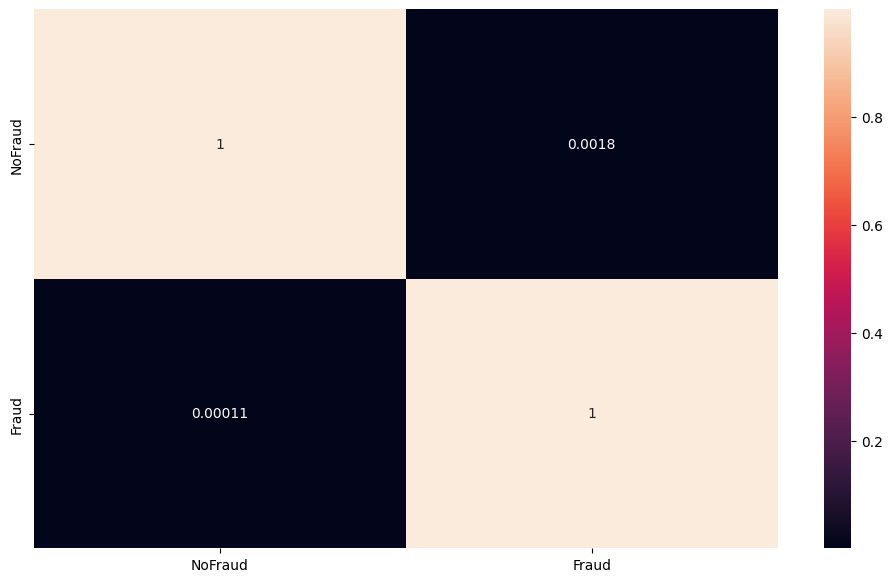

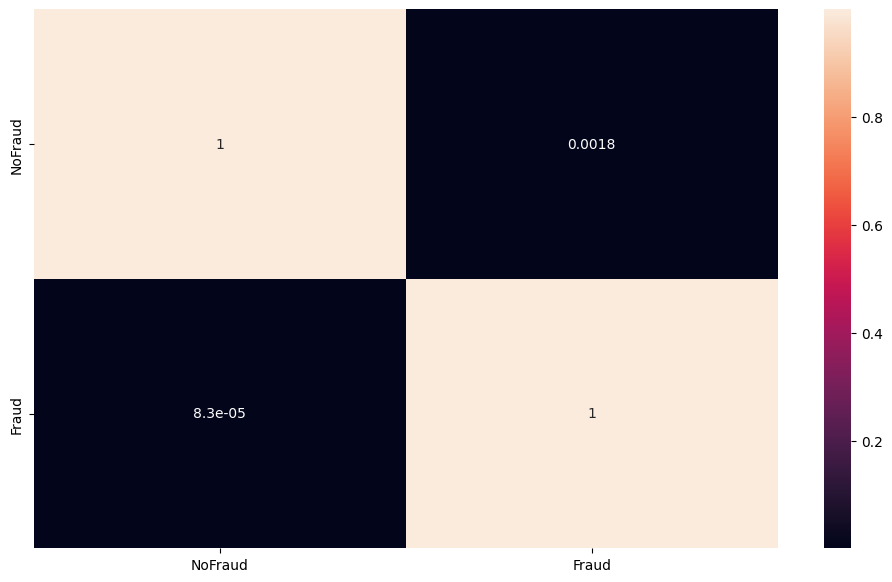

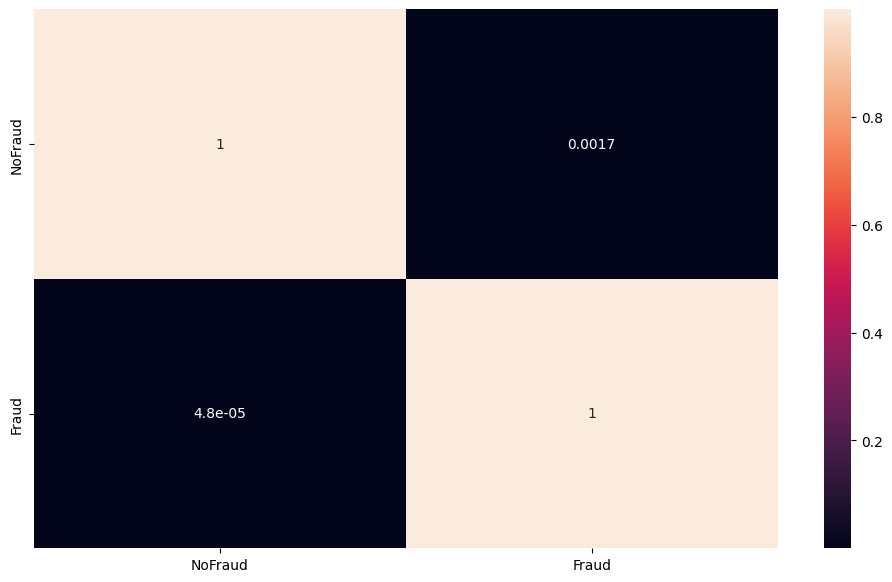

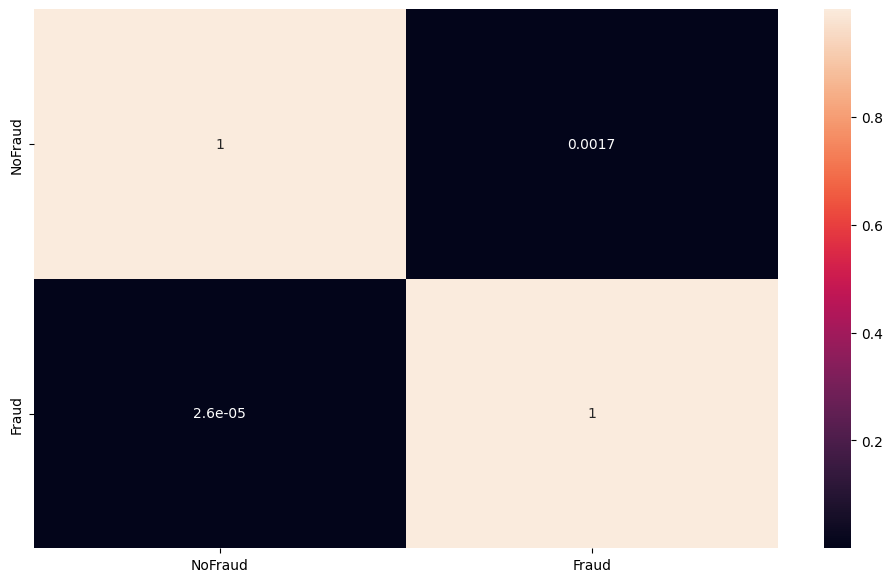

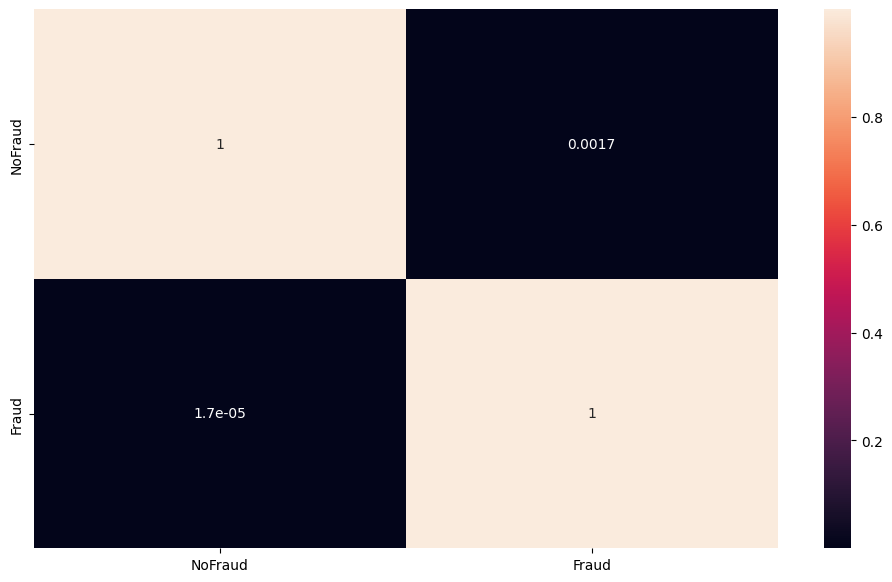

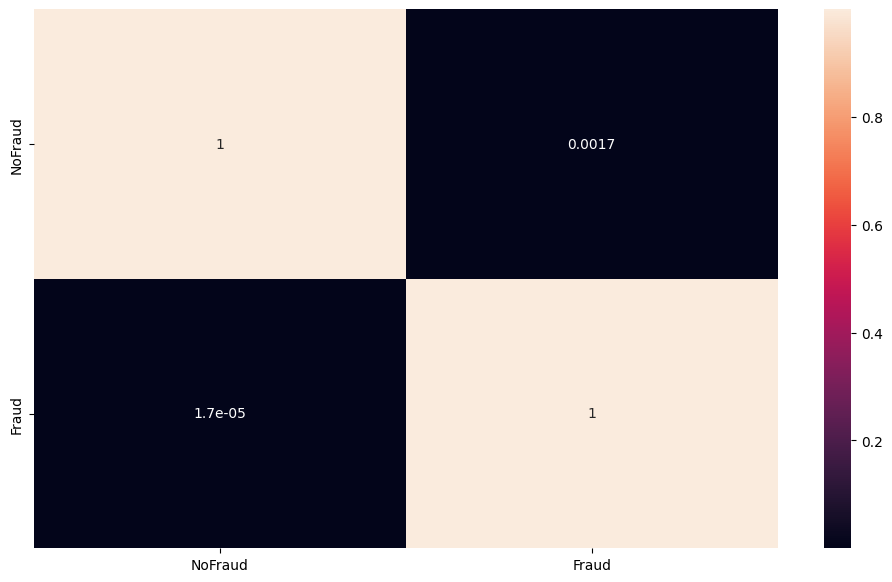

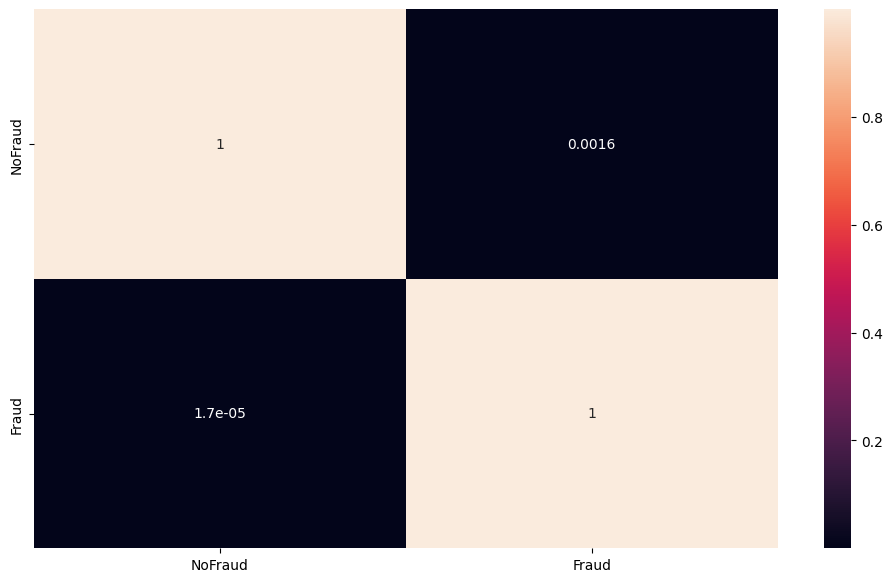

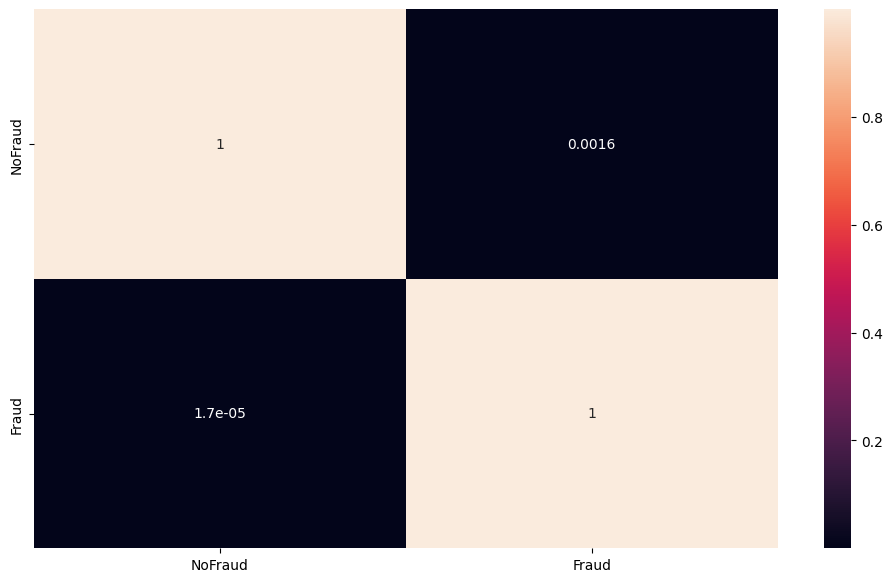

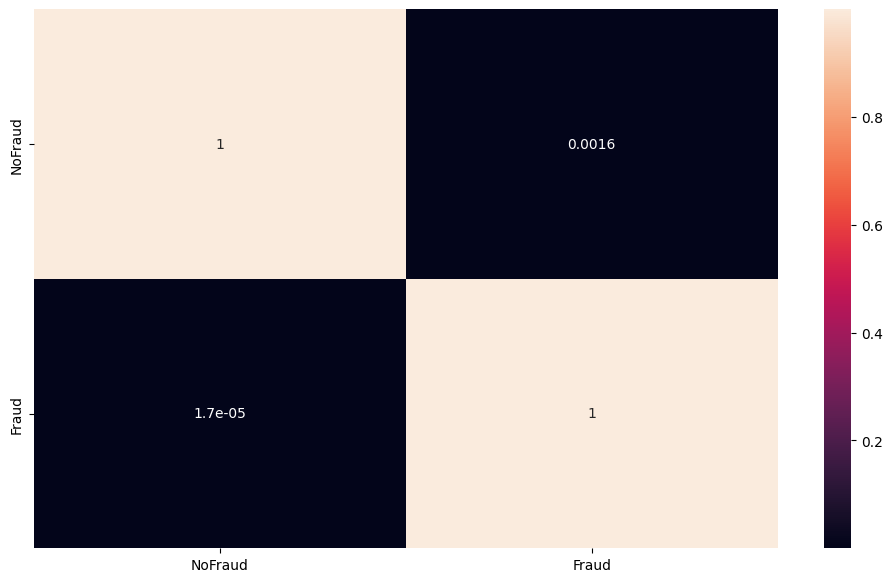

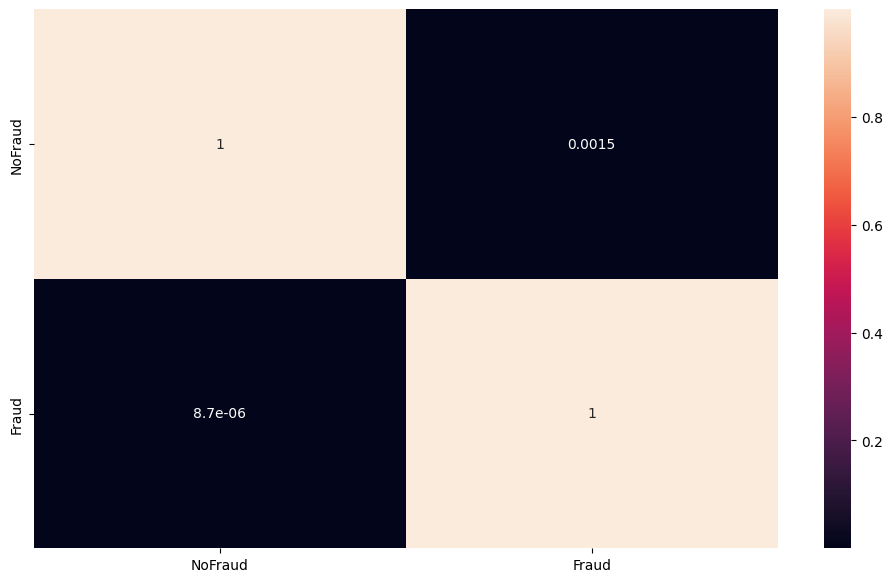

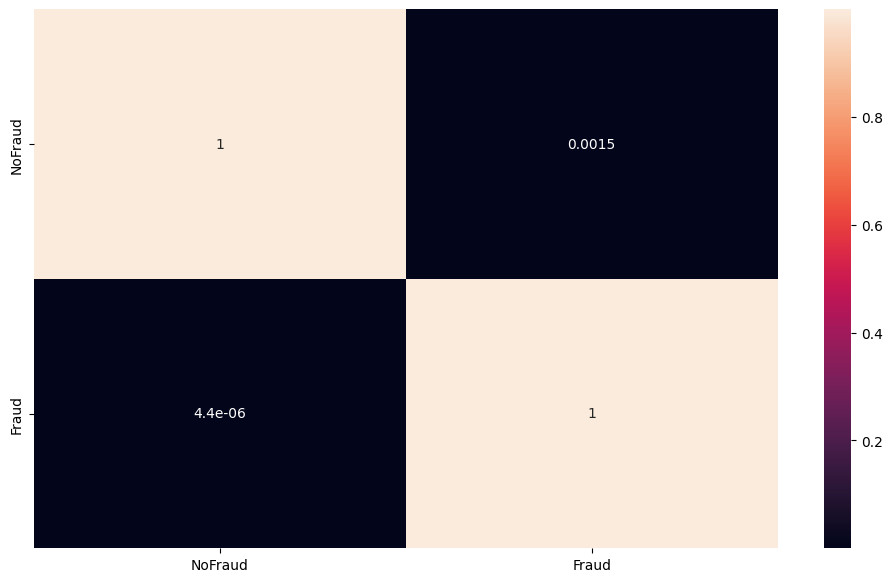

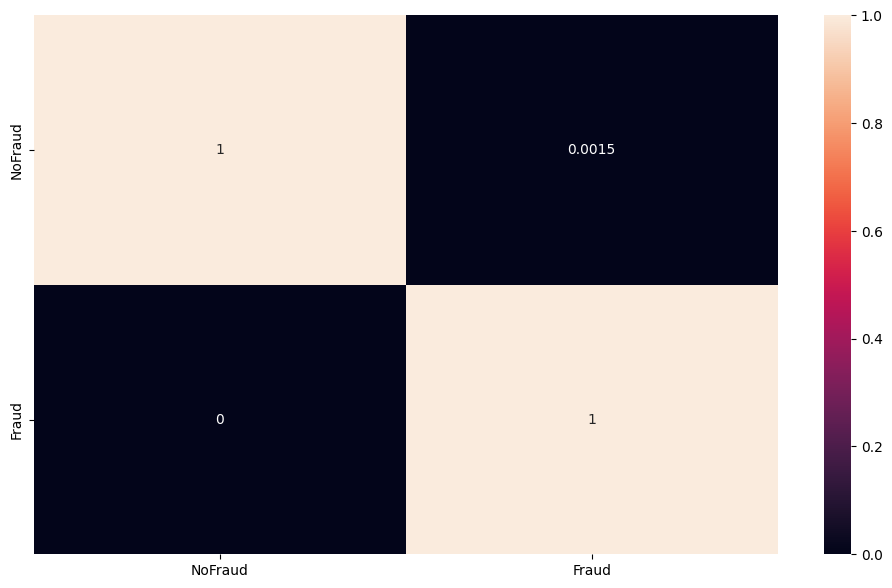

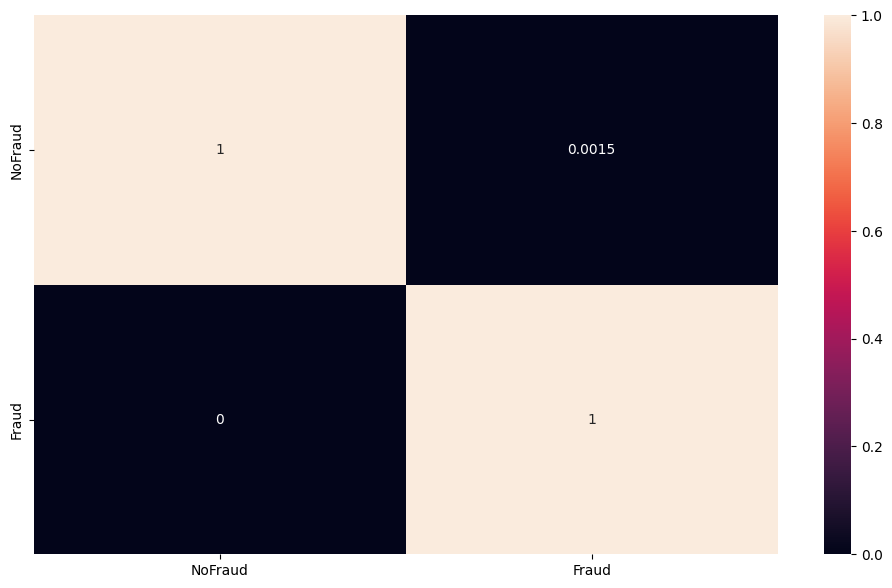

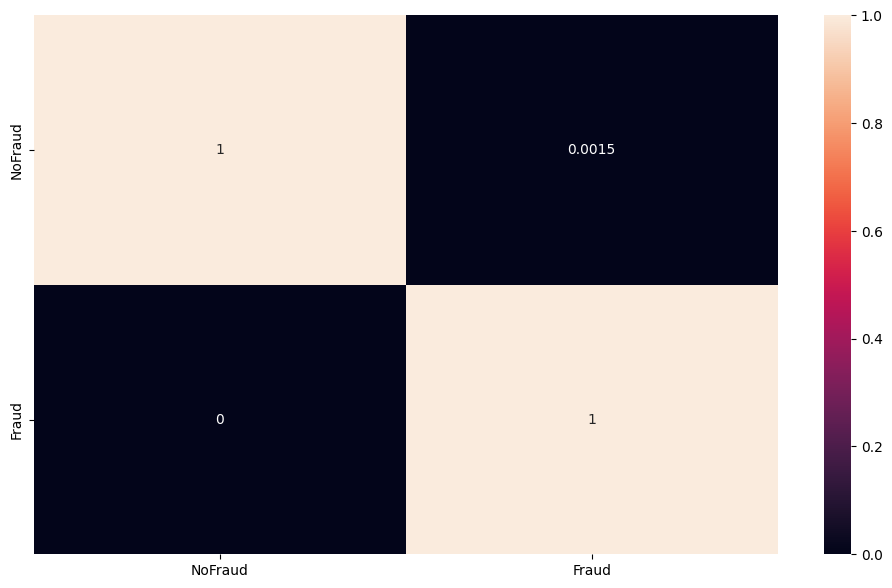

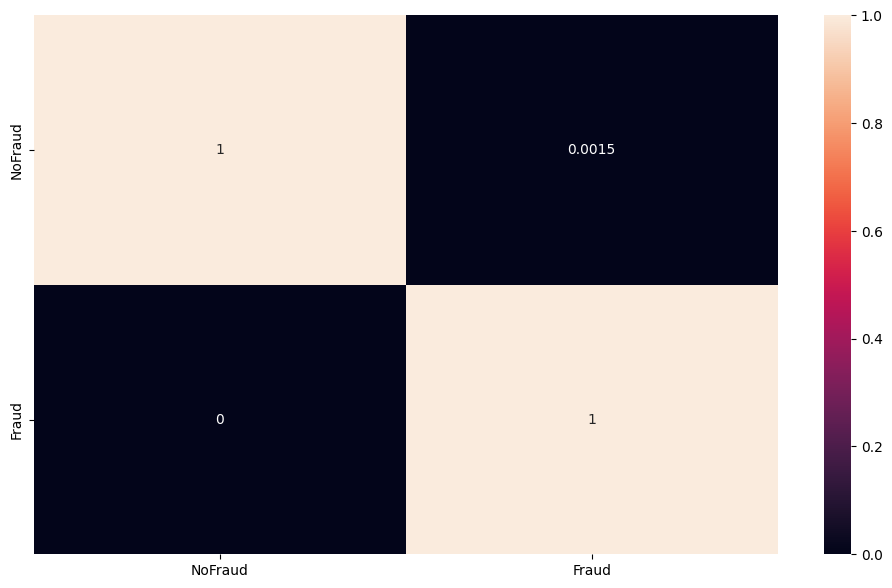

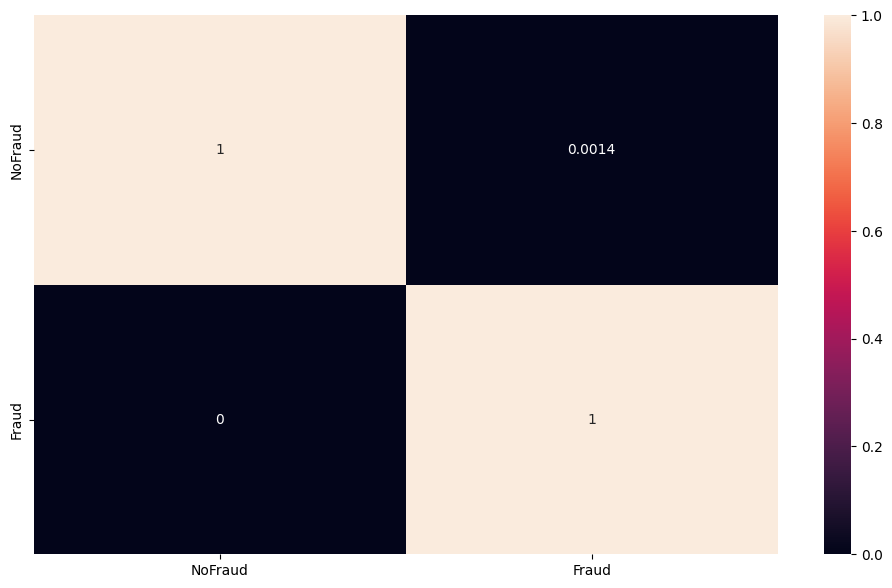

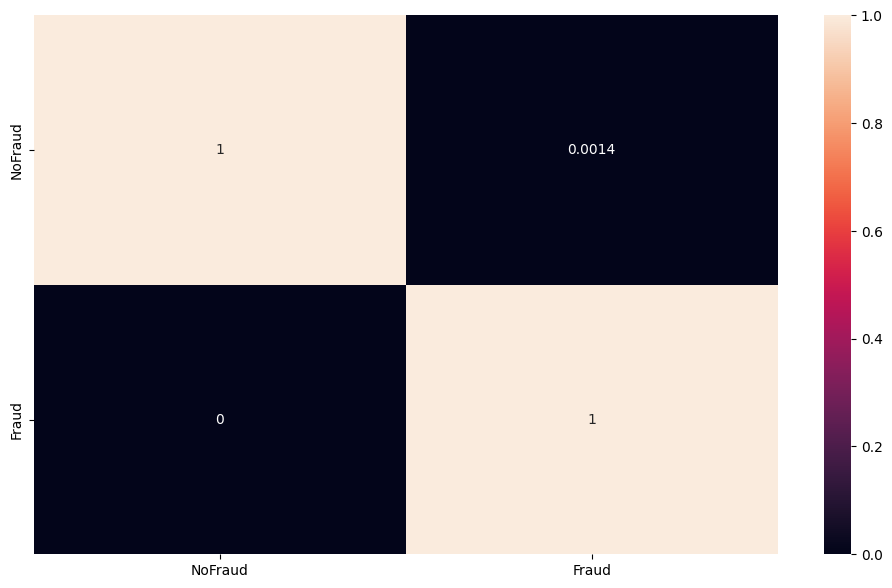

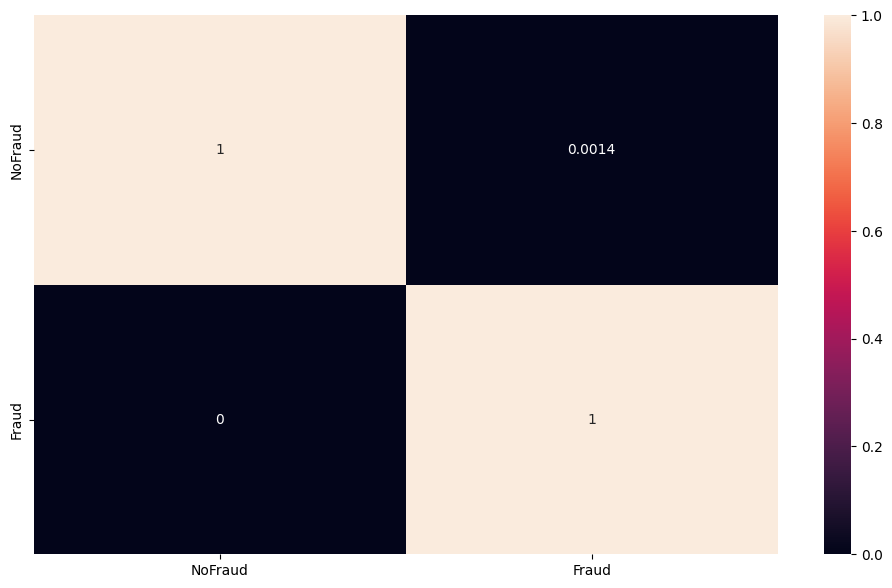

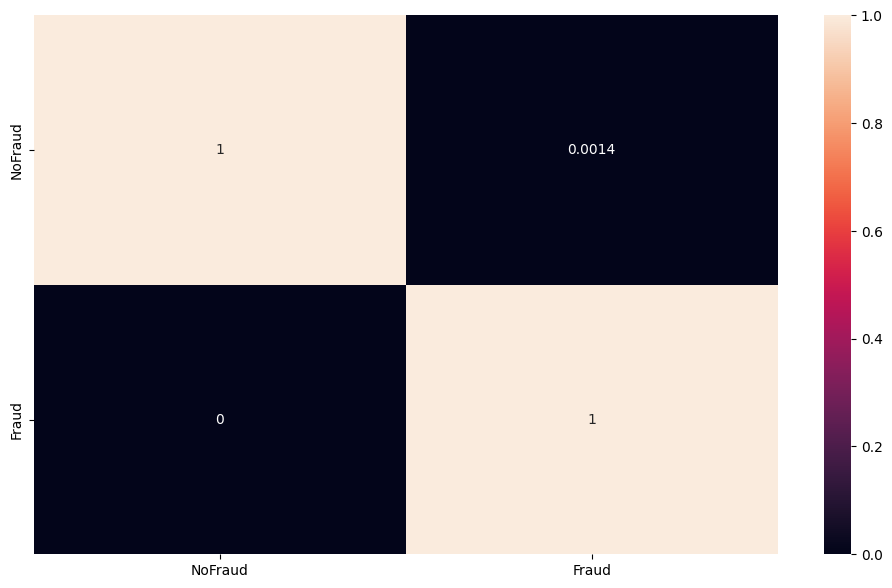

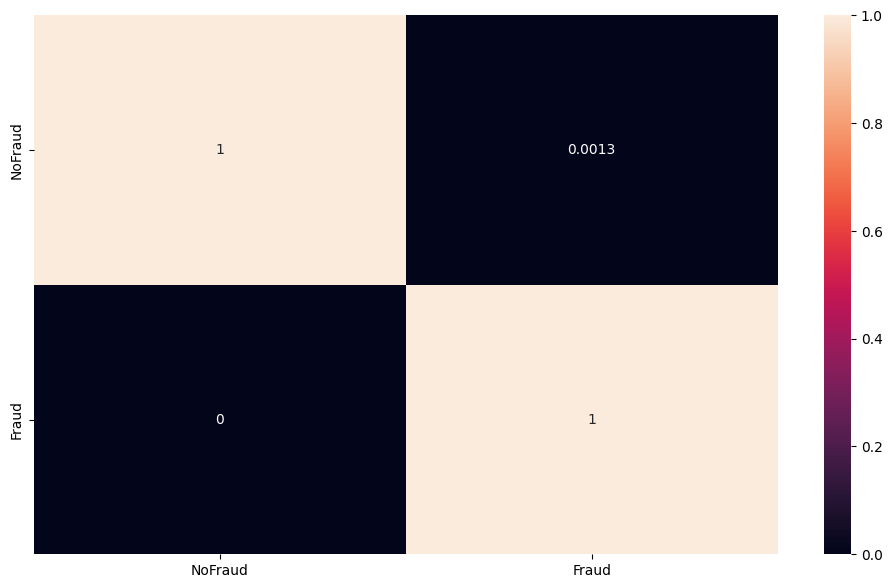

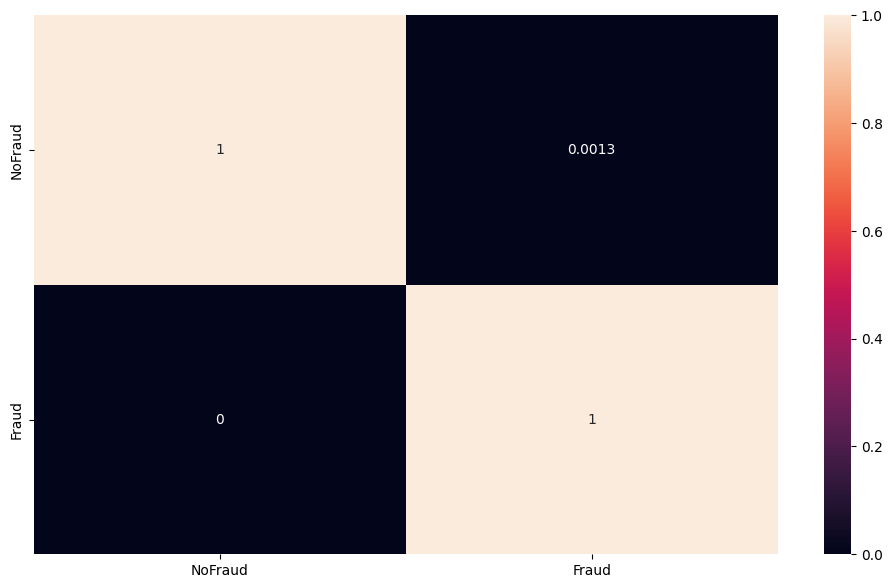

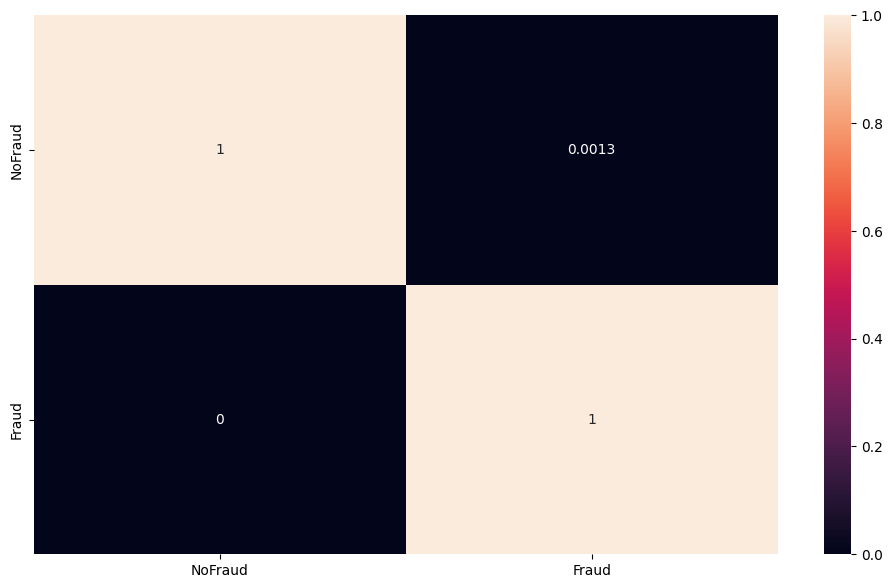

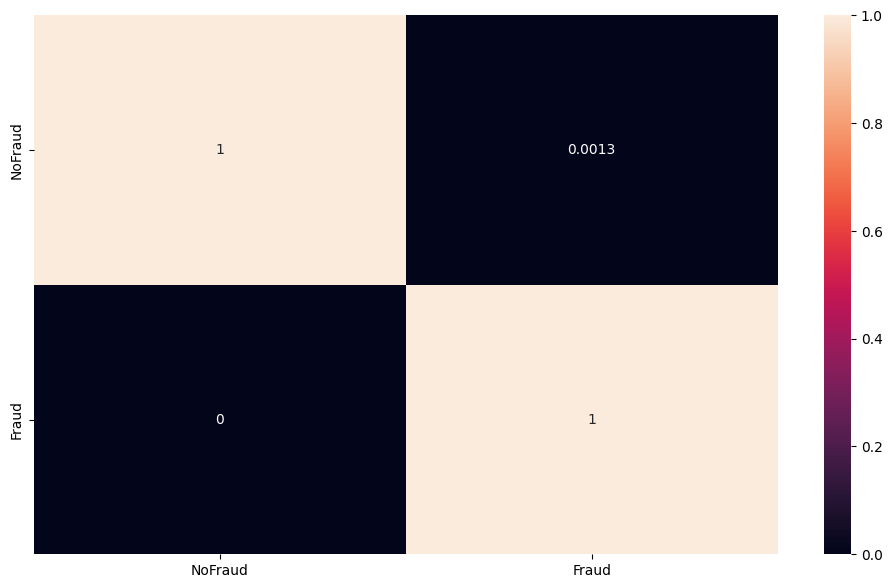

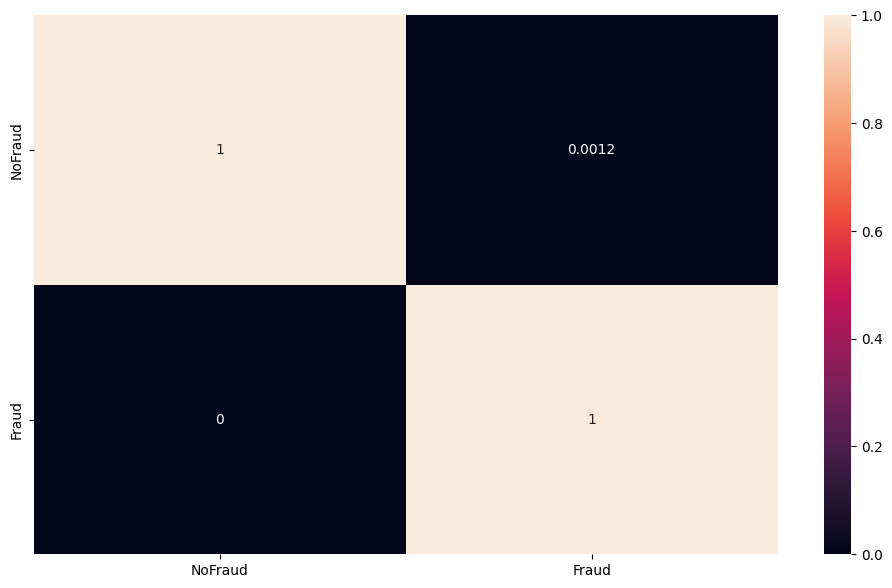

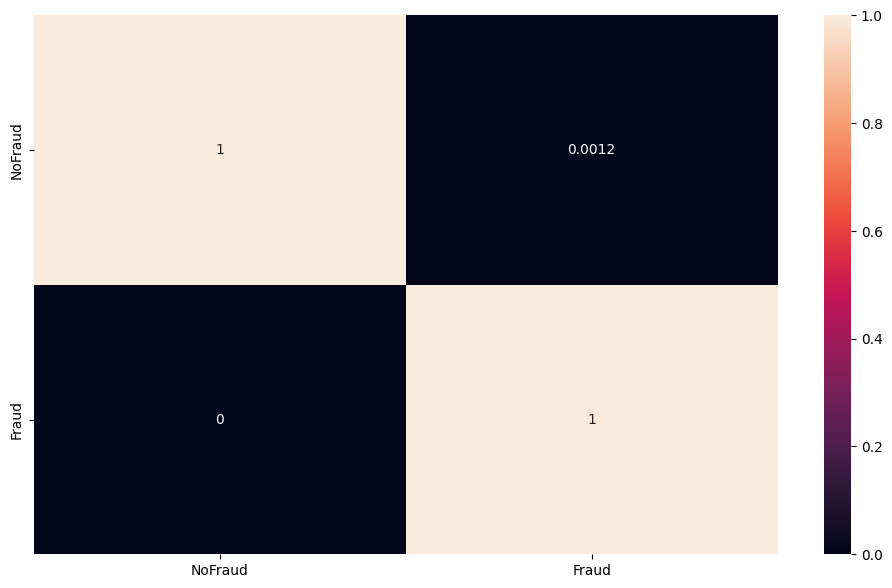

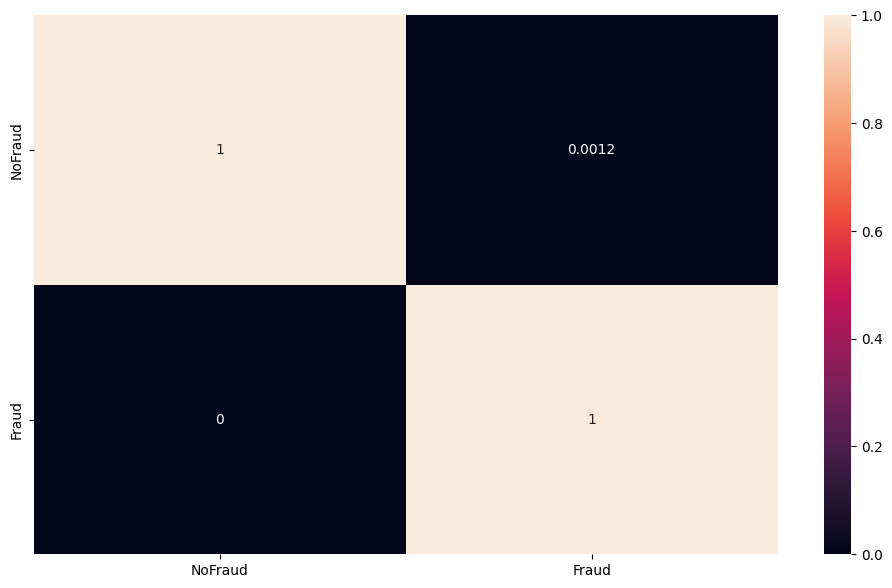

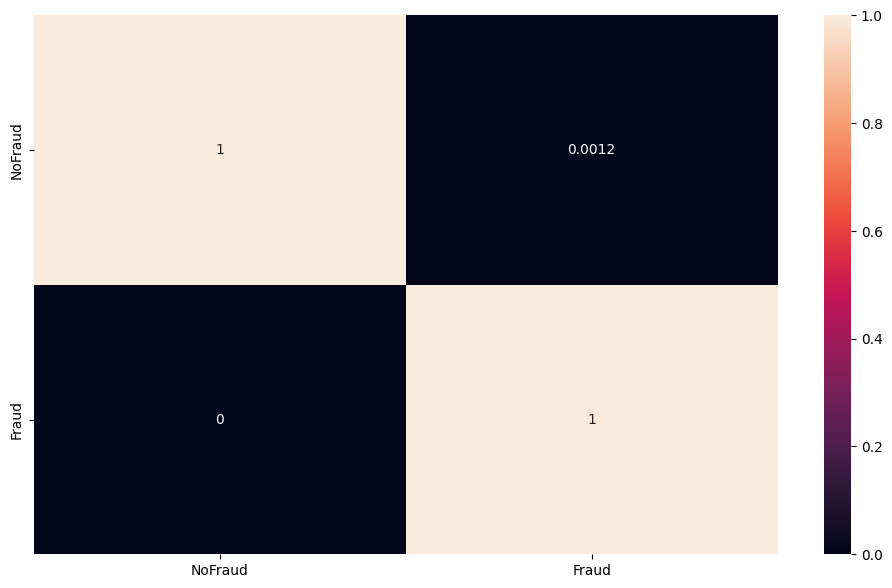

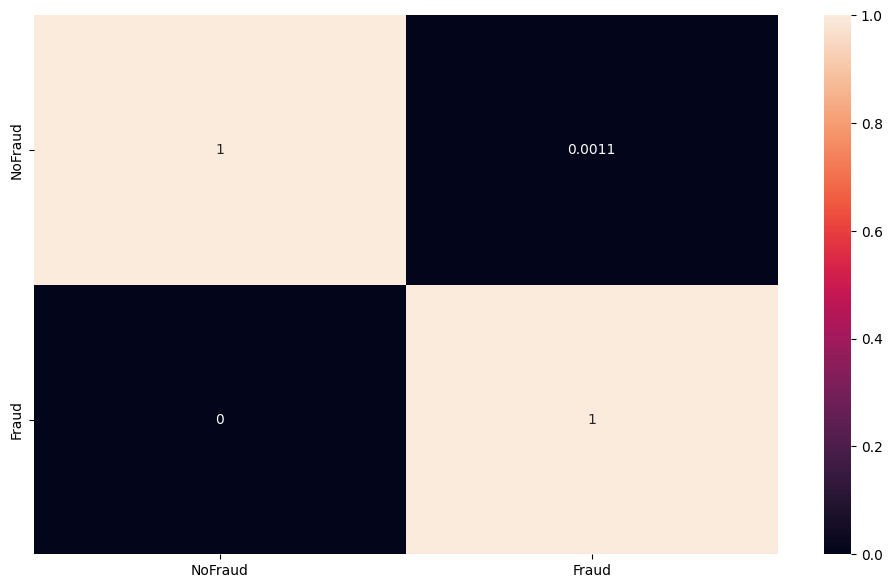

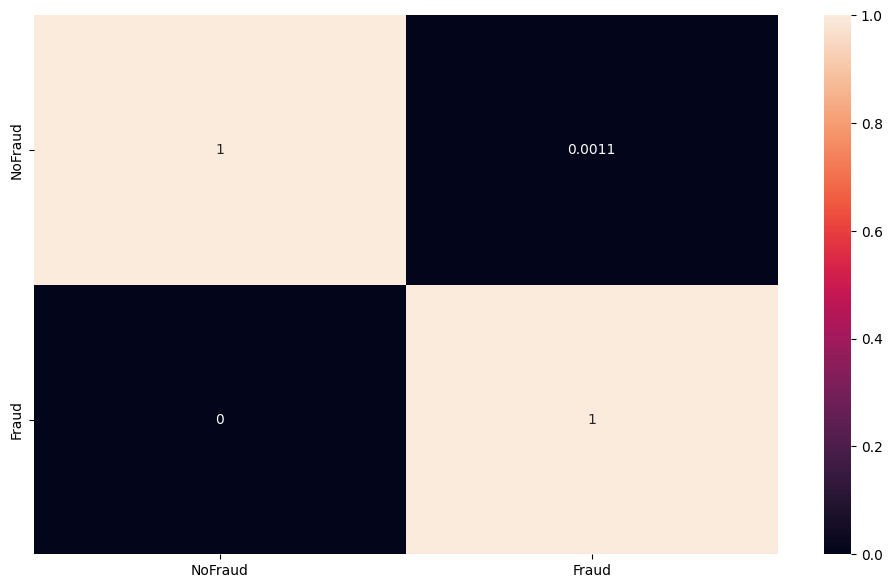

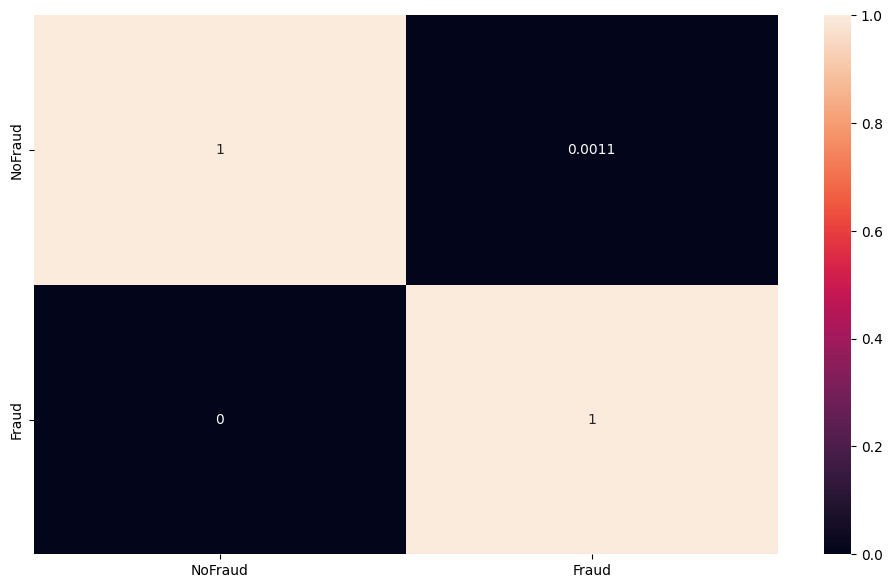

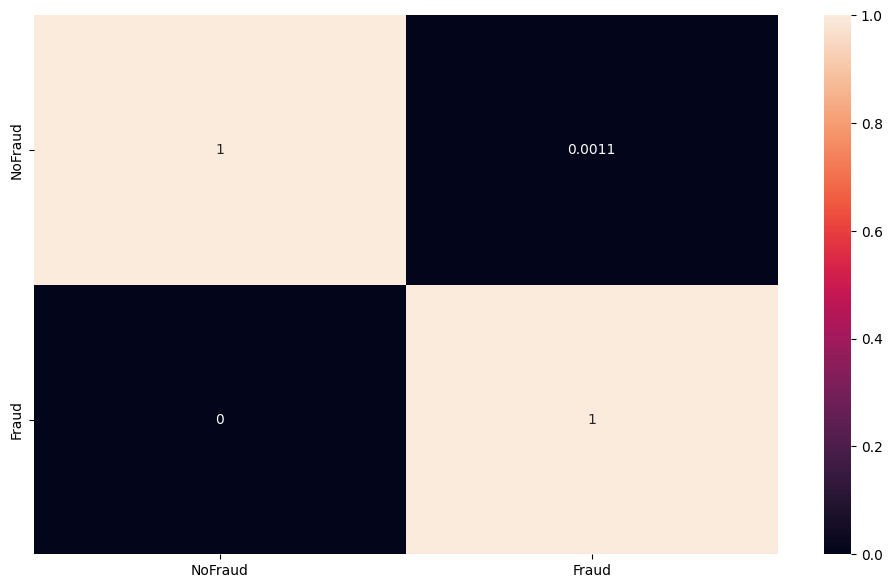

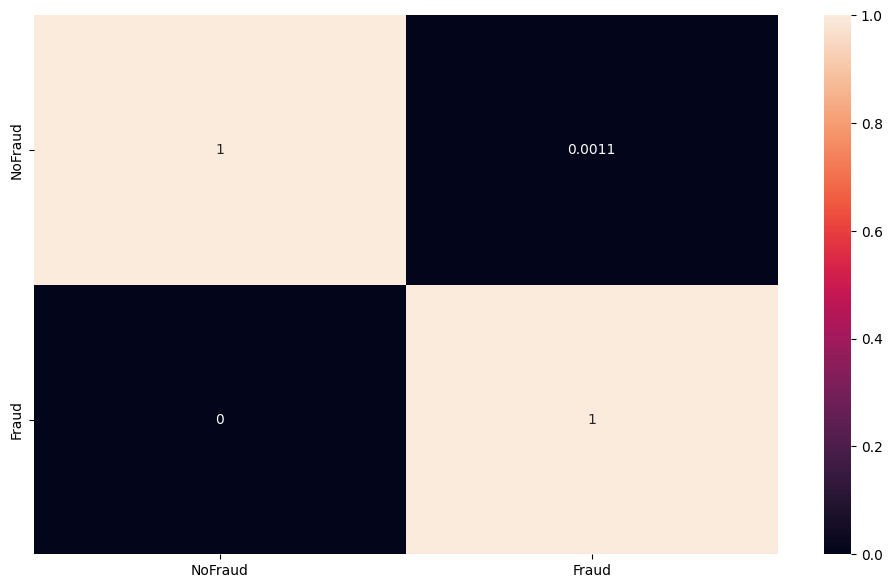

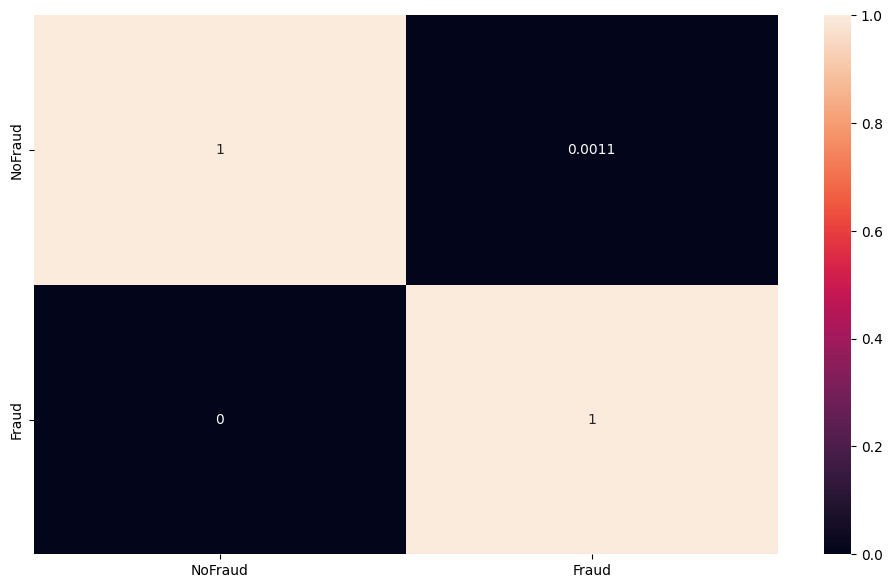

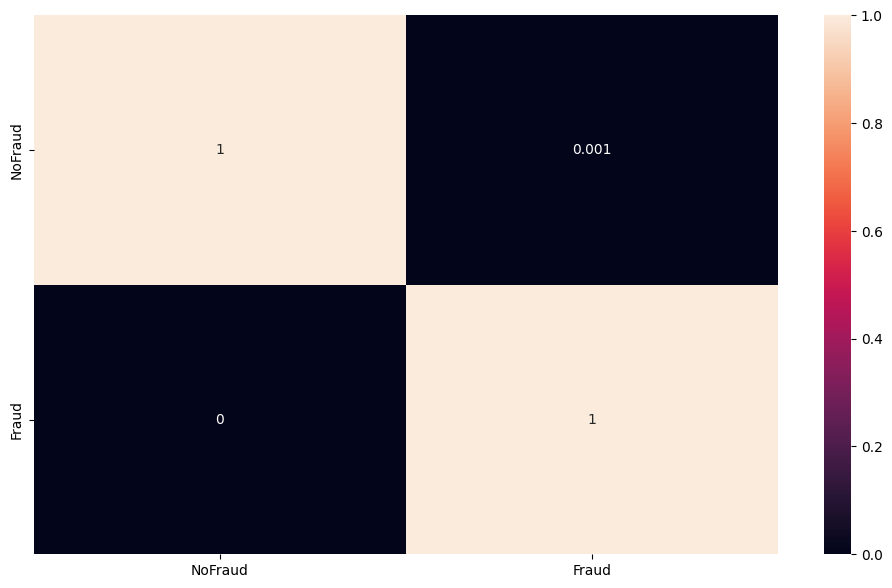

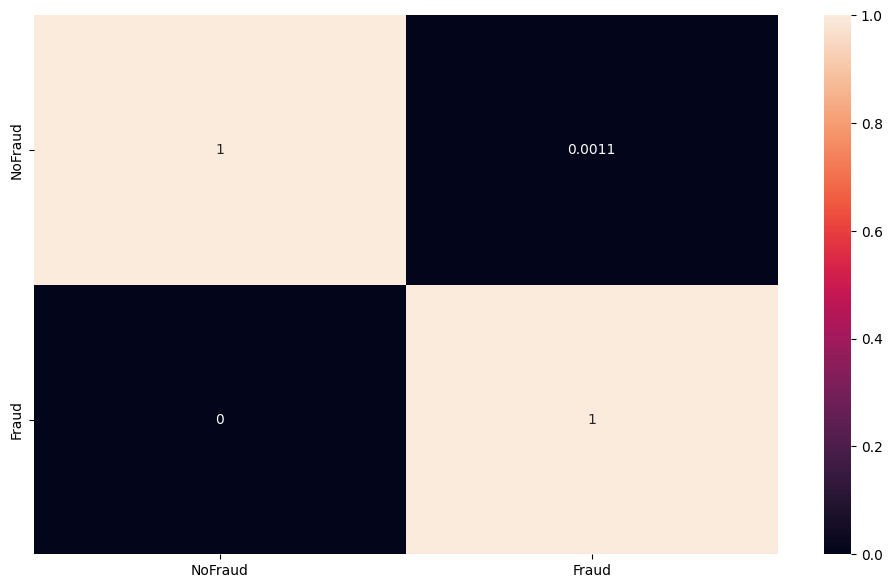

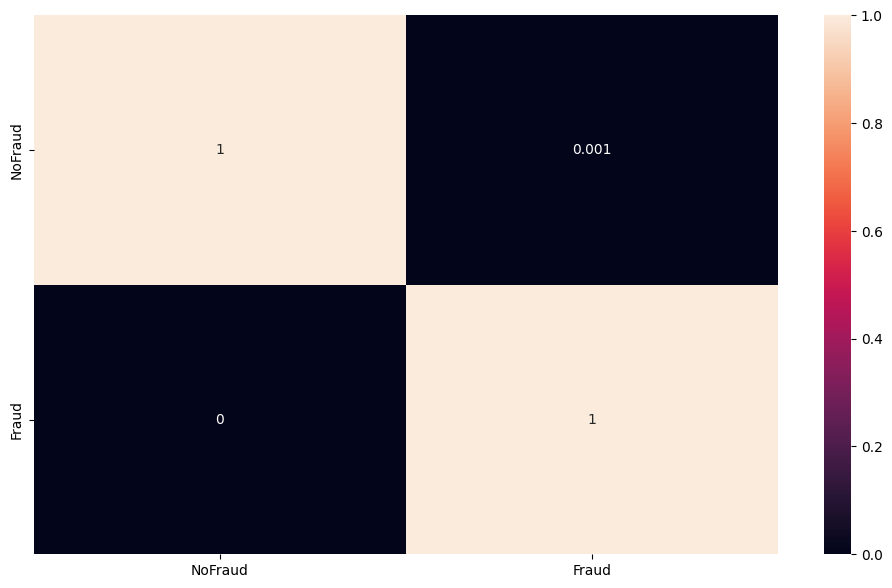

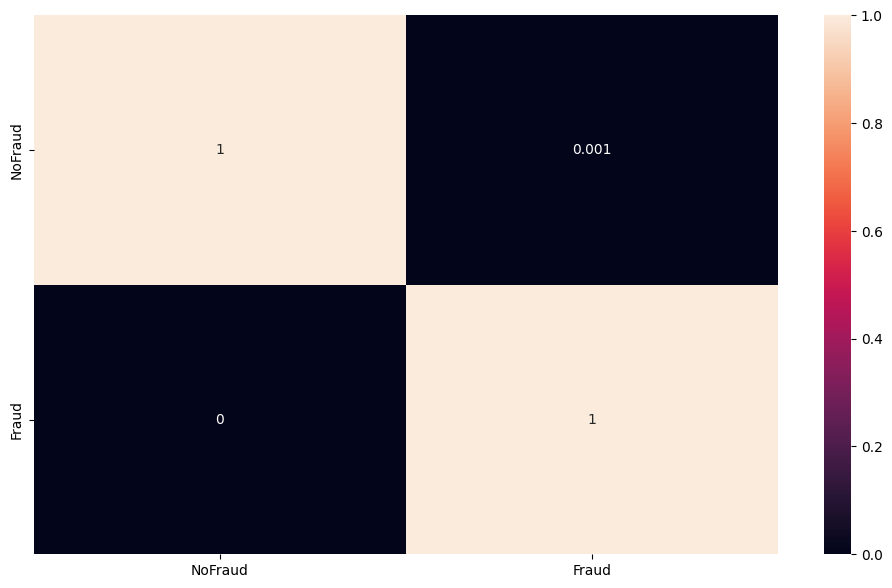

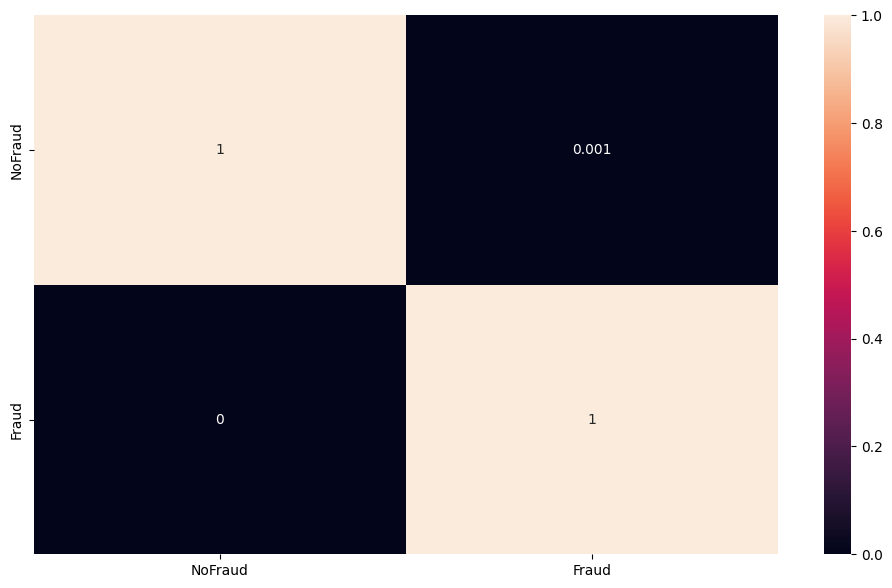

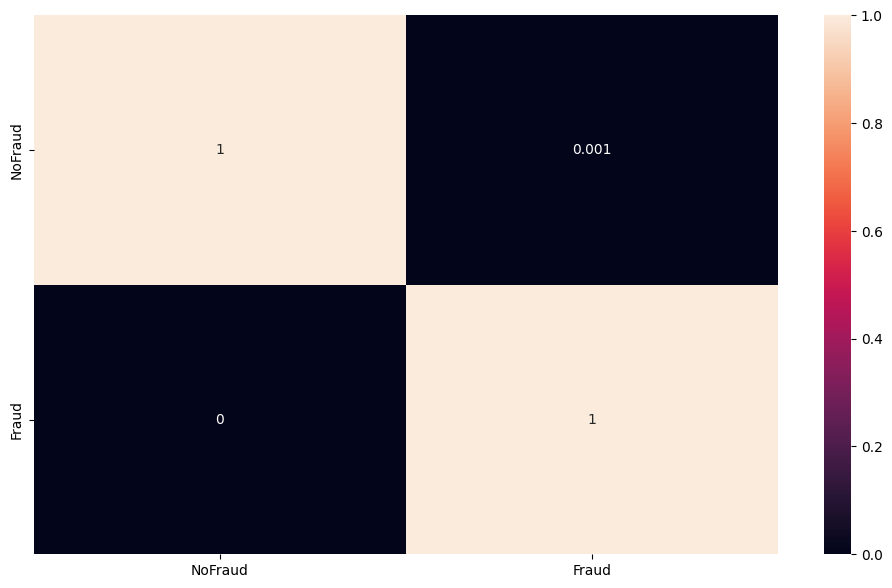

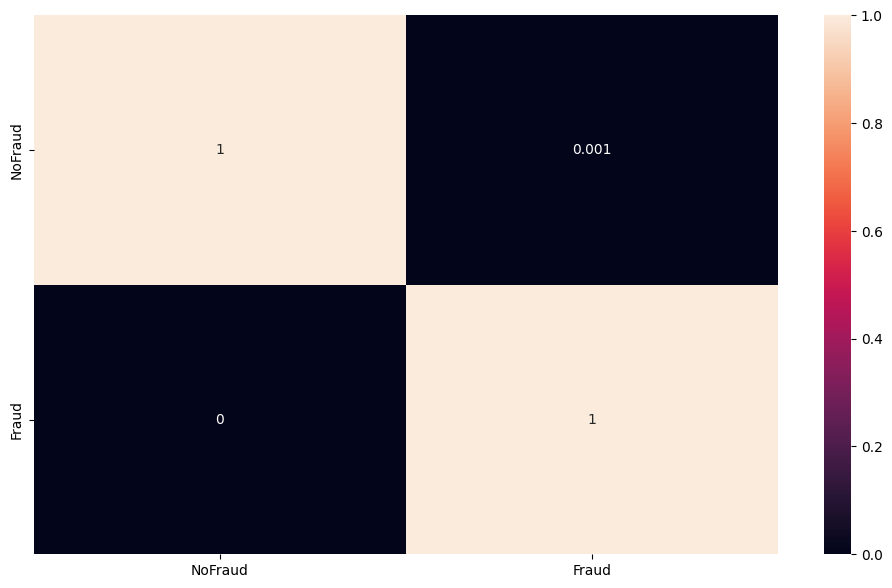

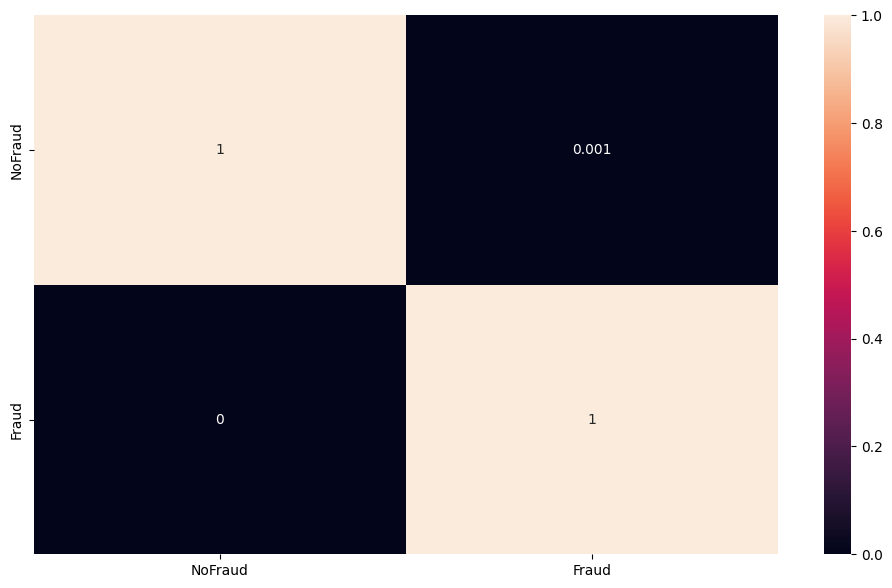

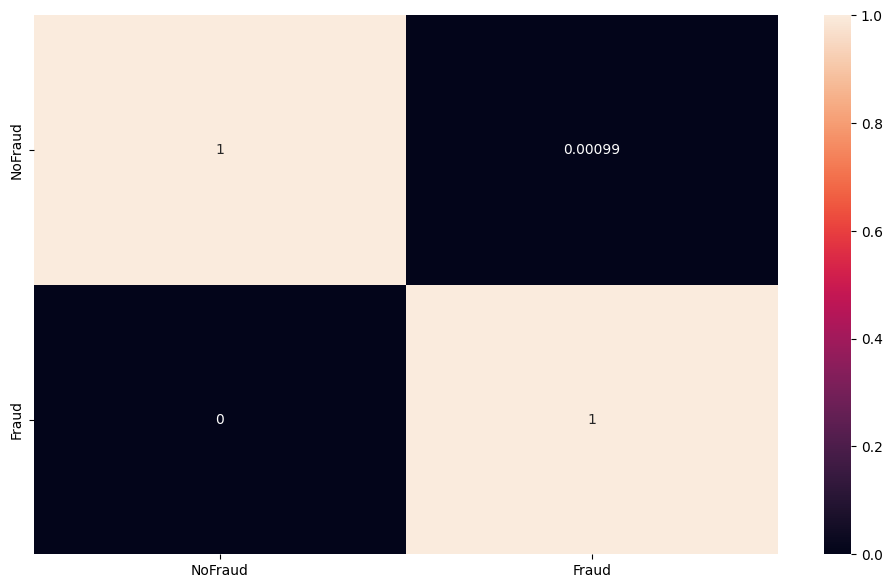

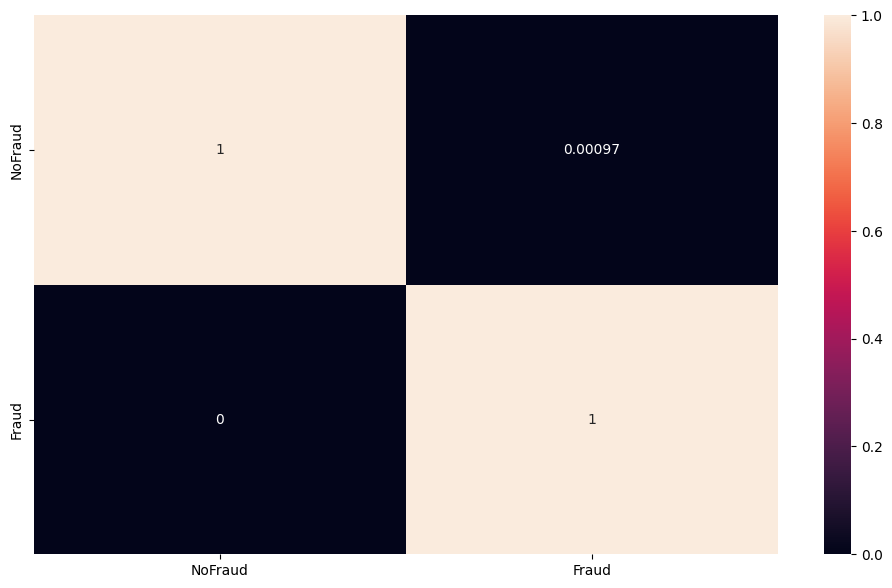

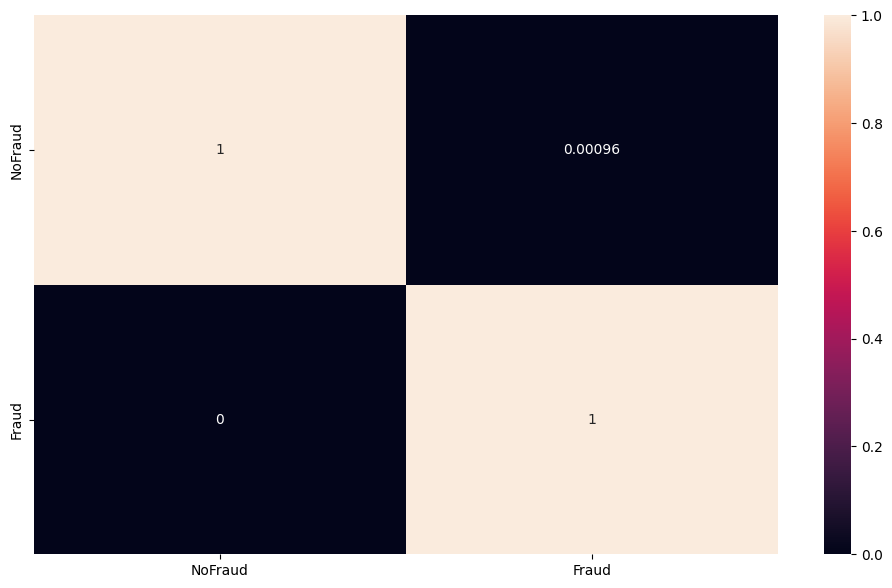

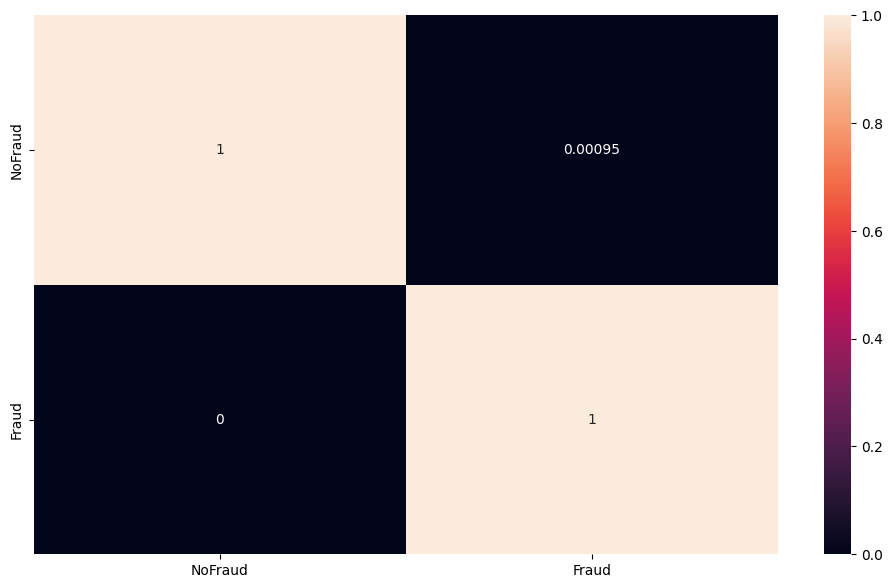

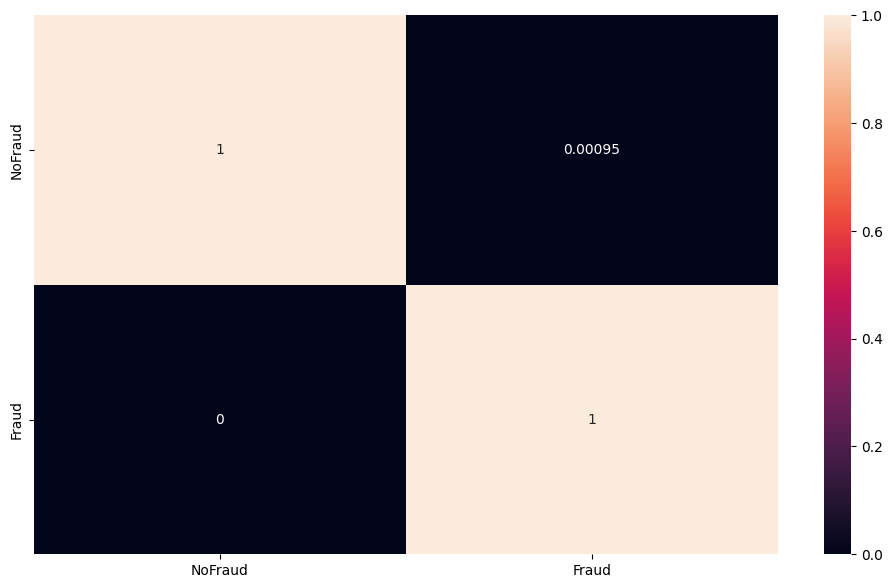

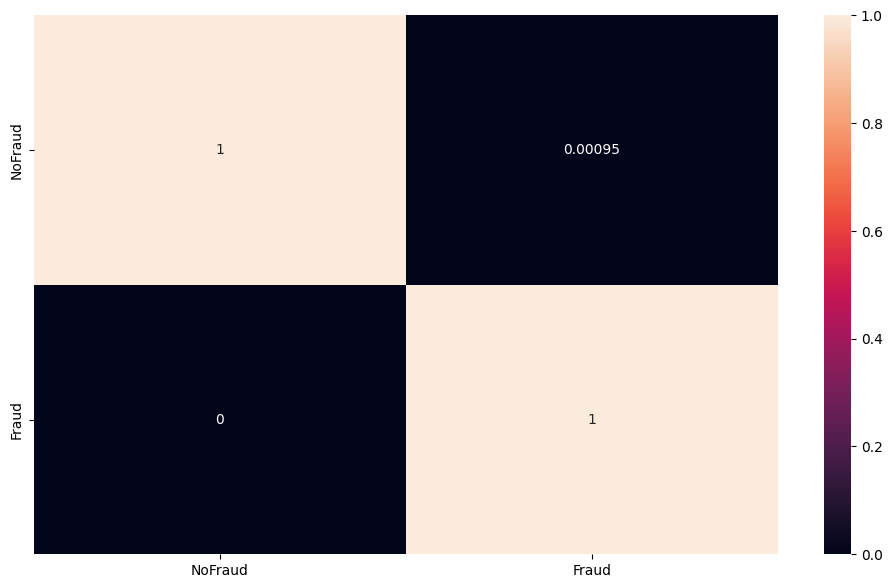

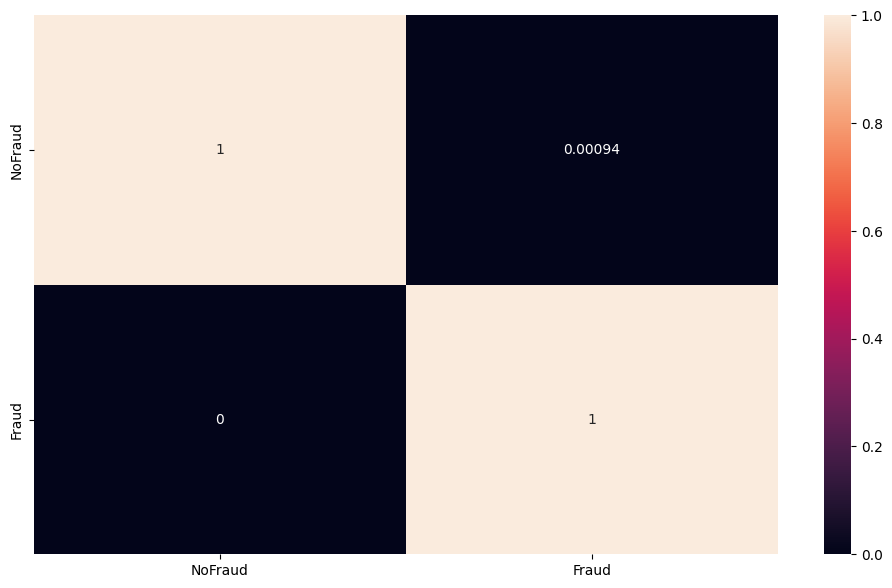

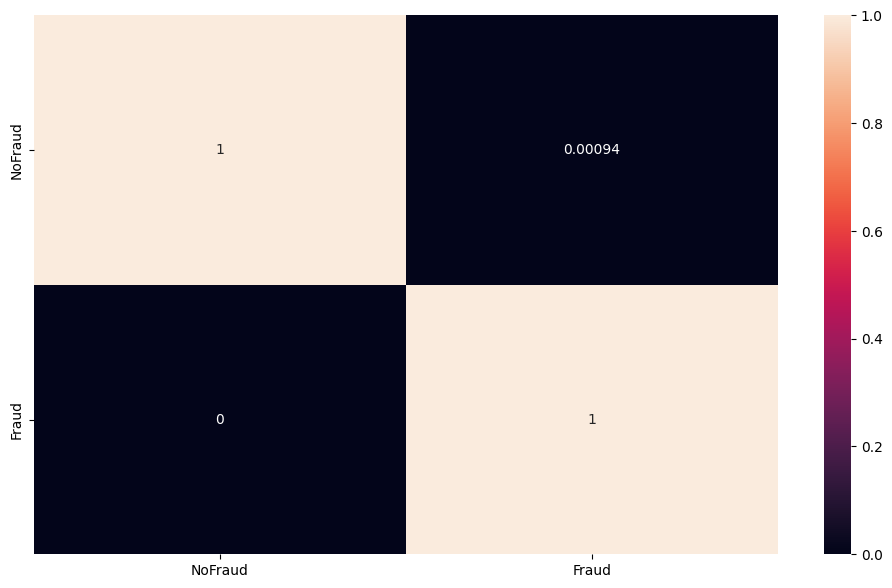

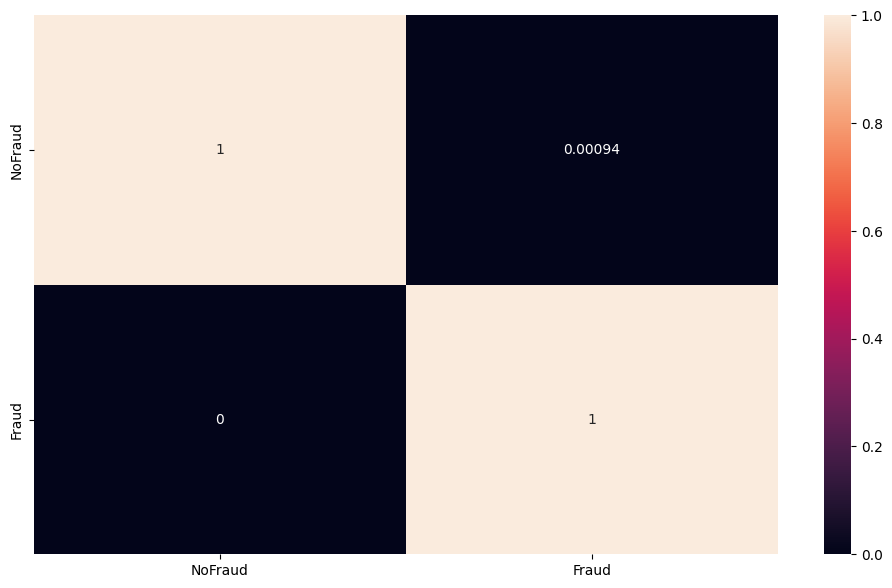

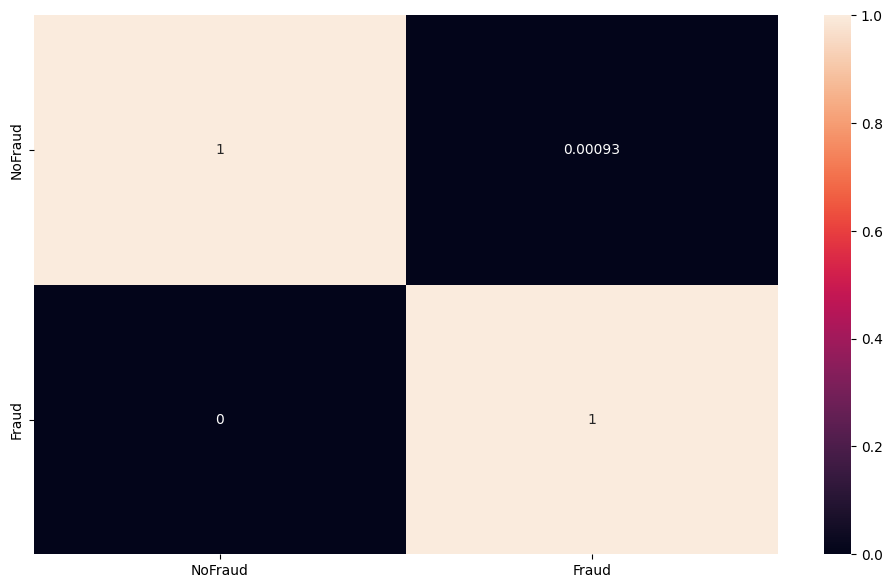

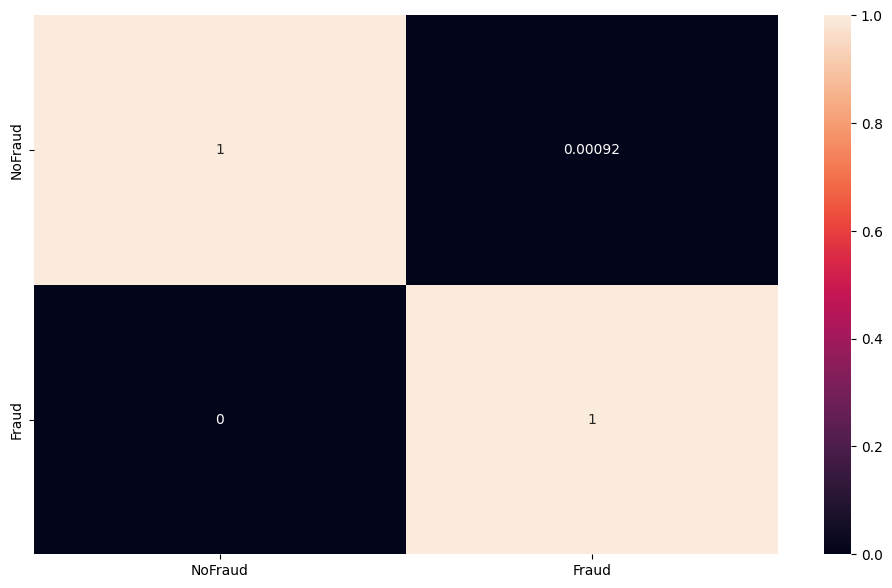

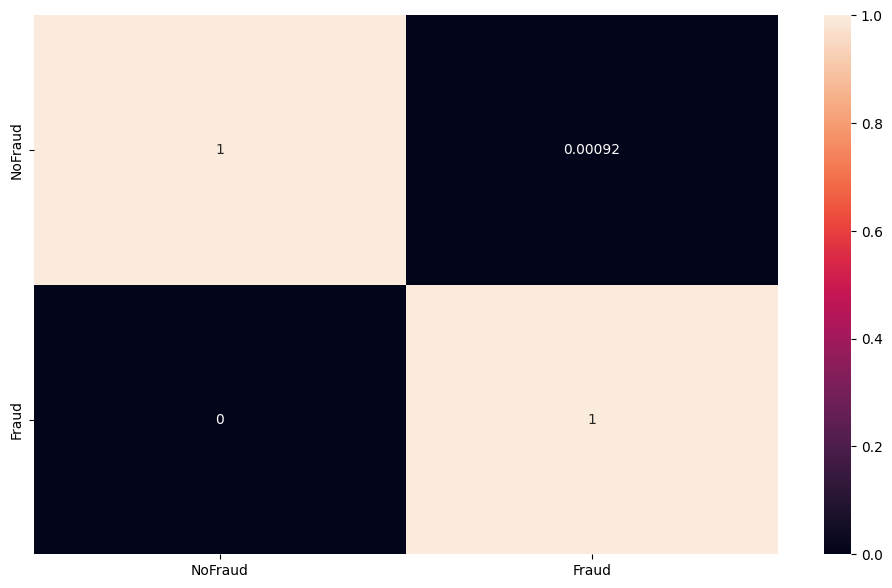

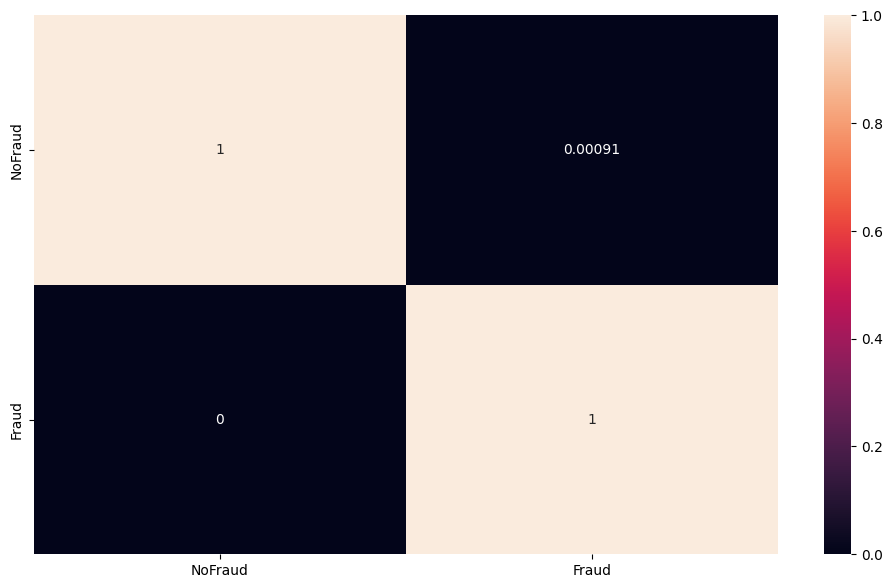

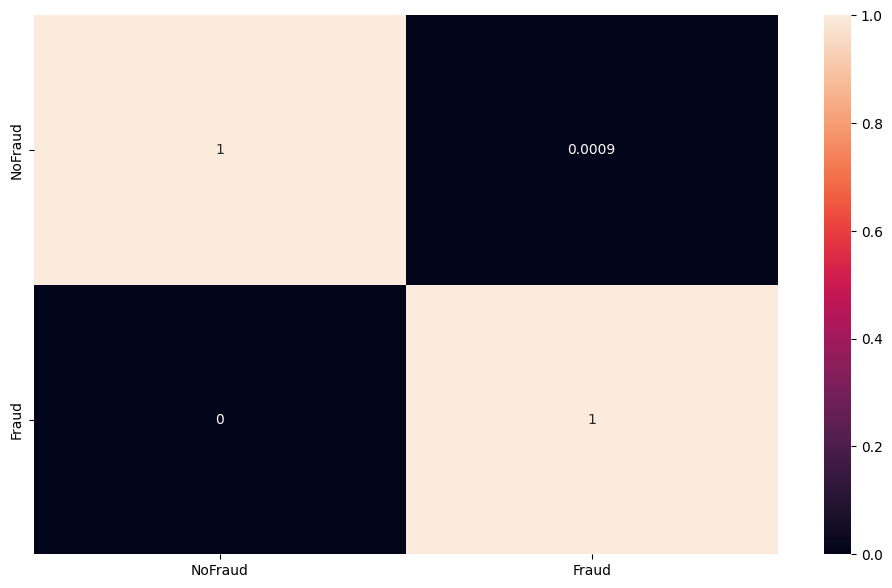

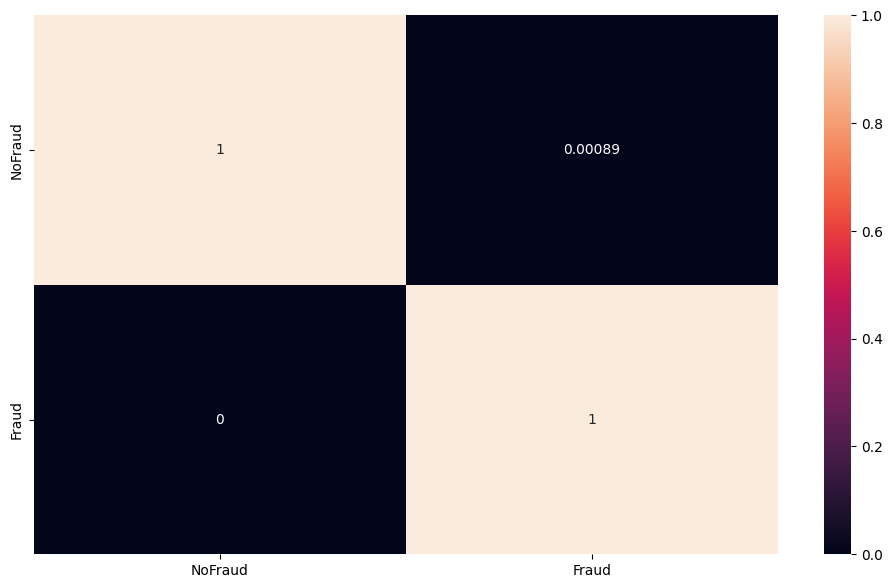

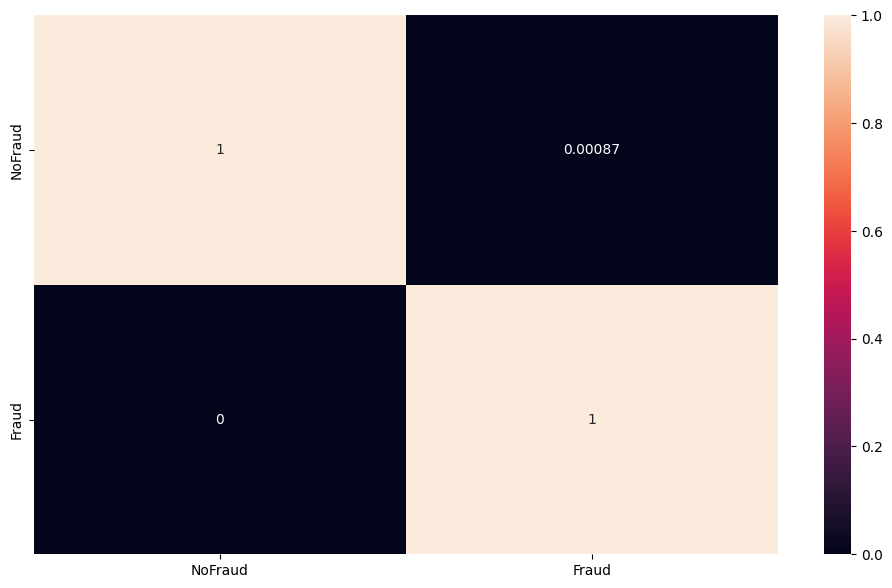

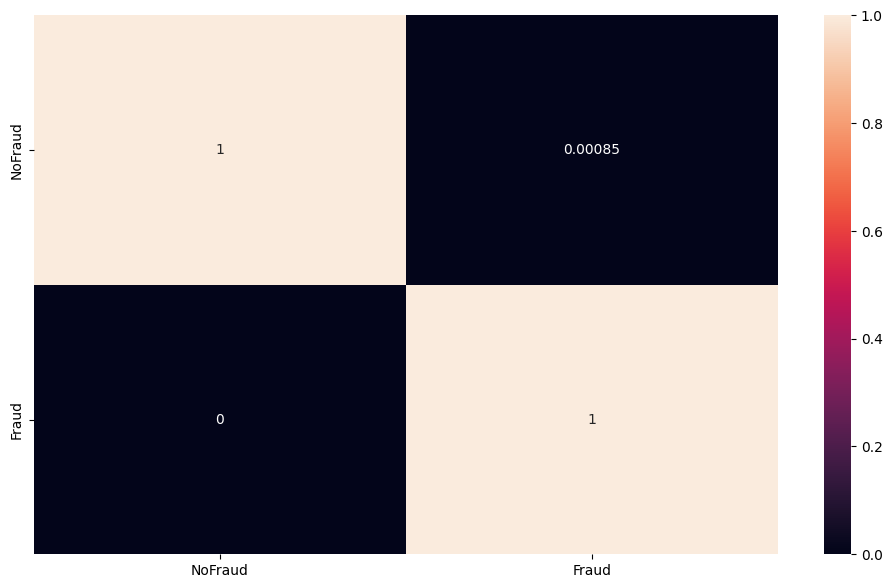

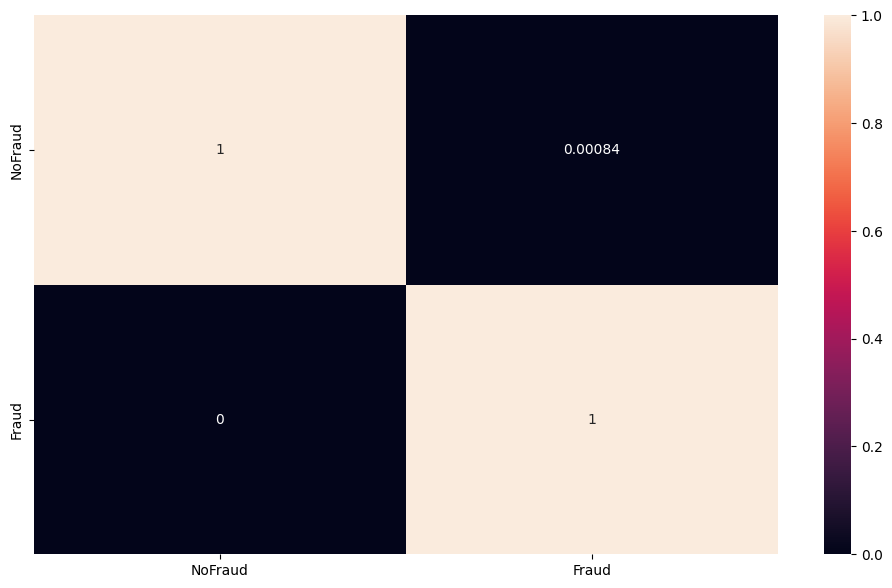

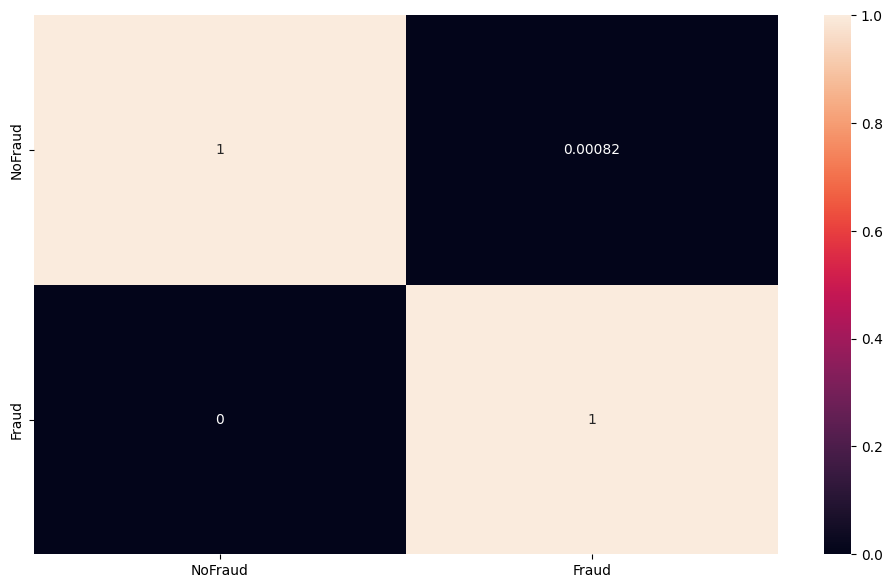

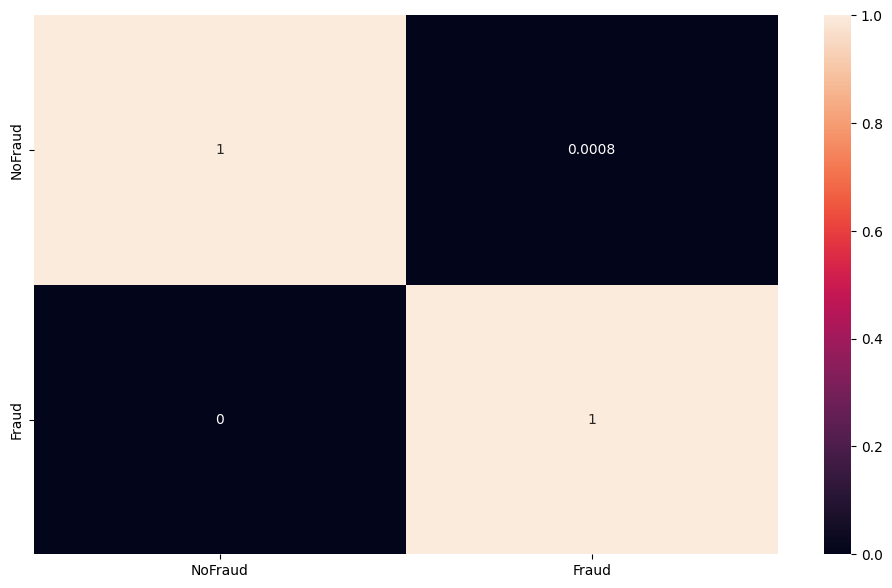

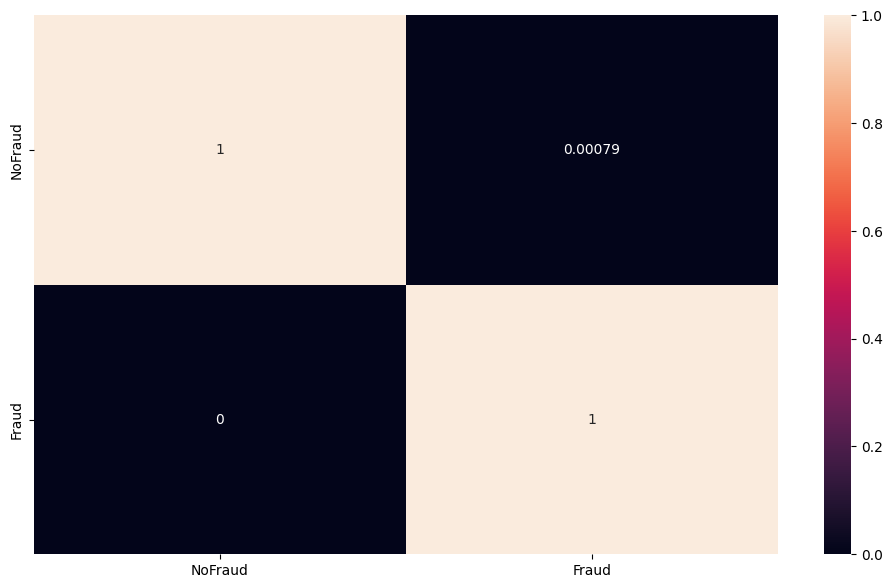

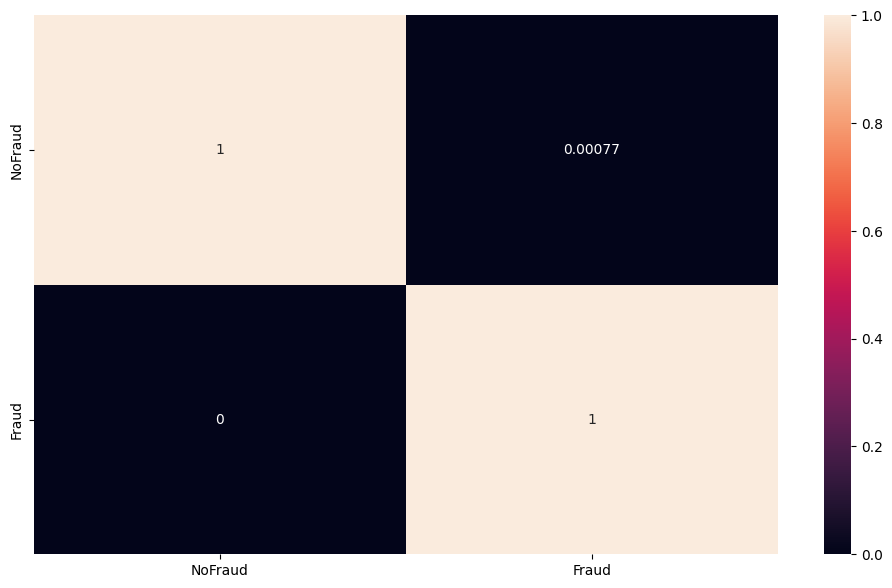

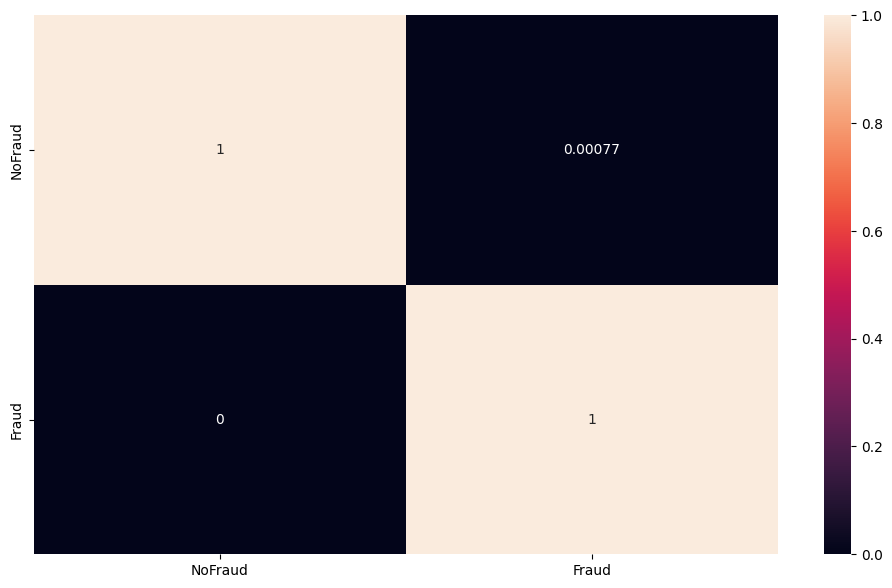

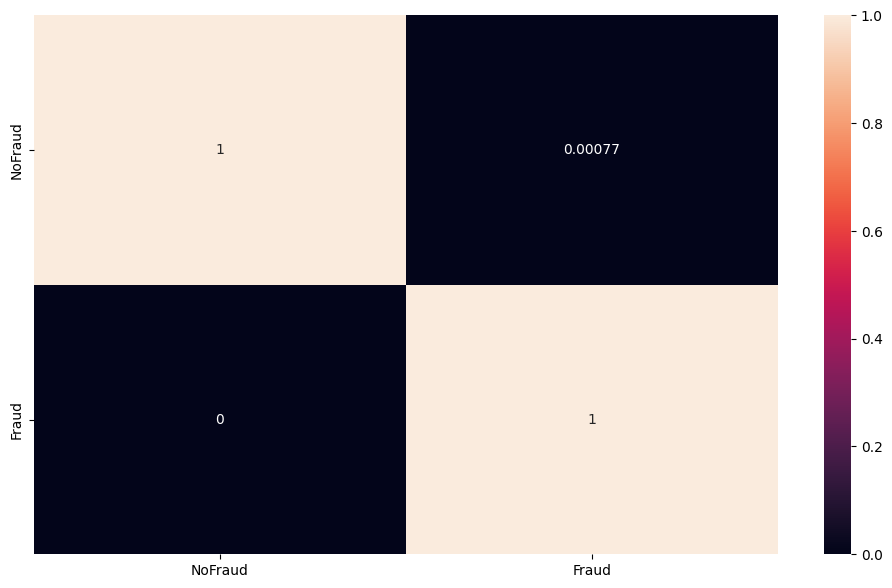

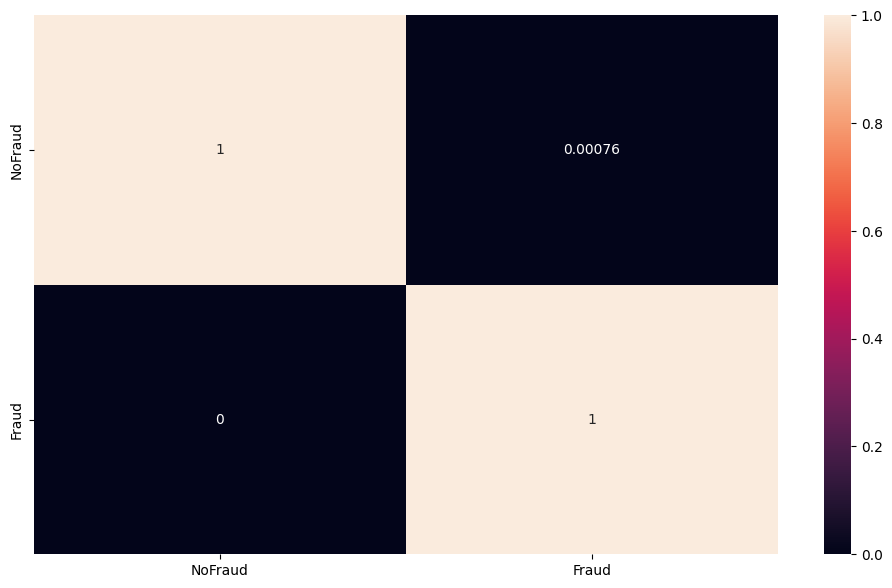

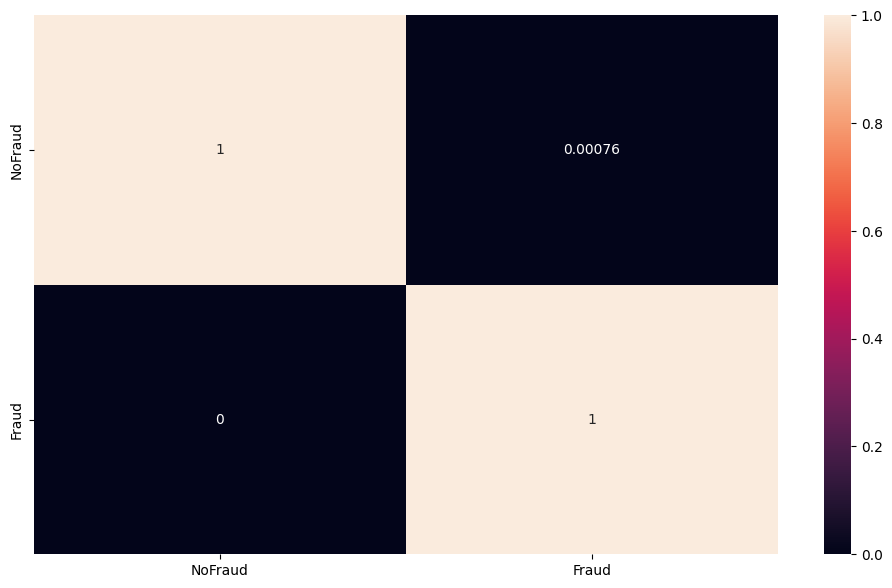

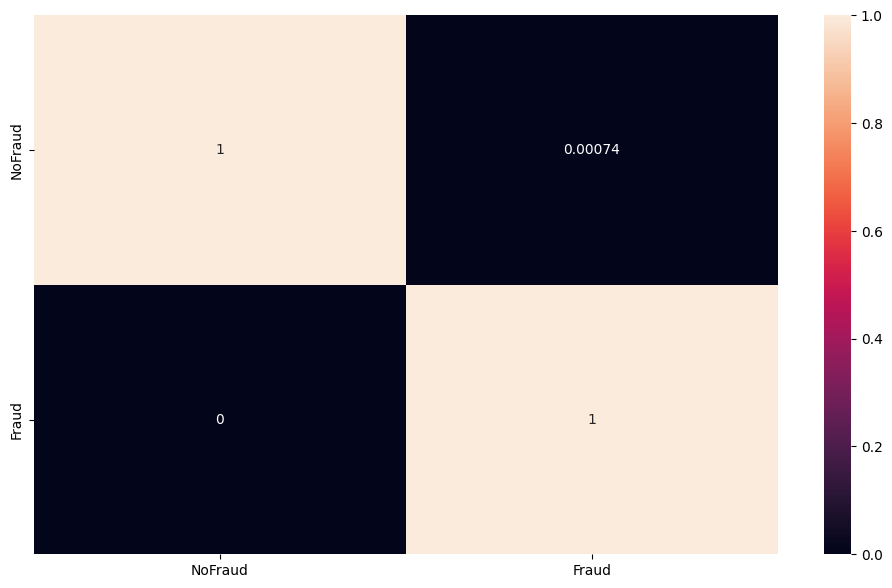

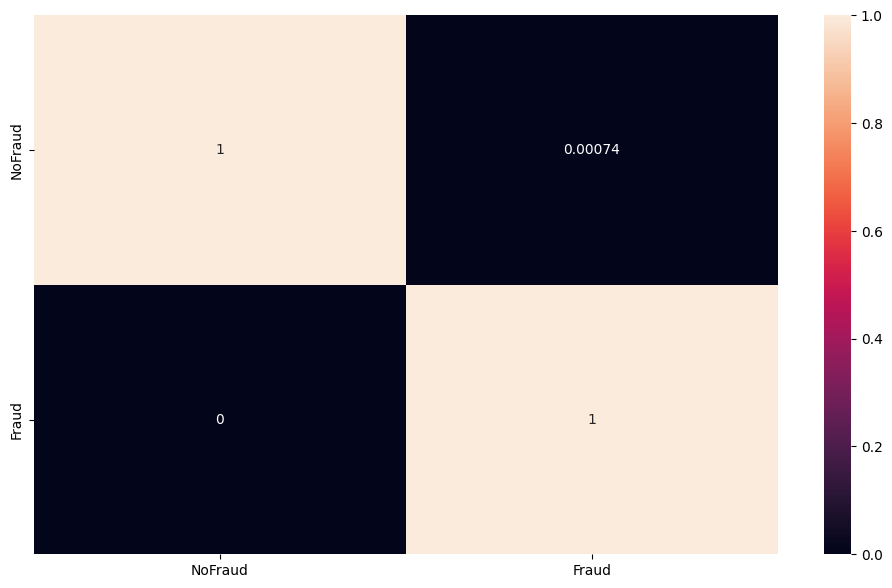

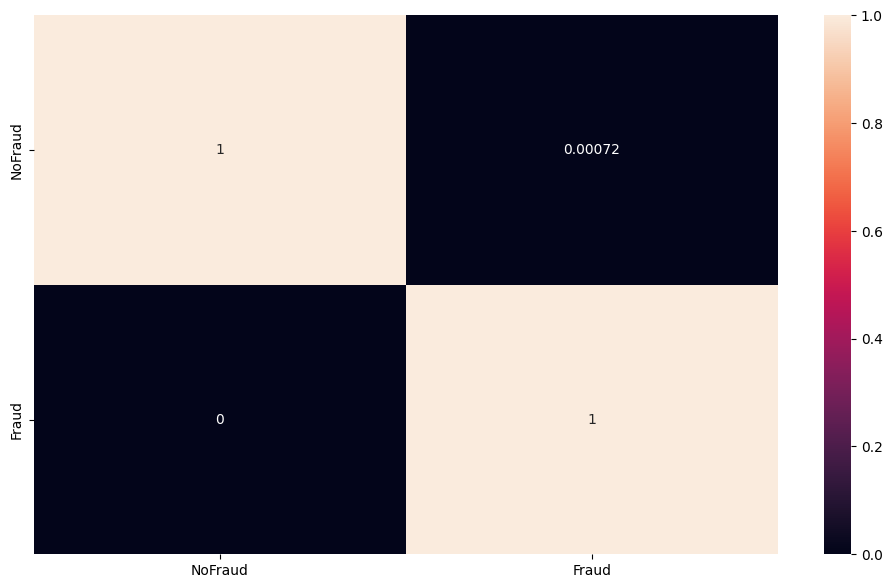

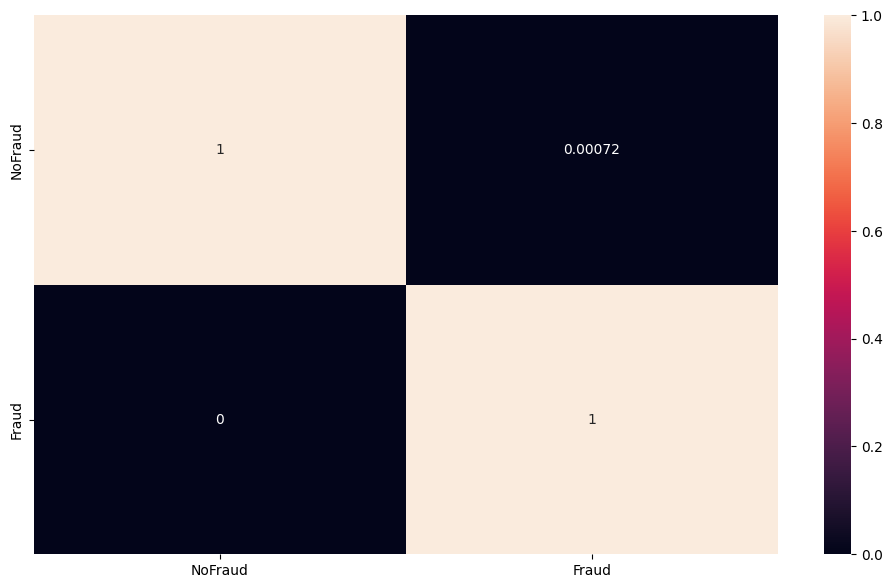

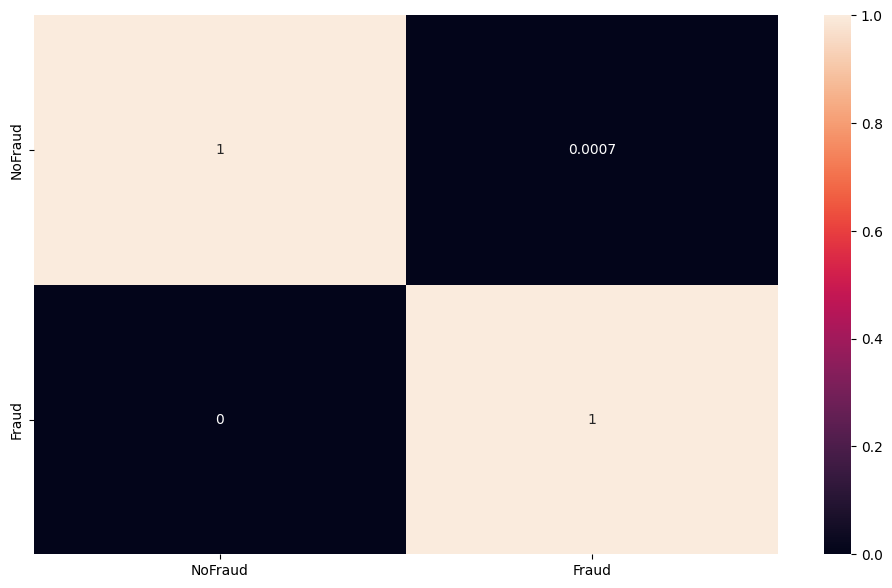

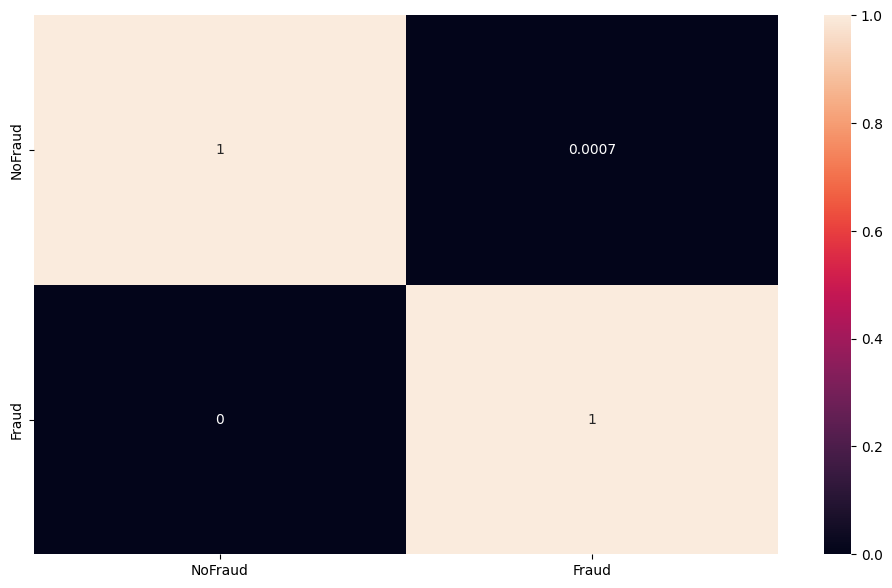

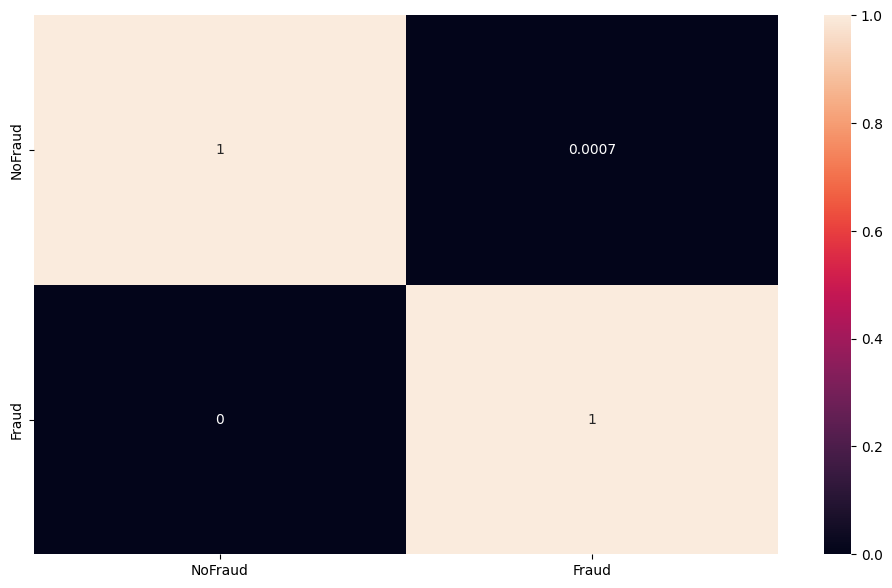

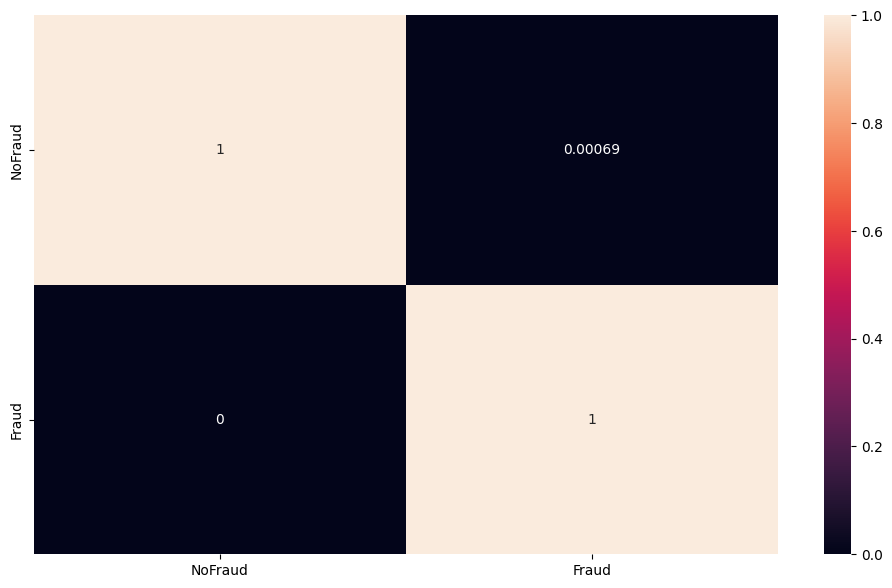

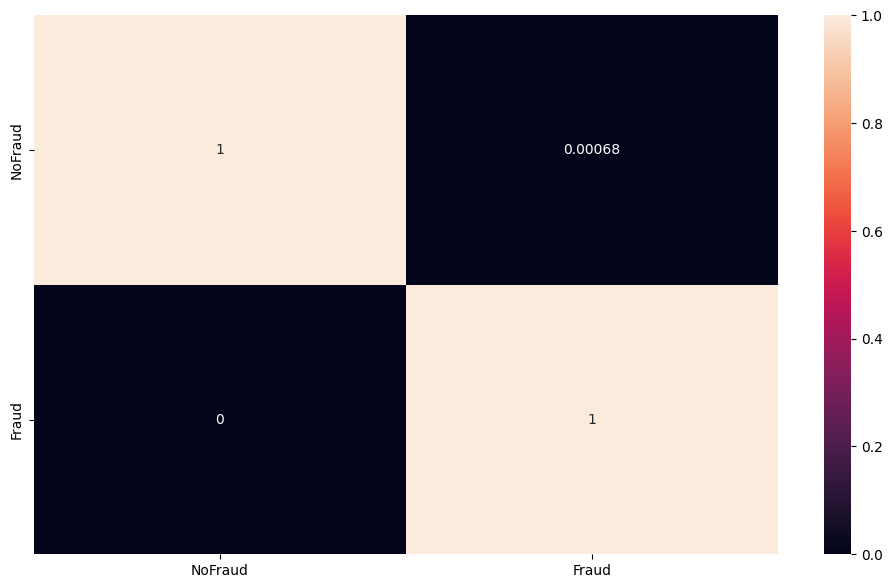

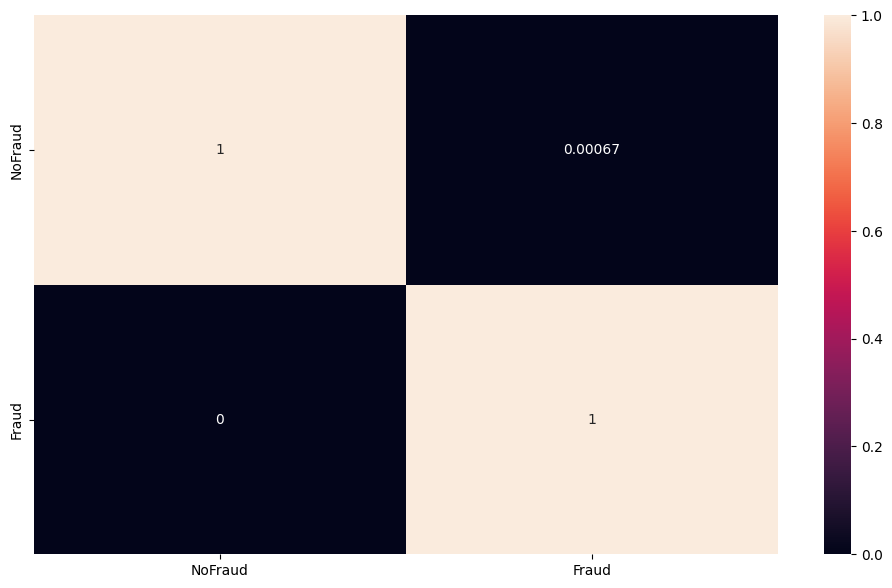

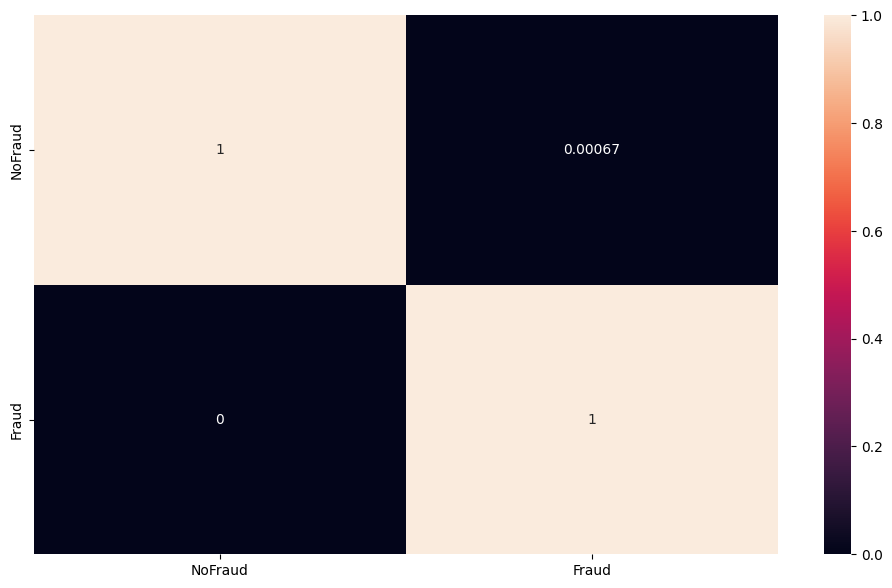

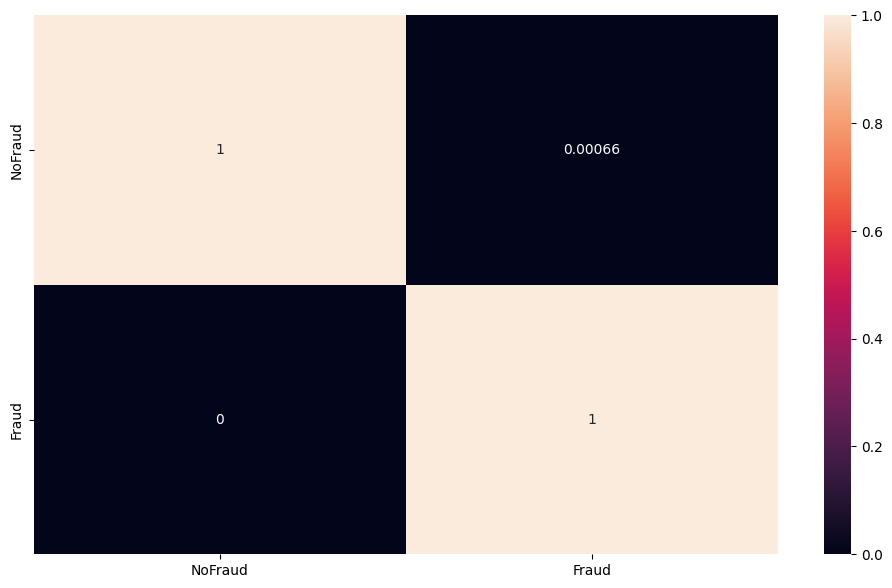

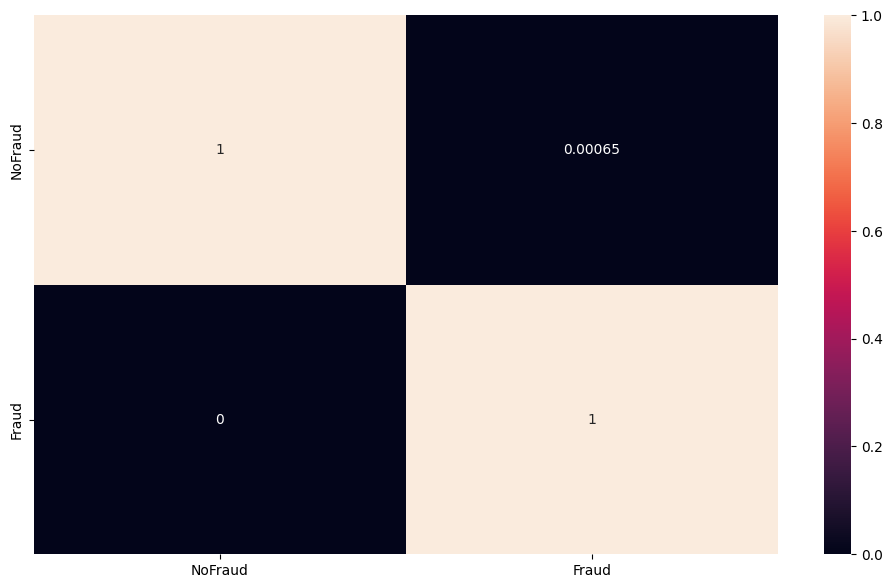

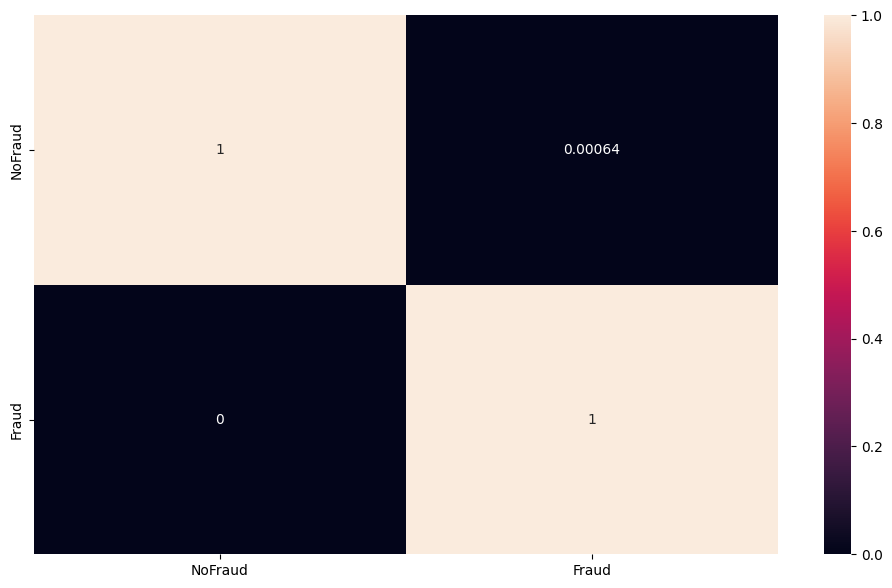

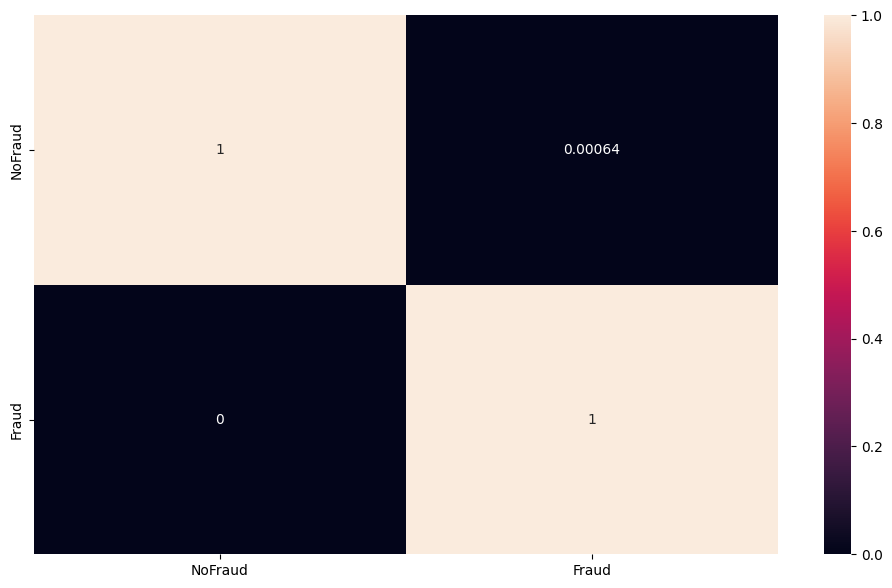

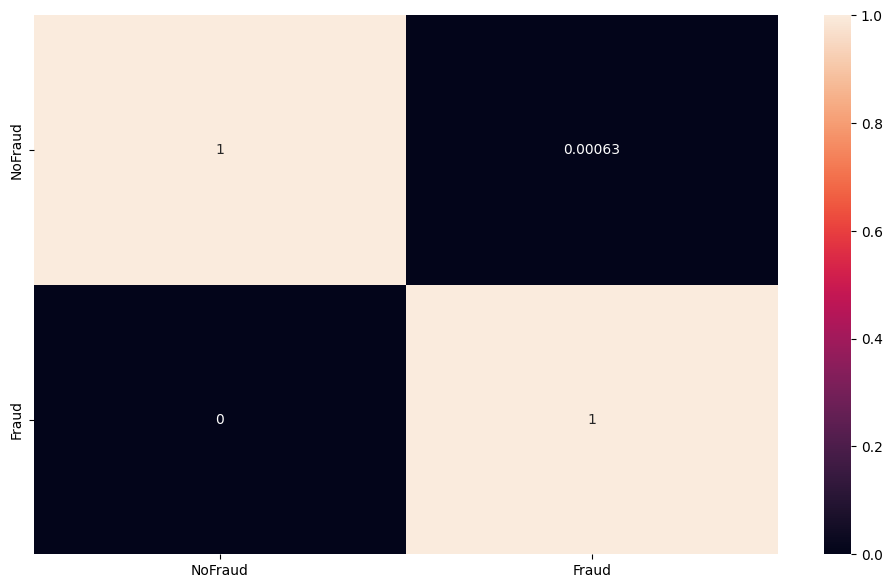

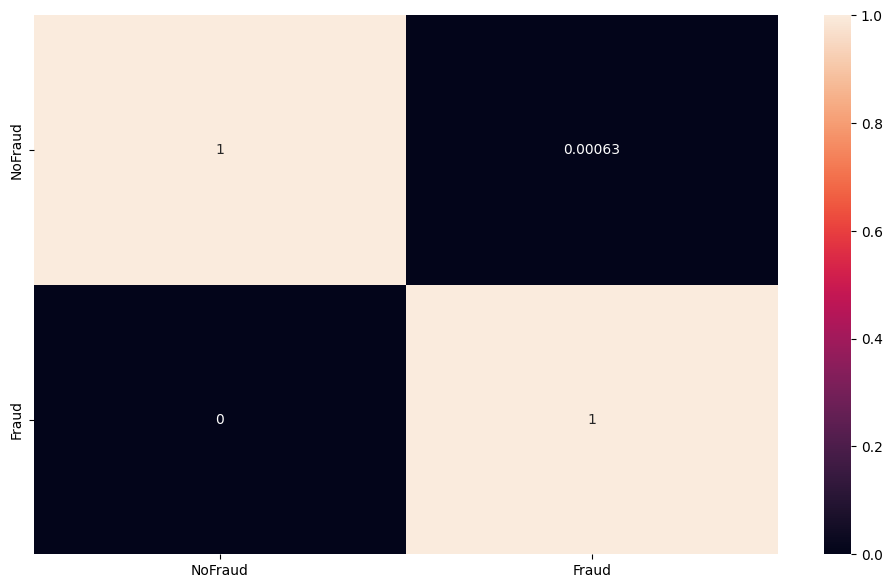

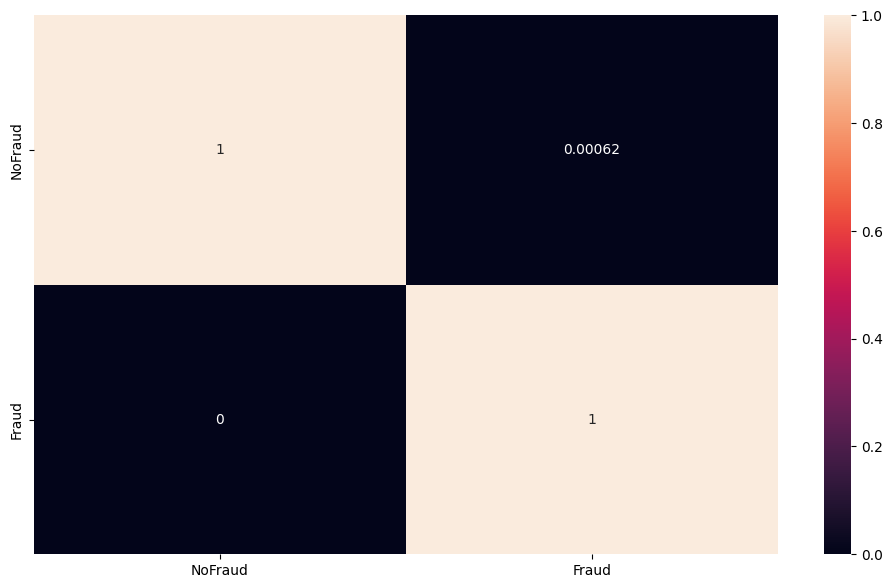

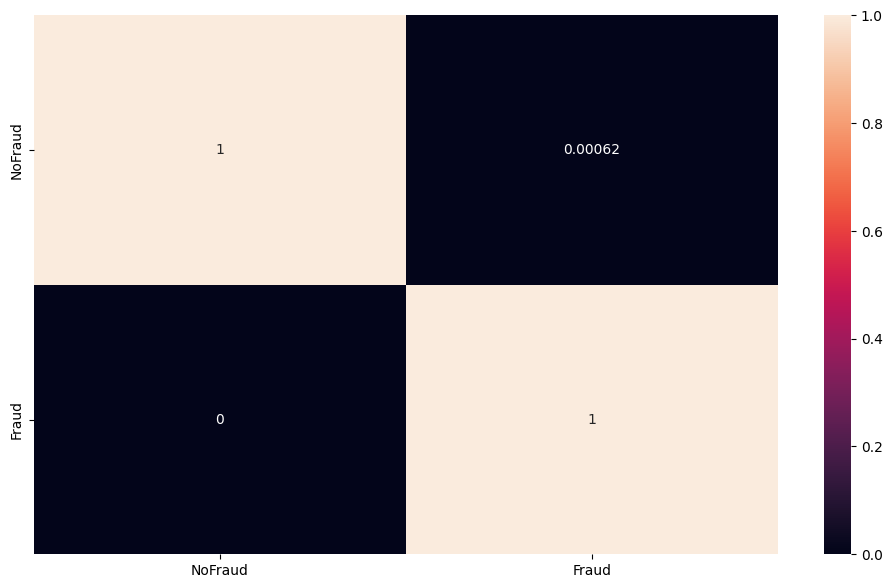

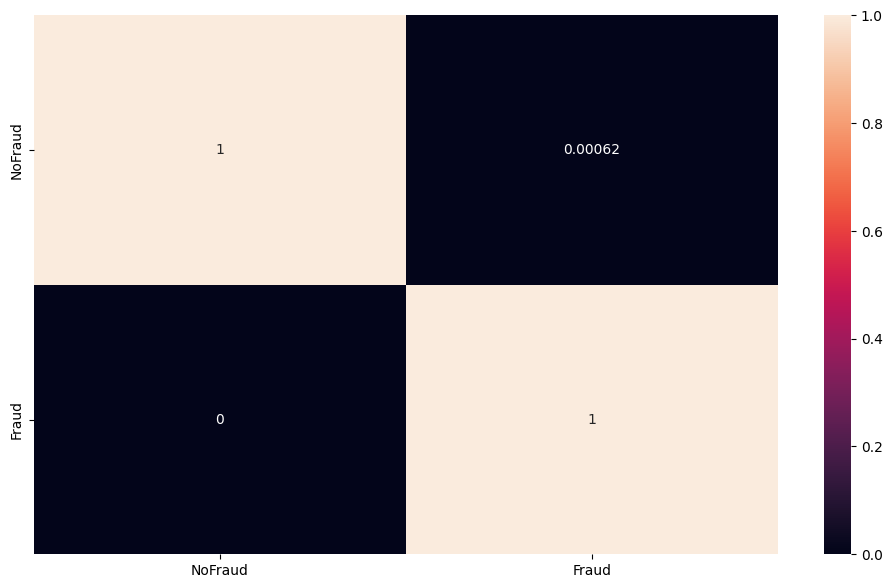

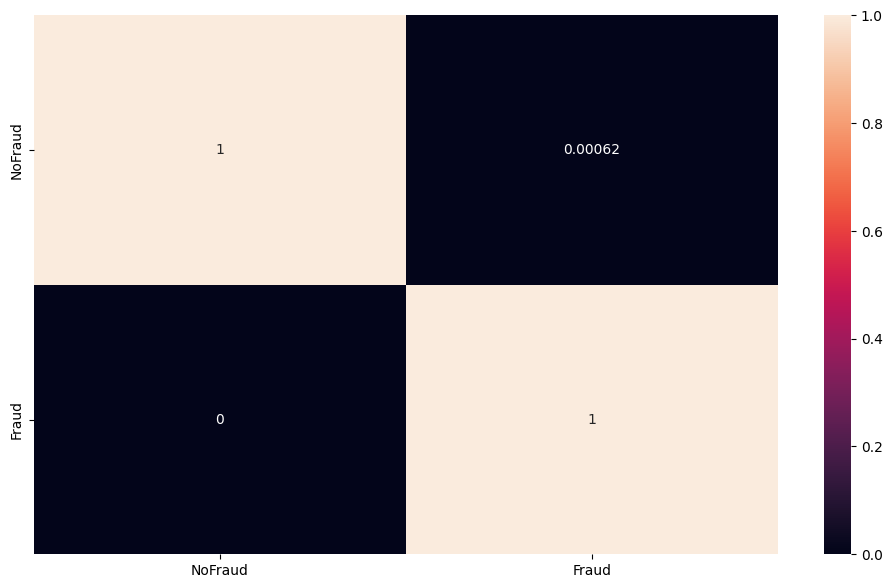

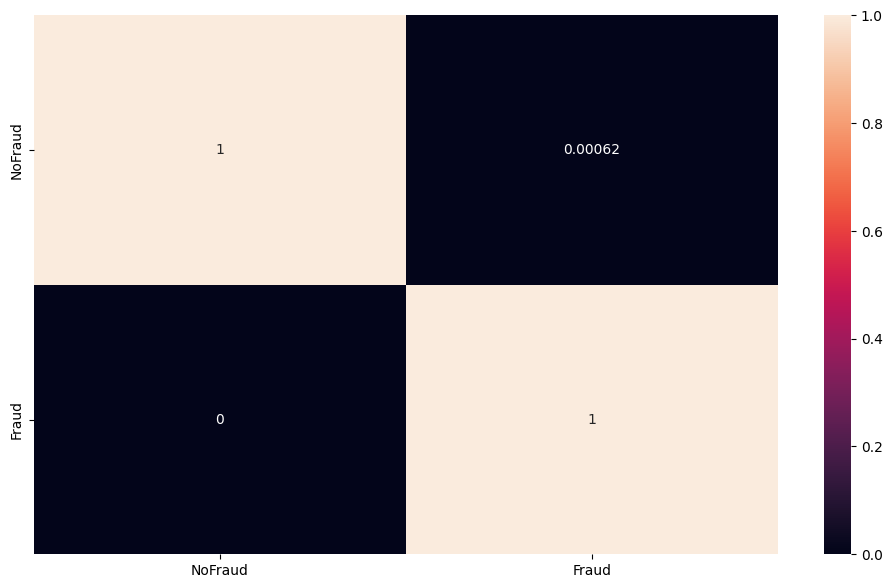

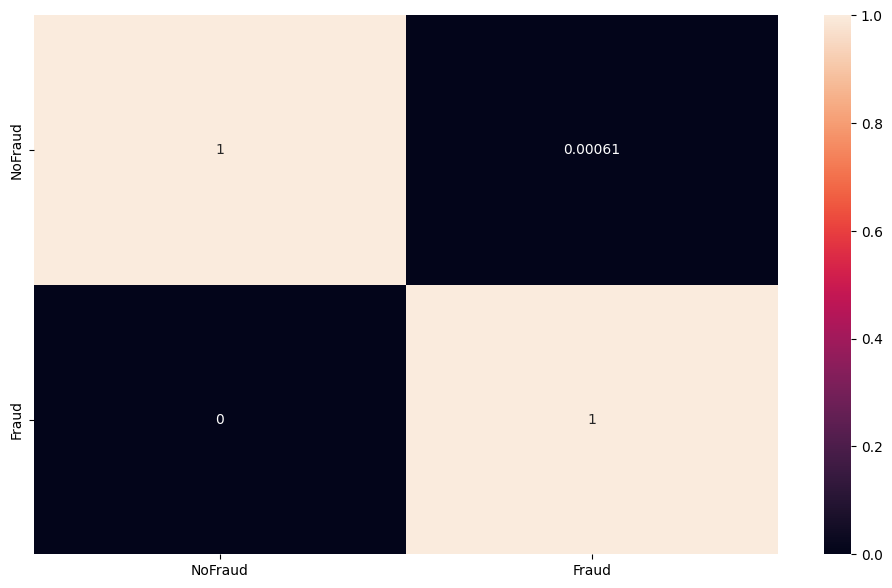

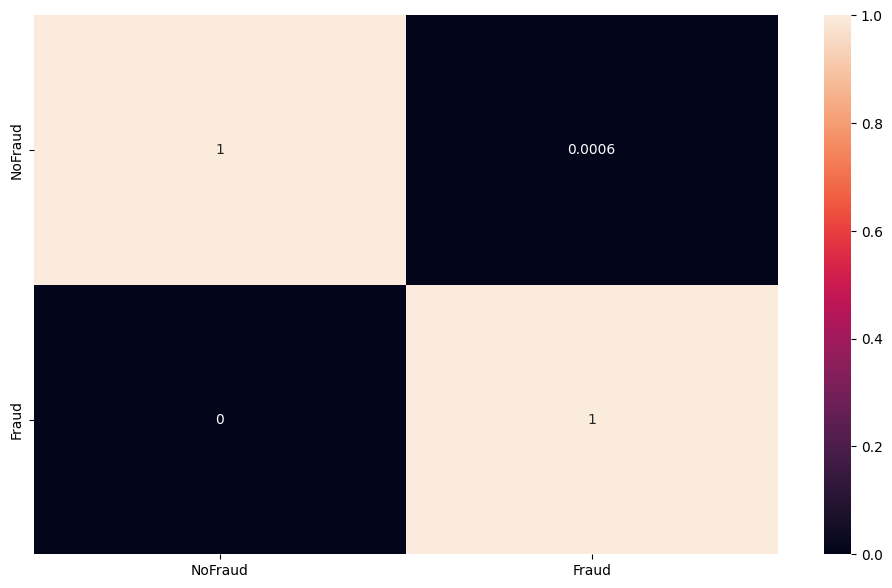

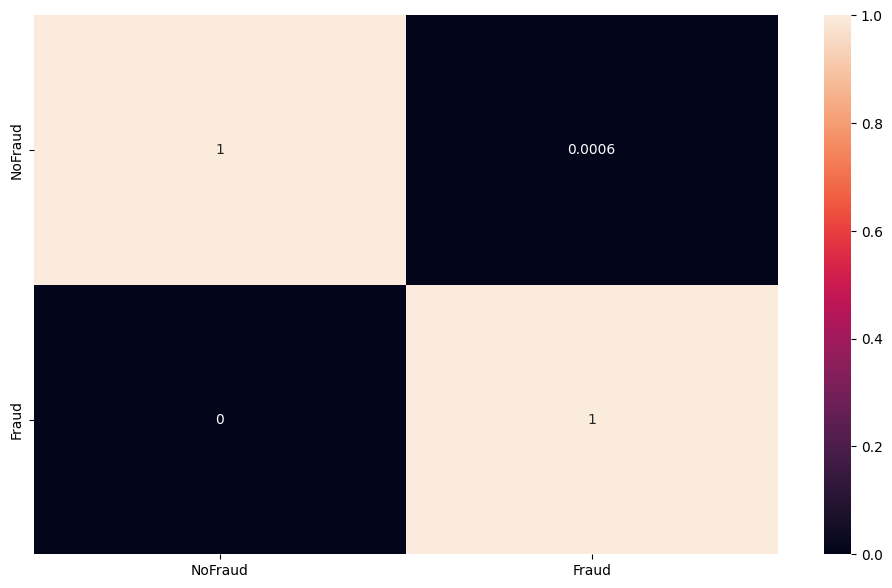

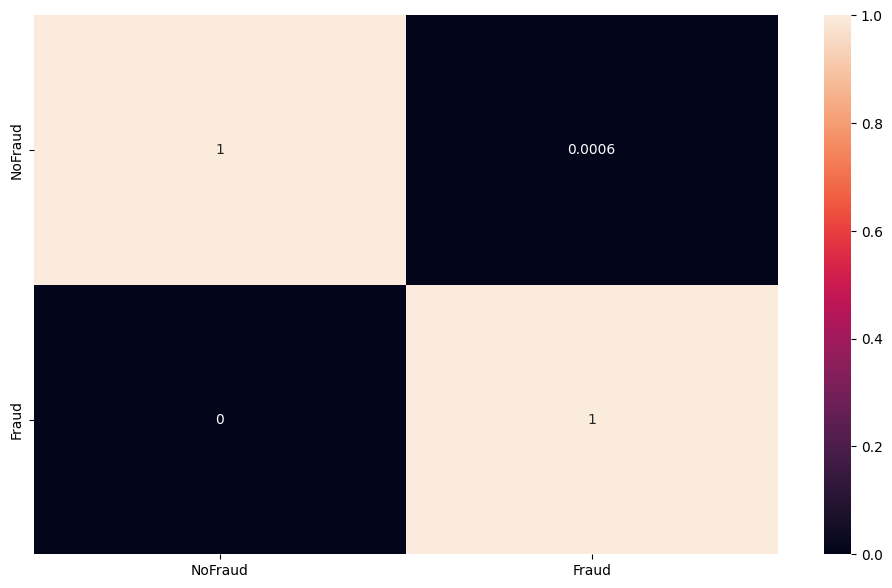

In [46]:
def compute_F1(model,features,targets):#, data_loader, device):
    #correct_pred, num_examples = 0, 0
    features = features
    targets = targets
    #for i, (features, targets) in enumerate(data_loader):
        #print(features)
        #print(targets)
        #features = features.to(device)
        #targets = targets.to(device)

    logits, probas = model(features)
    _, predicted_labels = torch.max(probas, 1)
    #num_examples += targets.size(0)
    #correct_pred += (predicted_labels == targets).sum()

    print(classification_report(y,predicted_labels))
    #Building Confusion matrix - https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7

    # constant for classes
    classes = ('NoFraud','Fraud')

    # Build confusion matrix
    cf_matrix = confusion_matrix(y, predicted_labels)
    #print(cf_matrix)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                         columns = [i for i in classes])
    #print(df_cm)
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig('output.png')

    #calculate f1_score
    #print(y[0:5])
    #print("F1 Score: ",f1_score(y, predicted_labels))

    return f1_score(y, predicted_labels)

start_time = time.time()
minibatch_cost = []
epoch_values = []
train_f1s = []
#valid_f1s = []

#NUM_EPOCHS = 25

#Split X (features) and y (targets) for the dataset
X=np.delete(train_dataset,-1,axis=1)
y = np.delete(train_dataset,np.s_[0:num_features],axis=1).flatten()
features = torch.tensor(X, dtype=torch.float).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)

#split X and y from the validation set
#X_valid = np.delete(valid_dataset,-1,axis=1)
#y_valid = np.delete(valid_dataset,np.s_[0:num_features],axis=1).flatten()
#valid_features = torch.tensor(X_valid, dtype=torch.float).to(DEVICE)
#valid_targets = torch.tensor(y_valid, dtype=torch.long).to(DEVICE)
# create DataLoader, then take one batch

#Data loader for text data in Pytorch - https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/
#loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)
#for X_batch, y_batch in loader:
#    print(X_batch, y_batch)
#    break

for epoch in range(NUM_EPOCHS):
    loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=40000)
    for X_batch, y_batch in loader:
        #print(X_batch, y_batch)
        ### FORWARD AND BACK PROP
        logits, probas = model1(features)

        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()

        cost.backward()
        minibatch_cost.append(cost)
        ### UPDATE MODEL PARAMETERS
        optimizer.step()

        ### LOGGING
        model1.eval()
        with torch.set_grad_enabled(False): # save memory during inference
          trainf1 = compute_F1(model1, features, targets)
          #validf1 = compute_F1(model1, valid_features, valid_targets)
          print('Epoch: %03d/%03d | Train F-1 Score: %.3f%%' % (
              epoch+1, NUM_EPOCHS, trainf1))#, train_loader, device=DEVICE)))
          #print('Epoch: %03d/%03d | Train F-1 Score: %.3f%% | Validation F-1 Score: %.3f%%' % (
          #    epoch+1, NUM_EPOCHS, trainf1,validf1))#, train_loader, device=DEVICE)))

        print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    train_f1s.append(trainf1)
    #valid_f1s.append(validf1)
    epoch_values.append(epoch)
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

In [ ]:
df_train.head()

amount_scaled  time_scaled        V1        V2        V3        V4  \
0       0.143646     0.658725 -0.379211  0.969954  0.321294 -0.363956   
1      -0.297911    -0.645438  0.269614  3.549755 -5.810353  5.809370   
2      -0.296653     0.830214 -1.067713  5.262312 -8.438567  7.316487   
3      -0.167680    -0.526651 -0.400513  0.712060  1.773254  0.689722   
4      -0.183050     0.690163 -5.256434  0.364541 -5.412085  2.400031   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0  0.823407 -0.943439  1.287789 -0.402027  ... -0.012794  0.291060  1.008758   
1  1.538808 -2.269219 -0.824203  0.351070  ...  0.310525  0.371121 -0.322290   
2  0.008254 -2.125936 -3.307036  1.869838  ...  0.821405  0.547790 -0.491960   
3 -0.131094 -0.651088  0.391842  0.014048  ...  0.057006  0.087142  0.237855   
4  0.697301 -1.998755 -5.835532 -0.887739  ... -0.403685 -0.648259  0.511285   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.445218  0.008838  0.067100 -0.108610 -0.149234 -0.061219      0  
1 -0.549856 -0.520629  1.378210  0.564714  0.553255  0.402400      1  
2  0.055914 -1.145369  0.068951  0.535055  0.539263  0.124255      1  
3  0.062346  0.619010 -0.619861  0.330433  0.124030  0.147543      0  
4 -1.110045  0.178987  0.220235 -0.699809  0.580487 -0.173630      1  

[5 rows x 31 columns]

<br>
<br>

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42488
         1.0       0.53      0.89      0.66        71

    accuracy                           1.00     42559
   macro avg       0.76      0.94      0.83     42559
weighted avg       1.00      1.00      1.00     42559

Test F-1 Sore: 0.66%


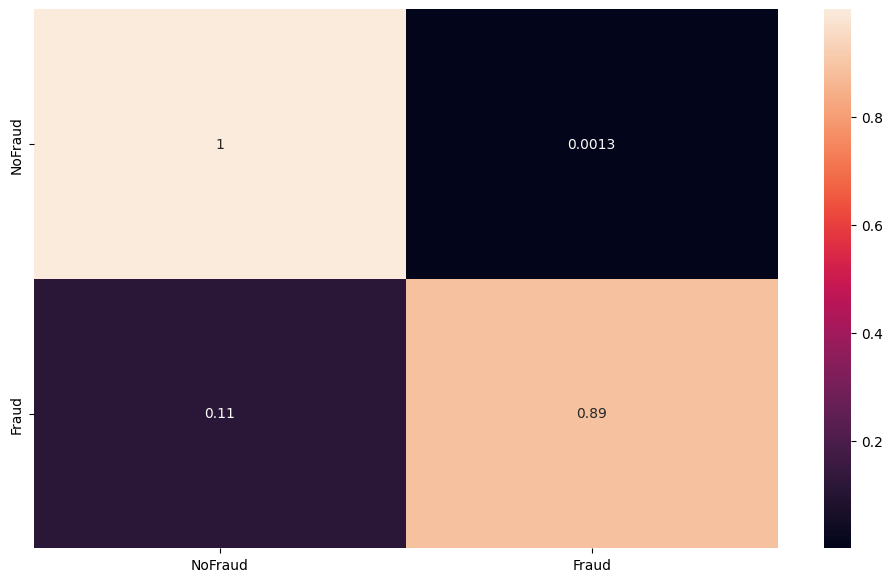

In [49]:
##########################
### Evaludation and Acccuracy Confusion Matrix
##########################

#Split X (features) and y (targets) for the dataset
X=np.delete(test_dataset,-1,axis=1)
y = np.delete(test_dataset,np.s_[0:num_features],axis=1).flatten()
features = torch.tensor(X, dtype=torch.float).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)


with torch.set_grad_enabled(False): # save memory during inference
    print('Test F-1 Sore: %.2f%%' % (compute_F1(model1, features, targets)))

In [ ]:
df_test

amount_scaled  time_scaled        V1        V2        V3        V4  \
0           1.690771     0.456737  1.825390 -1.077621 -1.470206  0.717307   
1           5.886257     0.469977  1.100822 -1.751982 -1.179405 -0.142146   
2           0.469503    -0.166132  1.489310 -1.168616 -0.405391 -1.551548   
3           2.766716    -0.476909  0.814388 -0.862222  0.912719  0.417587   
4           4.421295    -0.075083  0.765733 -1.409727 -0.246736 -0.187071   
...              ...          ...       ...       ...       ...       ...   
42717       4.423950     0.361999  1.341398 -1.132099 -2.089190  0.530681   
42718       6.855865    -0.140239 -0.686183 -1.294687  0.388873 -0.440192   
42719       0.446308    -0.067588  1.300448 -0.557344  0.419697 -0.557177   
42720      -0.137637     0.960467  2.218149 -0.703405 -1.403045 -1.177214   
42721      -0.293440    -0.198475 -0.886449 -0.360925  3.126960 -1.450144   

             V5        V6        V7        V8  ...       V20       V21  \
0     -0.120429  0.526675 -0.287993  0.030873  ... -0.404411 -0.172303   
1     -1.283041 -1.036085  0.034555 -0.118941  ...  0.703302  0.021856   
2     -0.776875 -0.044639 -0.773565 -0.085285  ... -0.237593 -0.212885   
3     -1.284266 -0.404437 -0.318470 -0.102405  ...  0.449386  0.213571   
4     -1.132248 -0.925154  0.296619 -0.449901  ...  0.248825 -0.234840   
...         ...       ...       ...       ...  ...       ...       ...   
42717 -0.095425 -0.413697  0.304192 -0.037911  ...  0.437838 -0.007934   
42718 -1.576549  0.637076 -0.993550 -2.770456  ...  1.949784 -0.985986   
42719 -1.140793 -1.038534 -0.352959 -0.246905  ... -0.368435 -0.615450   
42720 -0.188104 -0.510869 -0.473433 -0.230111  ...  0.063857  0.373992   
42721 -1.386215  0.787560 -1.016569  0.734220  ...  0.038892  0.213088   

            V22       V23       V24       V25       V26       V27       V28  \
0      0.020379 -0.121985  0.214216  0.367291 -0.400787  0.013981 -0.036774   
1     -0.828514  0.096684  0.399532 -0.931244  0.193015 -0.112093  0.049565   
2     -0.232211 -0.274822 -0.821830  0.778783 -0.012738  0.001131 -0.006071   
3      0.348421 -0.229960  0.528373  0.176248  1.081888 -0.067926  0.054866   
4     -0.764921 -0.311339  0.481325  0.350838  1.052800 -0.123750  0.058177   
...         ...       ...       ...       ...       ...       ...       ...   
42717 -0.632443 -0.054904  0.570772 -0.256907 -0.169727 -0.082469  0.029950   
42718  0.372241 -0.511325 -0.326889  0.370319  0.233185  0.079850  0.347964   
42719 -1.438292  0.203983  0.378886 -0.054361  0.732372 -0.062765  0.022632   
42720  1.117838 -0.044661 -0.727803  0.154496 -0.009787 -0.024651 -0.076596   
42721  0.906331 -0.345694  0.233365  0.361895 -0.106708  0.348365  0.114790   

       Class  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
42717      0  
42718      0  
42719      0  
42720      0  
42721      0  

[42722 rows x 31 columns]